# NEW Economic Impact

In [9]:
# -------------------------------------------------------------------
# Setup cell — place this at the top of every analysis notebook
# -------------------------------------------------------------------
# Core libraries
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import statsmodels.api as sm
from scipy.stats import zscore

df = pd.read_csv("../datasets/customer_shopping_data_v14.csv")
sns.set_theme(style="whitegrid")

color1 = '#FF9E9D'  # Coral Pink
color2 = '#FFC785'  # Peach
color3 = '#FFF59D'  # Light Lemon
color4 = '#A0E6A6'  # Mint Green
color5 = '#87C8FF'  # Sky Blue
color6 = '#C4A2FF'  # Lavender

Bloomberg Confidence  Transaction Count - Total Spend


Monthly summary before filtering:

      month  total_transactions  total_spend  conf_index
0   2021-01                3835   9641614.62       72.55
1   2021-02                3407   8772315.22       69.03
2   2021-03                3813   9455359.38       65.10
3   2021-04                3724   9389541.54       57.35
4   2021-05                3848   9771756.97       55.20
5   2021-06                3783   9286271.35       62.99
6   2021-07                3984  10311119.68       65.07
7   2021-08                3723   9630655.70       60.06
8   2021-09                3670   9188165.62       61.49
9   2021-10                3916  10263015.06       48.84
10  2021-11                3798   9265555.29       47.32
11  2021-12                3881   9585200.16       50.65
12  2022-01                3847   9764311.14       53.24
13  2022-02                3447   8344111.92       45.32
14  2022-03                3947   9986685.16       46.29
15  2022-04                3763   9326144.44       5

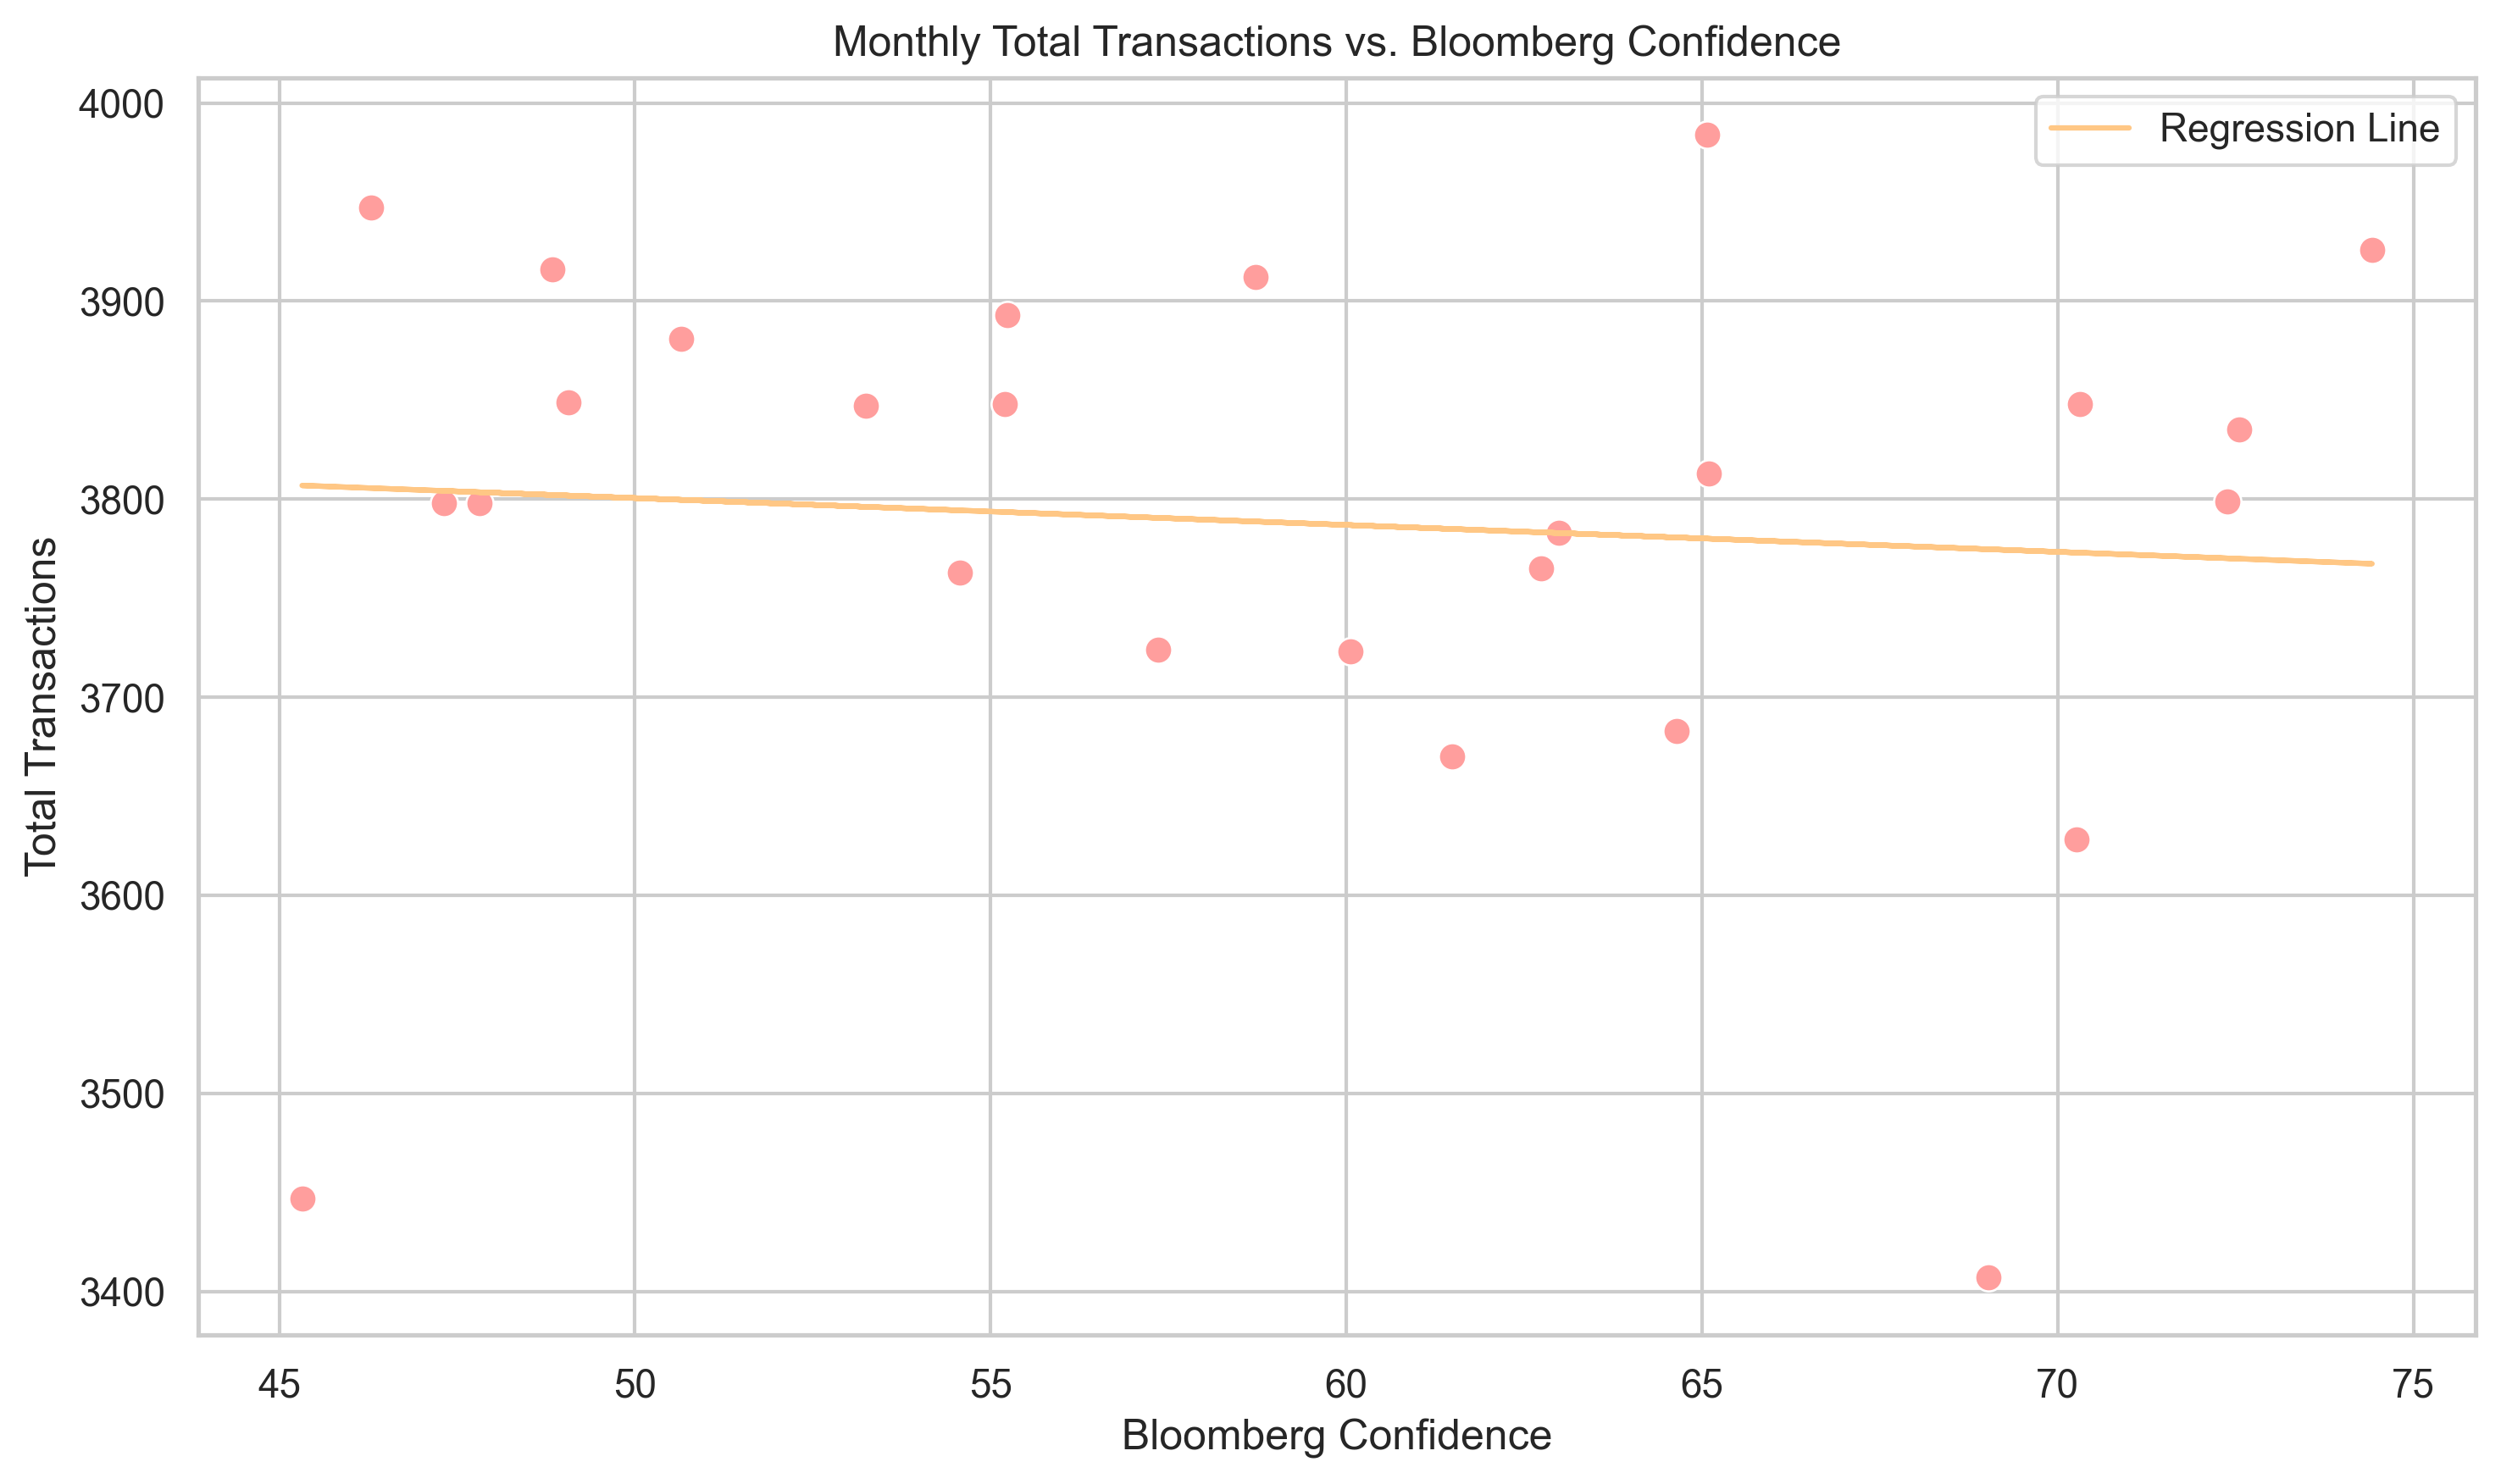


Regression summary (Total Spend):

                            OLS Regression Results                            
Dep. Variable:            total_spend   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.041
Method:                 Least Squares   F-statistic:                   0.02681
Date:                Mon, 14 Jul 2025   Prob (F-statistic):              0.871
Time:                        16:23:12   Log-Likelihood:                -375.31
No. Observations:                  26   AIC:                             754.6
Df Residuals:                      24   BIC:                             757.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.47

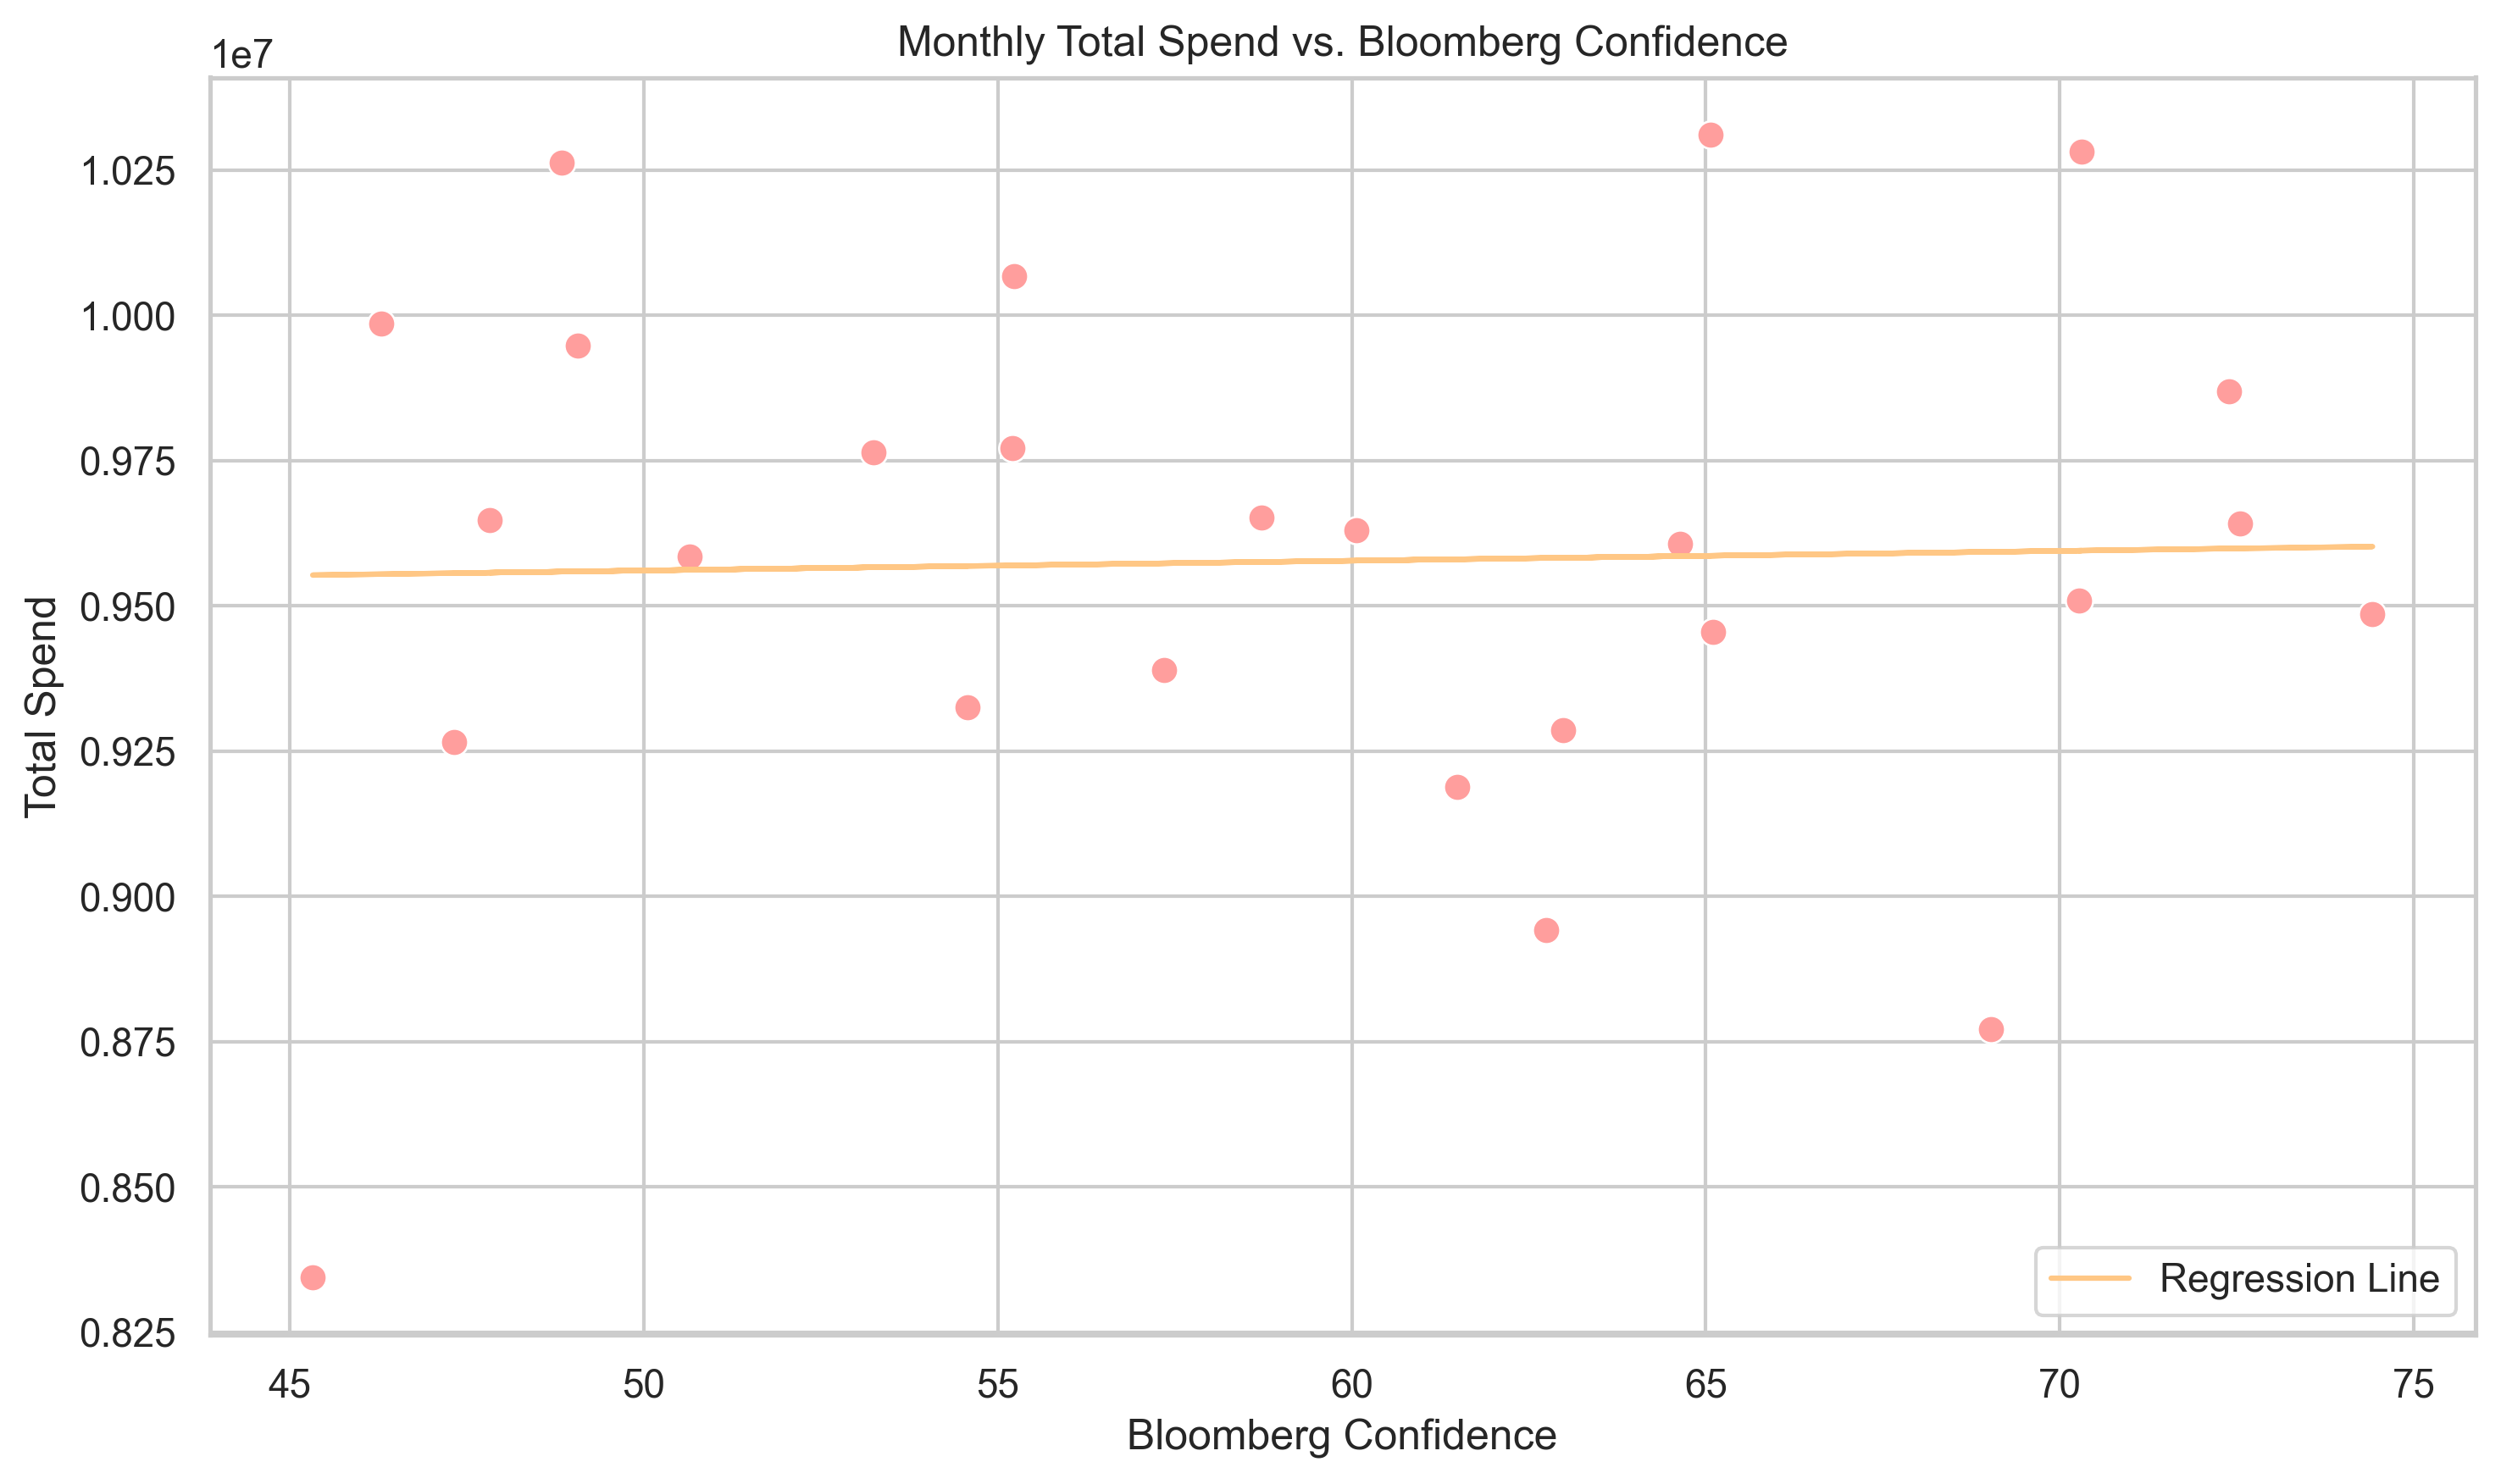

In [10]:

df["invoice_date"] = pd.to_datetime(df["invoice_date"])
df["month"] = df["invoice_date"].dt.to_period("M")

# Choose which confidence index to analyze
conf_var = "bloomberg_confidence"   # or "ipsos_confidence"

# Monthly aggregation
monthly_summary = (
    df.groupby("month")
      .agg(
          total_transactions=("invoice_no", "count"),
          total_spend=("total_price", "sum"),
          conf_index=(conf_var, "mean")
      )
      .reset_index()
)

print("\nMonthly summary before filtering:\n")
print(monthly_summary)

# Remove low-count months
monthly_summary_clean = monthly_summary[monthly_summary["total_transactions"] > 2000]

print("\nMonthly summary after removing low-count month:\n")
print(monthly_summary_clean)

# ---------- MODEL 1: total_transactions ----------
X1 = sm.add_constant(monthly_summary_clean["conf_index"])
y1 = monthly_summary_clean["total_transactions"]

model1 = sm.OLS(y1, X1).fit()

print("\nRegression summary (Transaction Count):\n")
print(model1.summary())

slope1 = model1.params["conf_index"]
p_value1 = model1.pvalues["conf_index"]

if p_value1 < 0.05:
    print(f"\n✅ The correlation is statistically significant. Slope = {slope1:.4f}, p = {p_value1:.4f}.")
else:
    print(f"\n❌ The correlation is not statistically significant. Slope = {slope1:.4f}, p = {p_value1:.4f}.")

# Scatter plot for total_transactions
plt.figure(figsize=(10,6), dpi=300)
sns.scatterplot(
    data=monthly_summary_clean,
    x="conf_index",
    y="total_transactions",
    s=60,
    color=color1,
)

y1_pred = model1.predict(X1)

plt.plot(
    monthly_summary_clean["conf_index"],
    y1_pred,
    color=color2,
    label="Regression Line"
)

plt.title(f"Monthly Total Transactions vs. {conf_var.replace('_',' ').title()}")
plt.xlabel(f"{conf_var.replace('_',' ').title()}")
plt.ylabel("Total Transactions")
plt.legend()
plt.tight_layout()
plt.savefig("dataset_new_indexes_economic_impact_figures/bloomberg_transaction_count.png", dpi=300)
plt.show()

# ---------- MODEL 2: total_spend ----------
X2 = sm.add_constant(monthly_summary_clean["conf_index"])
y2 = monthly_summary_clean["total_spend"]

model2 = sm.OLS(y2, X2).fit()

print("\nRegression summary (Total Spend):\n")
print(model2.summary())

slope2 = model2.params["conf_index"]
p_value2 = model2.pvalues["conf_index"]

if p_value2 < 0.05:
    print(f"\n✅ The correlation is statistically significant. Slope = {slope2:.4f}, p = {p_value2:.4f}.")
else:
    print(f"\n❌ The correlation is not statistically significant. Slope = {slope2:.4f}, p = {p_value2:.4f}.")

# Scatter plot for total_spend
plt.figure(figsize=(10,6), dpi=300)
sns.scatterplot(
    data=monthly_summary_clean,
    x="conf_index",
    y="total_spend",
    s=60,
    color=color1,
)

y2_pred = model2.predict(X2)

plt.plot(
    monthly_summary_clean["conf_index"],
    y2_pred,
    color=color2,
    label="Regression Line"
)

plt.title(f"Monthly Total Spend vs. {conf_var.replace('_',' ').title()}")
plt.xlabel(f"{conf_var.replace('_',' ').title()}")
plt.ylabel("Total Spend")
plt.legend()
plt.tight_layout()
plt.savefig("dataset_new_indexes_economic_impact_figures/bloomberg_total_spend.png", dpi=300)
plt.show()


Ipsos Confidence  Transaction Count - Total Spend


Monthly summary before filtering:

      month  total_transactions  total_spend  conf_index
0   2021-01                3835   9641614.62        31.7
1   2021-02                3407   8772315.22        32.0
2   2021-03                3813   9455359.38        33.6
3   2021-04                3724   9389541.54        32.0
4   2021-05                3848   9771756.97        30.0
5   2021-06                3783   9286271.35        28.5
6   2021-07                3984  10311119.68        30.0
7   2021-08                3723   9630655.70        28.7
8   2021-09                3670   9188165.62        29.4
9   2021-10                3916  10263015.06        28.9
10  2021-11                3798   9265555.29        30.3
11  2021-12                3881   9585200.16        28.7
12  2022-01                3847   9764311.14        29.3
13  2022-02                3447   8344111.92        29.2
14  2022-03                3947   9986685.16        30.2
15  2022-04                3763   9326144.44        

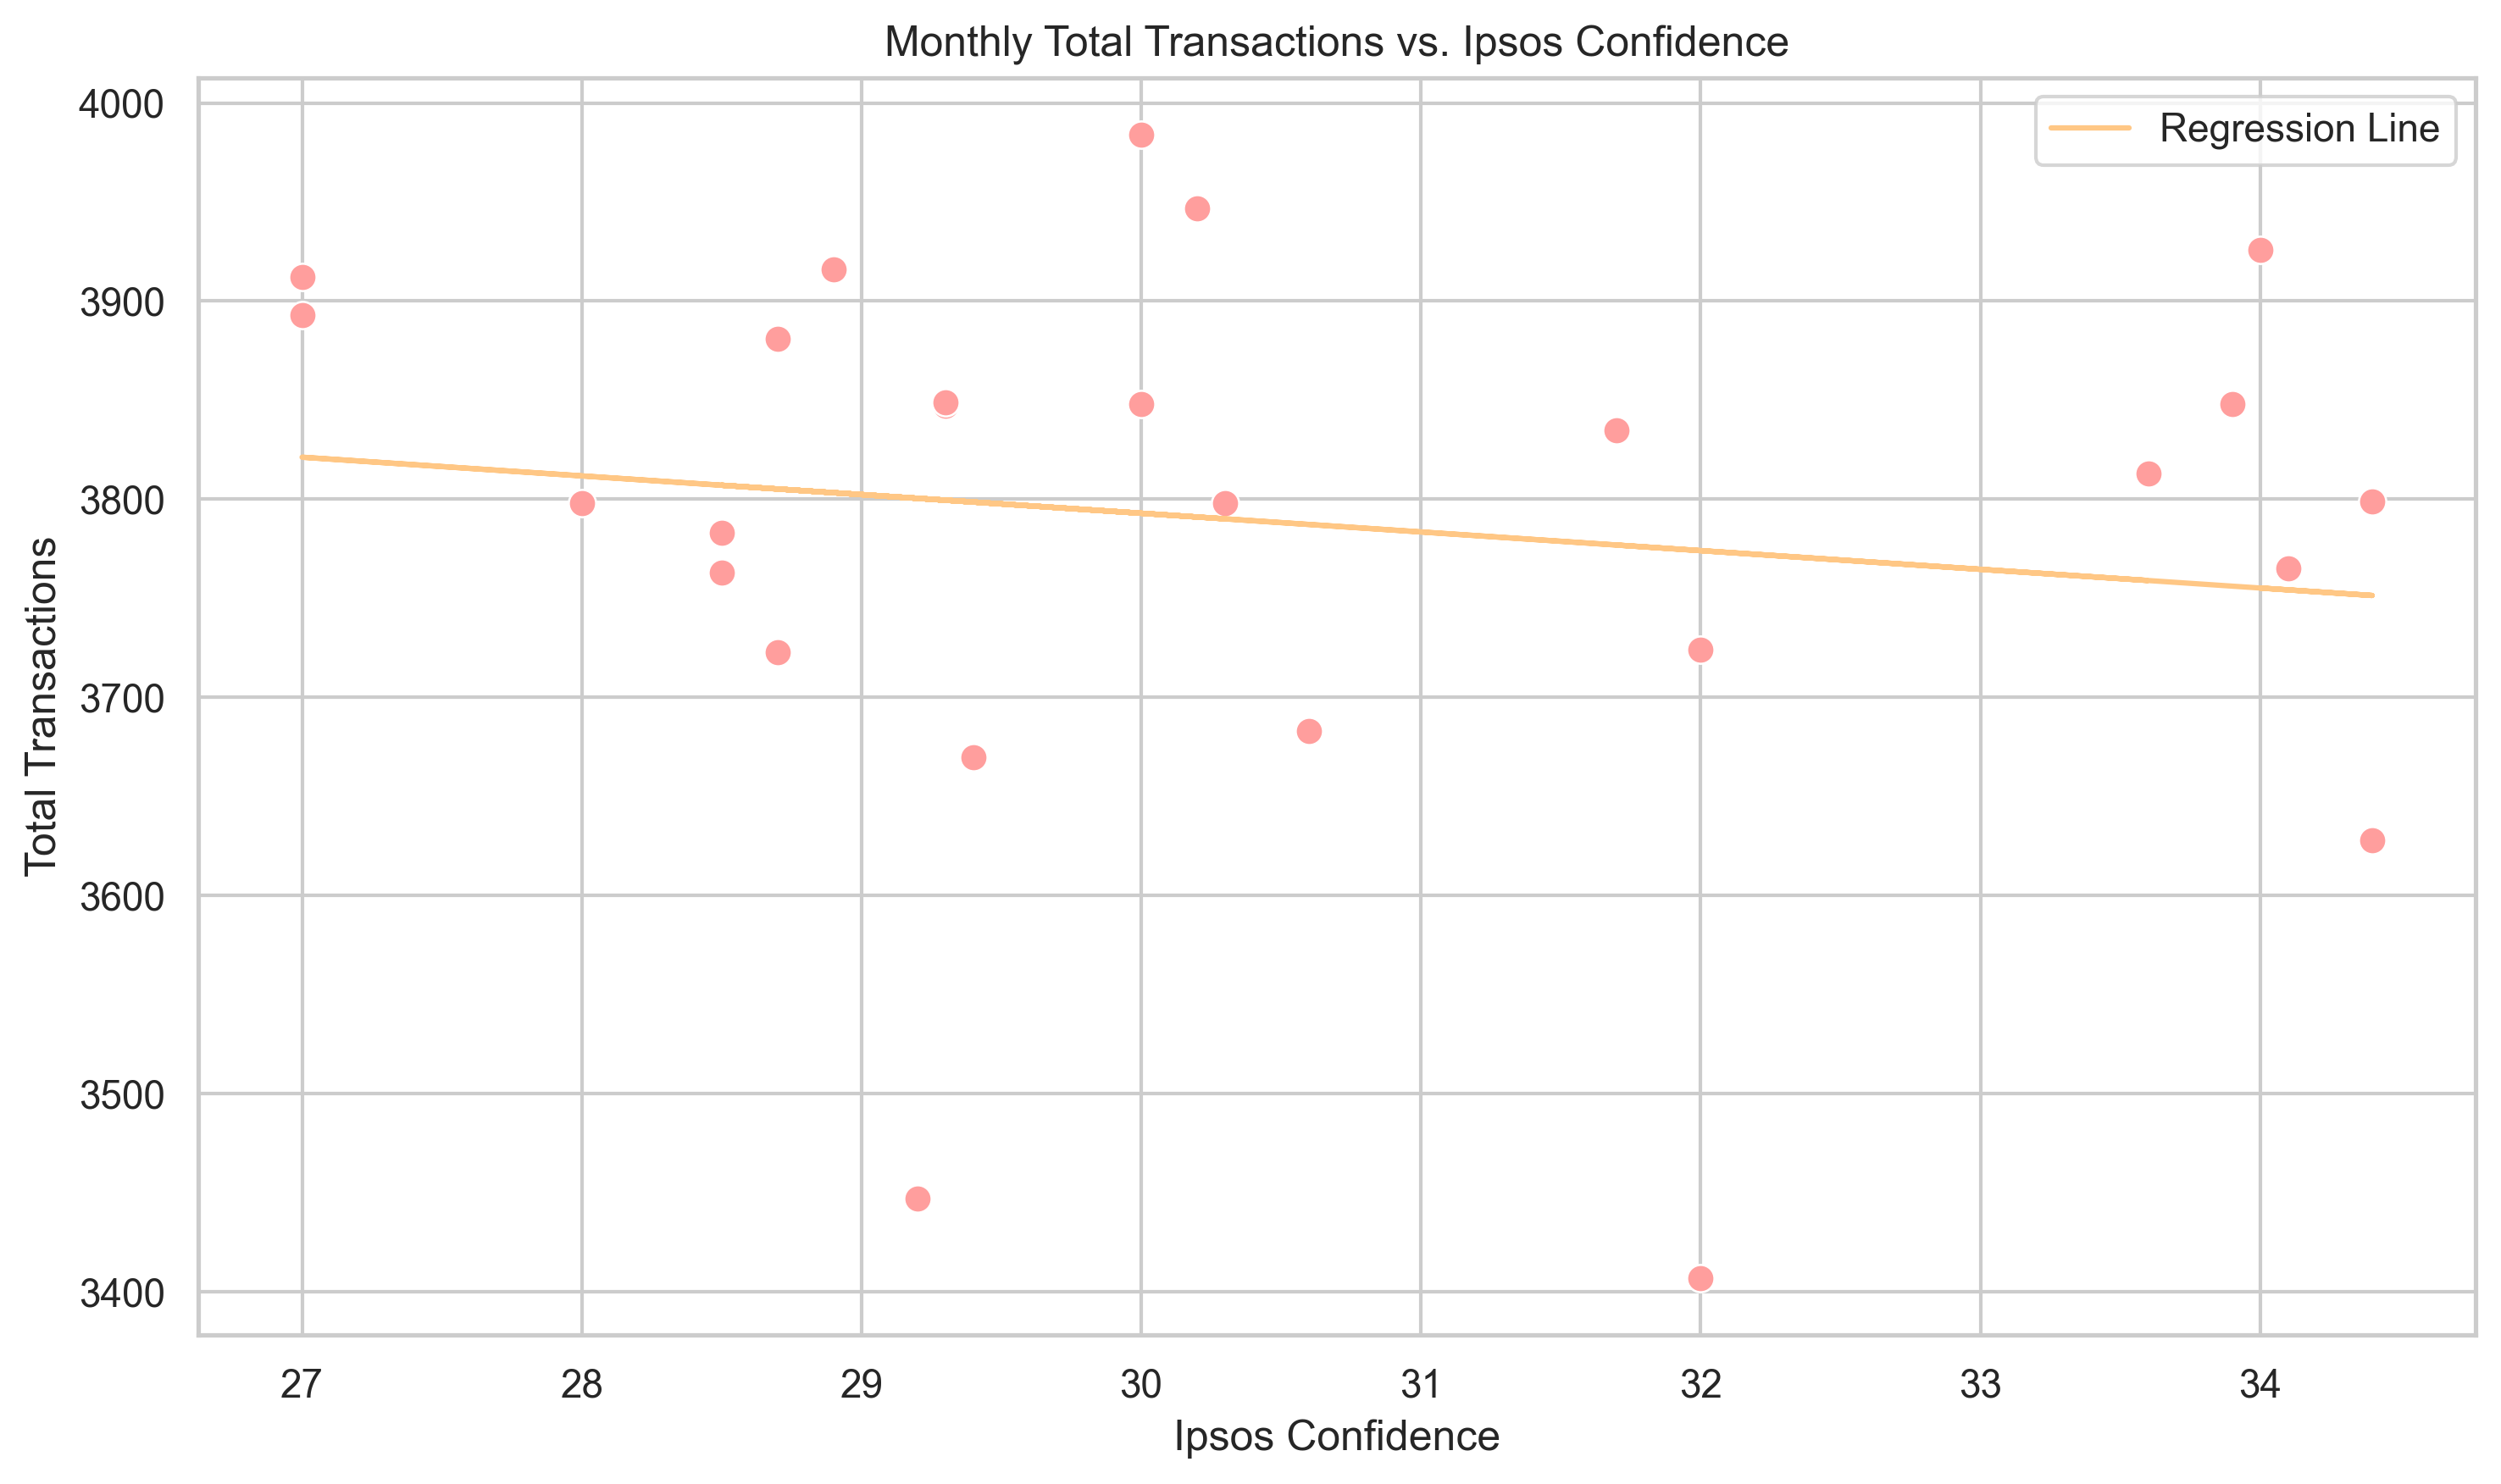


Regression summary (Total Spend):

                            OLS Regression Results                            
Dep. Variable:            total_spend   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.032
Method:                 Least Squares   F-statistic:                    0.2210
Date:                Mon, 14 Jul 2025   Prob (F-statistic):              0.643
Time:                        16:23:13   Log-Likelihood:                -375.20
No. Observations:                  26   AIC:                             754.4
Df Residuals:                      24   BIC:                             756.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.01

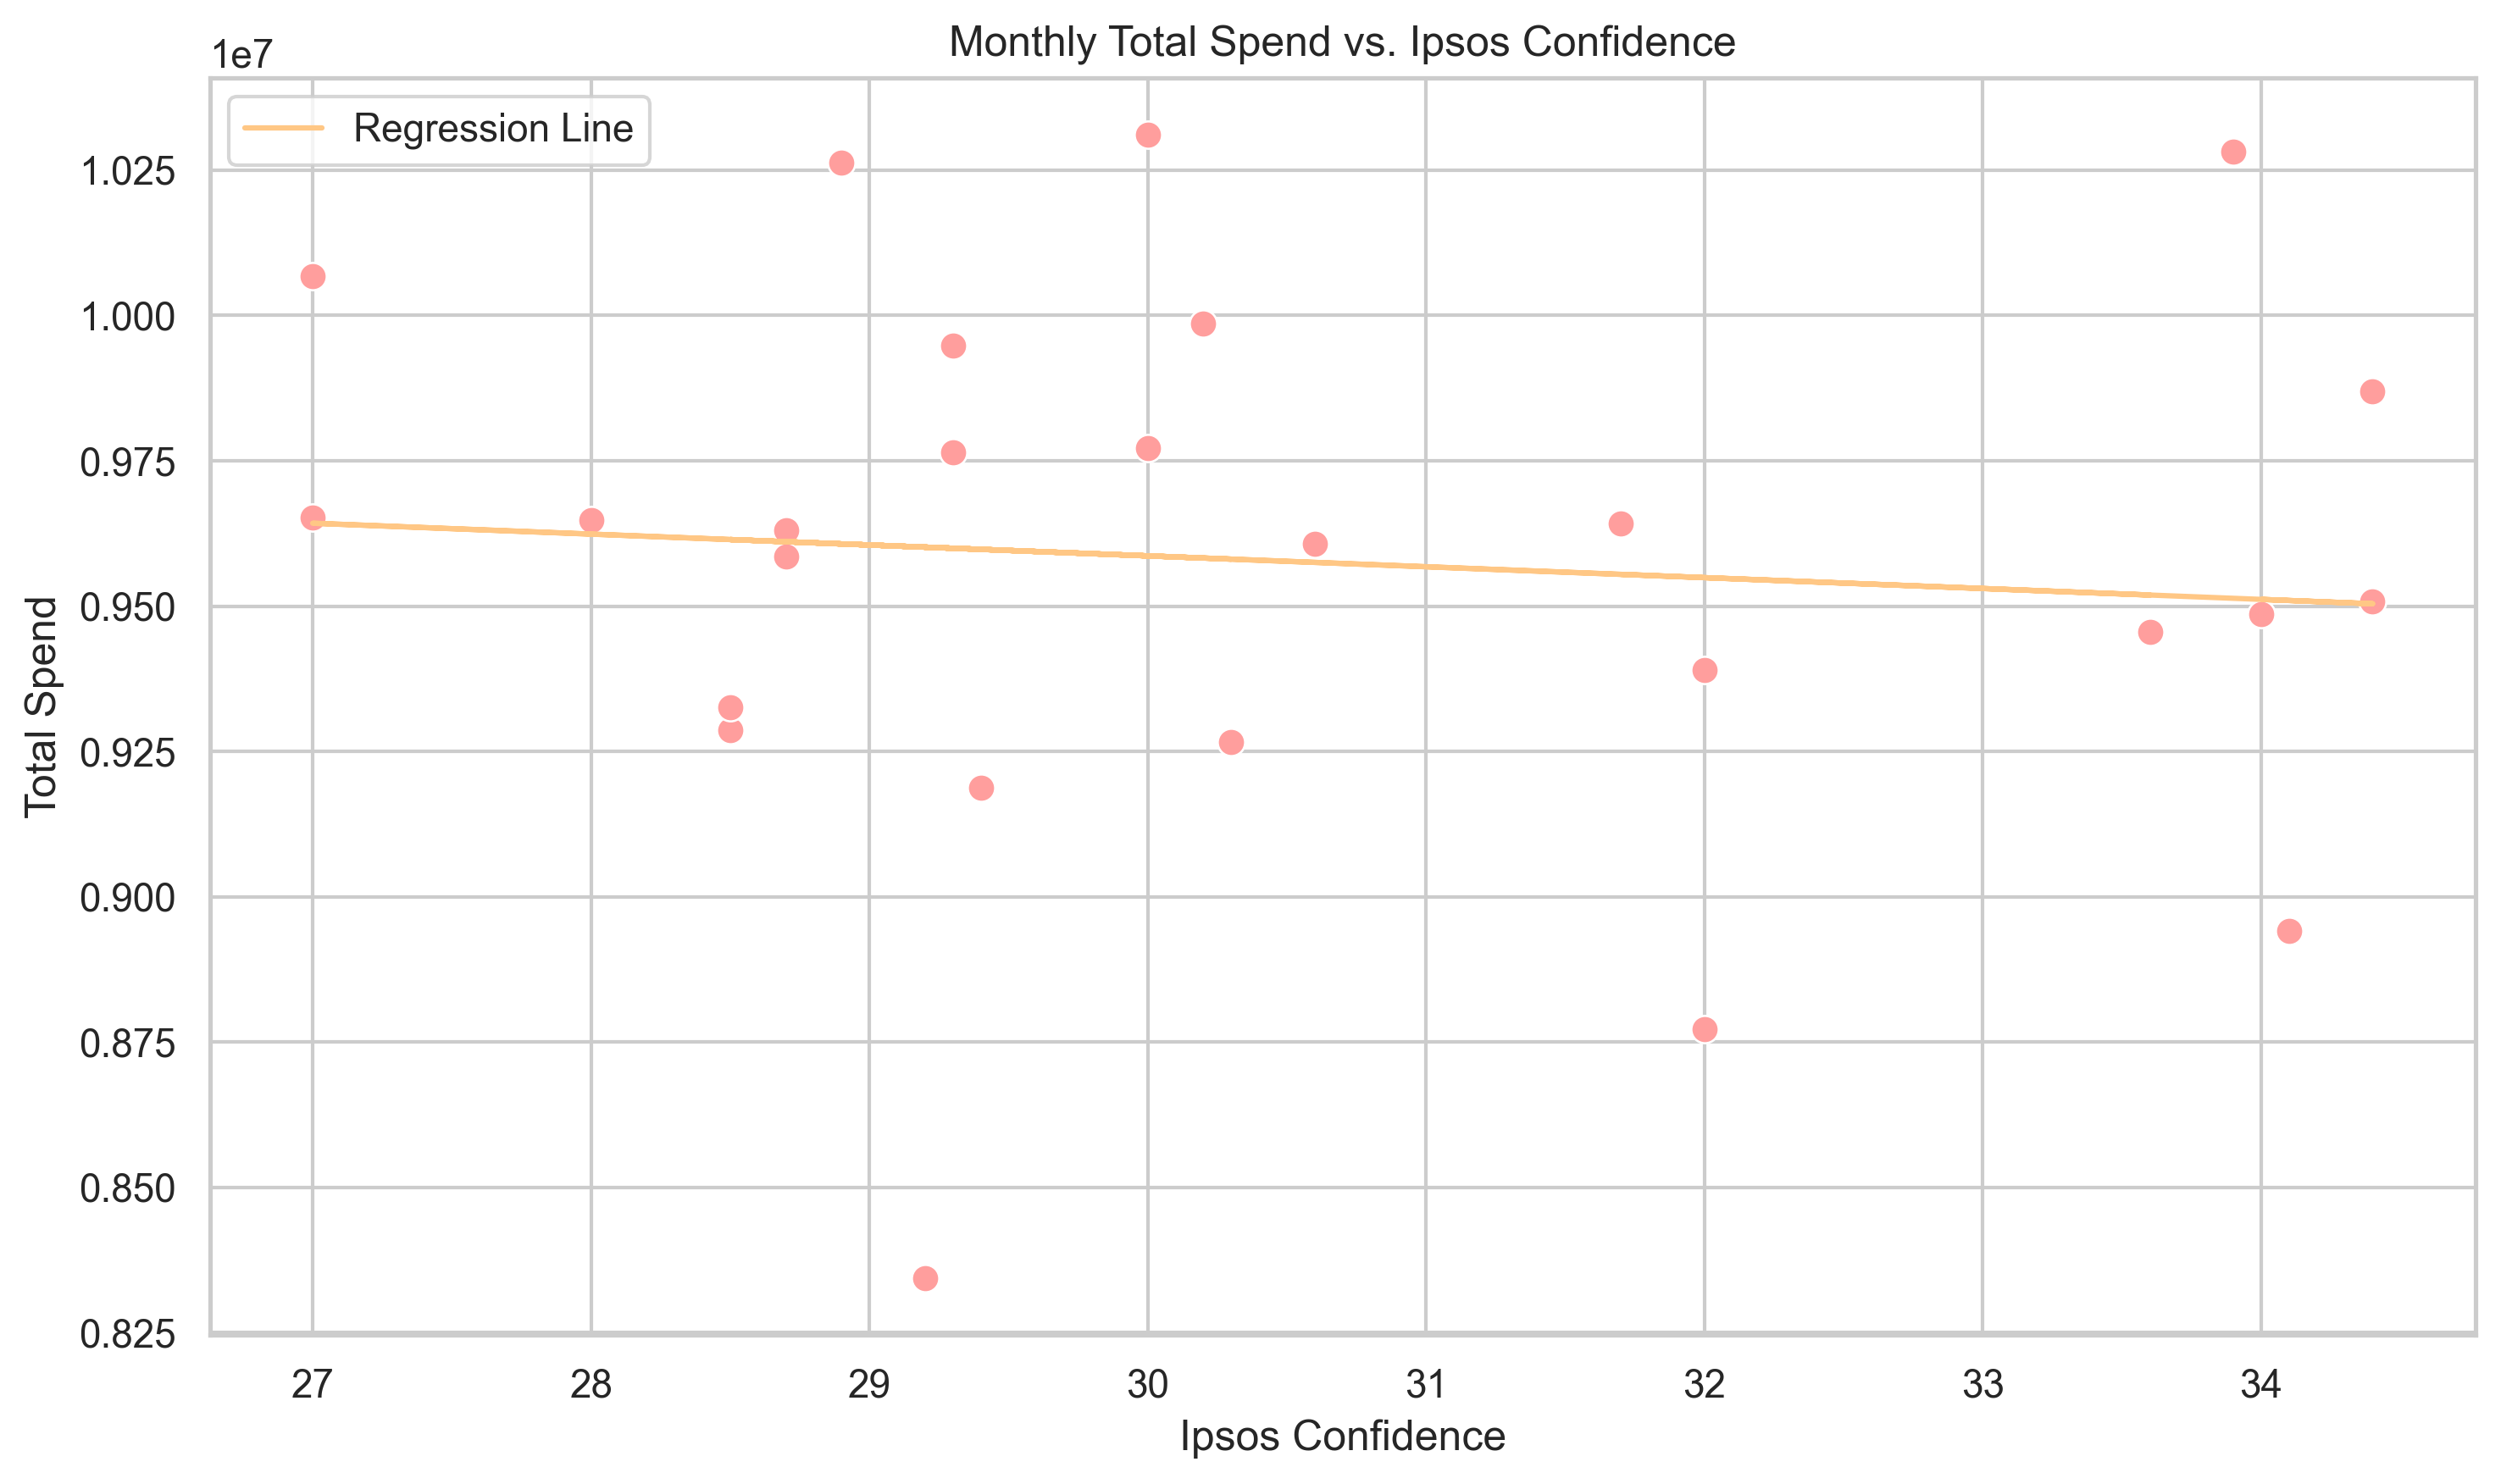

In [11]:

df["invoice_date"] = pd.to_datetime(df["invoice_date"])
df["month"] = df["invoice_date"].dt.to_period("M")

# Choose which confidence index to analyze
conf_var = "ipsos_confidence"

# Monthly aggregation
monthly_summary = (
    df.groupby("month")
      .agg(
          total_transactions=("invoice_no", "count"),
          total_spend=("total_price", "sum"),
          conf_index=(conf_var, "mean")
      )
      .reset_index()
)

print("\nMonthly summary before filtering:\n")
print(monthly_summary)

# Remove low-count months
monthly_summary_clean = monthly_summary[monthly_summary["total_transactions"] > 2000]

print("\nMonthly summary after removing low-count month:\n")
print(monthly_summary_clean)

# ---------- MODEL 1: total_transactions ----------
X1 = sm.add_constant(monthly_summary_clean["conf_index"])
y1 = monthly_summary_clean["total_transactions"]

model1 = sm.OLS(y1, X1).fit()

print("\nRegression summary (Transaction Count):\n")
print(model1.summary())

slope1 = model1.params["conf_index"]
p_value1 = model1.pvalues["conf_index"]

if p_value1 < 0.05:
    print(f"\n✅ The correlation is statistically significant. Slope = {slope1:.4f}, p = {p_value1:.4f}.")
else:
    print(f"\n❌ The correlation is not statistically significant. Slope = {slope1:.4f}, p = {p_value1:.4f}.")

# Scatter plot for total_transactions
plt.figure(figsize=(10,6), dpi=300)
sns.scatterplot(
    data=monthly_summary_clean,
    x="conf_index",
    y="total_transactions",
    s=60,
    color=color1,
)

y1_pred = model1.predict(X1)

plt.plot(
    monthly_summary_clean["conf_index"],
    y1_pred,
    color=color2,
    label="Regression Line"
)

plt.title(f"Monthly Total Transactions vs. {conf_var.replace('_',' ').title()}")
plt.xlabel(f"{conf_var.replace('_',' ').title()}")
plt.ylabel("Total Transactions")
plt.legend()
plt.tight_layout()
plt.savefig('dataset_new_indexes_economic_impact_figures/ipsos_total_transactions.png', dpi=300)
plt.show()

# ---------- MODEL 2: total_spend ----------
X2 = sm.add_constant(monthly_summary_clean["conf_index"])
y2 = monthly_summary_clean["total_spend"]

model2 = sm.OLS(y2, X2).fit()

print("\nRegression summary (Total Spend):\n")
print(model2.summary())

slope2 = model2.params["conf_index"]
p_value2 = model2.pvalues["conf_index"]

if p_value2 < 0.05:
    print(f"\n✅ The correlation is statistically significant. Slope = {slope2:.4f}, p = {p_value2:.4f}.")
else:
    print(f"\n❌ The correlation is not statistically significant. Slope = {slope2:.4f}, p = {p_value2:.4f}.")

# Scatter plot for total_spend
plt.figure(figsize=(10,6), dpi=300)
sns.scatterplot(
    data=monthly_summary_clean,
    x="conf_index",
    y="total_spend",
    s=60,
    color=color1
)

y2_pred = model2.predict(X2)

plt.plot(
    monthly_summary_clean["conf_index"],
    y2_pred,
    color=color2,
    label="Regression Line"
)

plt.title(f"Monthly Total Spend vs. {conf_var.replace('_',' ').title()}")
plt.xlabel(f"{conf_var.replace('_',' ').title()}")
plt.ylabel("Total Spend")
plt.legend()
plt.tight_layout()
plt.savefig('dataset_new_indexes_economic_impact_figures/ipsos_total_spend.png', dpi=300)
plt.show()


composite index - total transaction

In [12]:

df["invoice_date"] = pd.to_datetime(df["invoice_date"])
df["month"] = df["invoice_date"].dt.to_period("M")

# Aggregate all indices and Transaction Count
monthly_summary = (
    df.groupby("month")
      .agg(
          total_transactions=("invoice_no", "count"),
          bloomberg_confidence=("bloomberg_confidence", "mean"),
          ipsos_confidence=("ipsos_confidence", "mean"),
          econ_conf=("Econ_Conf", "mean"),
          cons_conf=("Cons_Conf", "mean"),
          realsec_conf=("RealSec_Conf", "mean")
      )
      .reset_index()
)

print("\nMonthly summary before filtering:\n")
print(monthly_summary)

# Remove months with very low transaction counts
monthly_summary_clean = monthly_summary[monthly_summary["total_transactions"] > 2000]

print("\nMonthly summary after removing low-count months:\n")
print(monthly_summary_clean)

# Prepare regression variables
X = monthly_summary_clean[[
    "bloomberg_confidence",
    "ipsos_confidence",
    "econ_conf",
    "cons_conf",
    "realsec_conf"
]]
X = sm.add_constant(X)
y = monthly_summary_clean["total_transactions"]

# Fit OLS model
model = sm.OLS(y, X).fit()

print("\nRegression summary (Transaction Count with all indices):\n")
print(model.summary())

# Evaluate p-values of each variable
for var in X.columns[1:]:
    p_val = model.pvalues[var]
    slope = model.params[var]
    if p_val < 0.05:
        print(f"\n✅ {var} is statistically significant. Slope = {slope:.4f}, p = {p_val:.4f}")
    else:
        print(f"\n❌ {var} is not statistically significant. Slope = {slope:.4f}, p = {p_val:.4f}")



Monthly summary before filtering:

      month  total_transactions  bloomberg_confidence  ipsos_confidence  \
0   2021-01                3835                 72.55              31.7   
1   2021-02                3407                 69.03              32.0   
2   2021-03                3813                 65.10              33.6   
3   2021-04                3724                 57.35              32.0   
4   2021-05                3848                 55.20              30.0   
5   2021-06                3783                 62.99              28.5   
6   2021-07                3984                 65.07              30.0   
7   2021-08                3723                 60.06              28.7   
8   2021-09                3670                 61.49              29.4   
9   2021-10                3916                 48.84              28.9   
10  2021-11                3798                 47.32              30.3   
11  2021-12                3881                 50.65           

composite index - total price


Normalized and smoothed data preview:

      month  transactions_z  transactions_z_ma   spend_z  spend_z_ma
0   2021-01        0.348664                NaN  0.144544         NaN
1   2021-02       -2.823806          -0.763183 -1.788182   -0.637733
2   2021-03        0.185593          -1.037439 -0.269560   -0.824545
3   2021-04       -0.474103           0.052171 -0.415894   -0.083854
4   2021-05        0.445024          -0.021952  0.433891   -0.209166
5   2021-06       -0.036776           0.620449 -0.645496    0.473820
6   2021-07        1.453099           0.311602  1.633064    0.369249
7   2021-08       -0.481515           0.032405  0.120179    0.296542
8   2021-09       -0.874368          -0.135607 -0.863616    0.260892
9   2021-10        0.949061           0.049701  1.526112   -0.009686
10  2021-11        0.074408           0.571033 -0.691554    0.284558
11  2021-12        0.689630           0.400550  0.019117   -0.085034
12  2022-01        0.437612          -0.466691  0.417337   -0.7

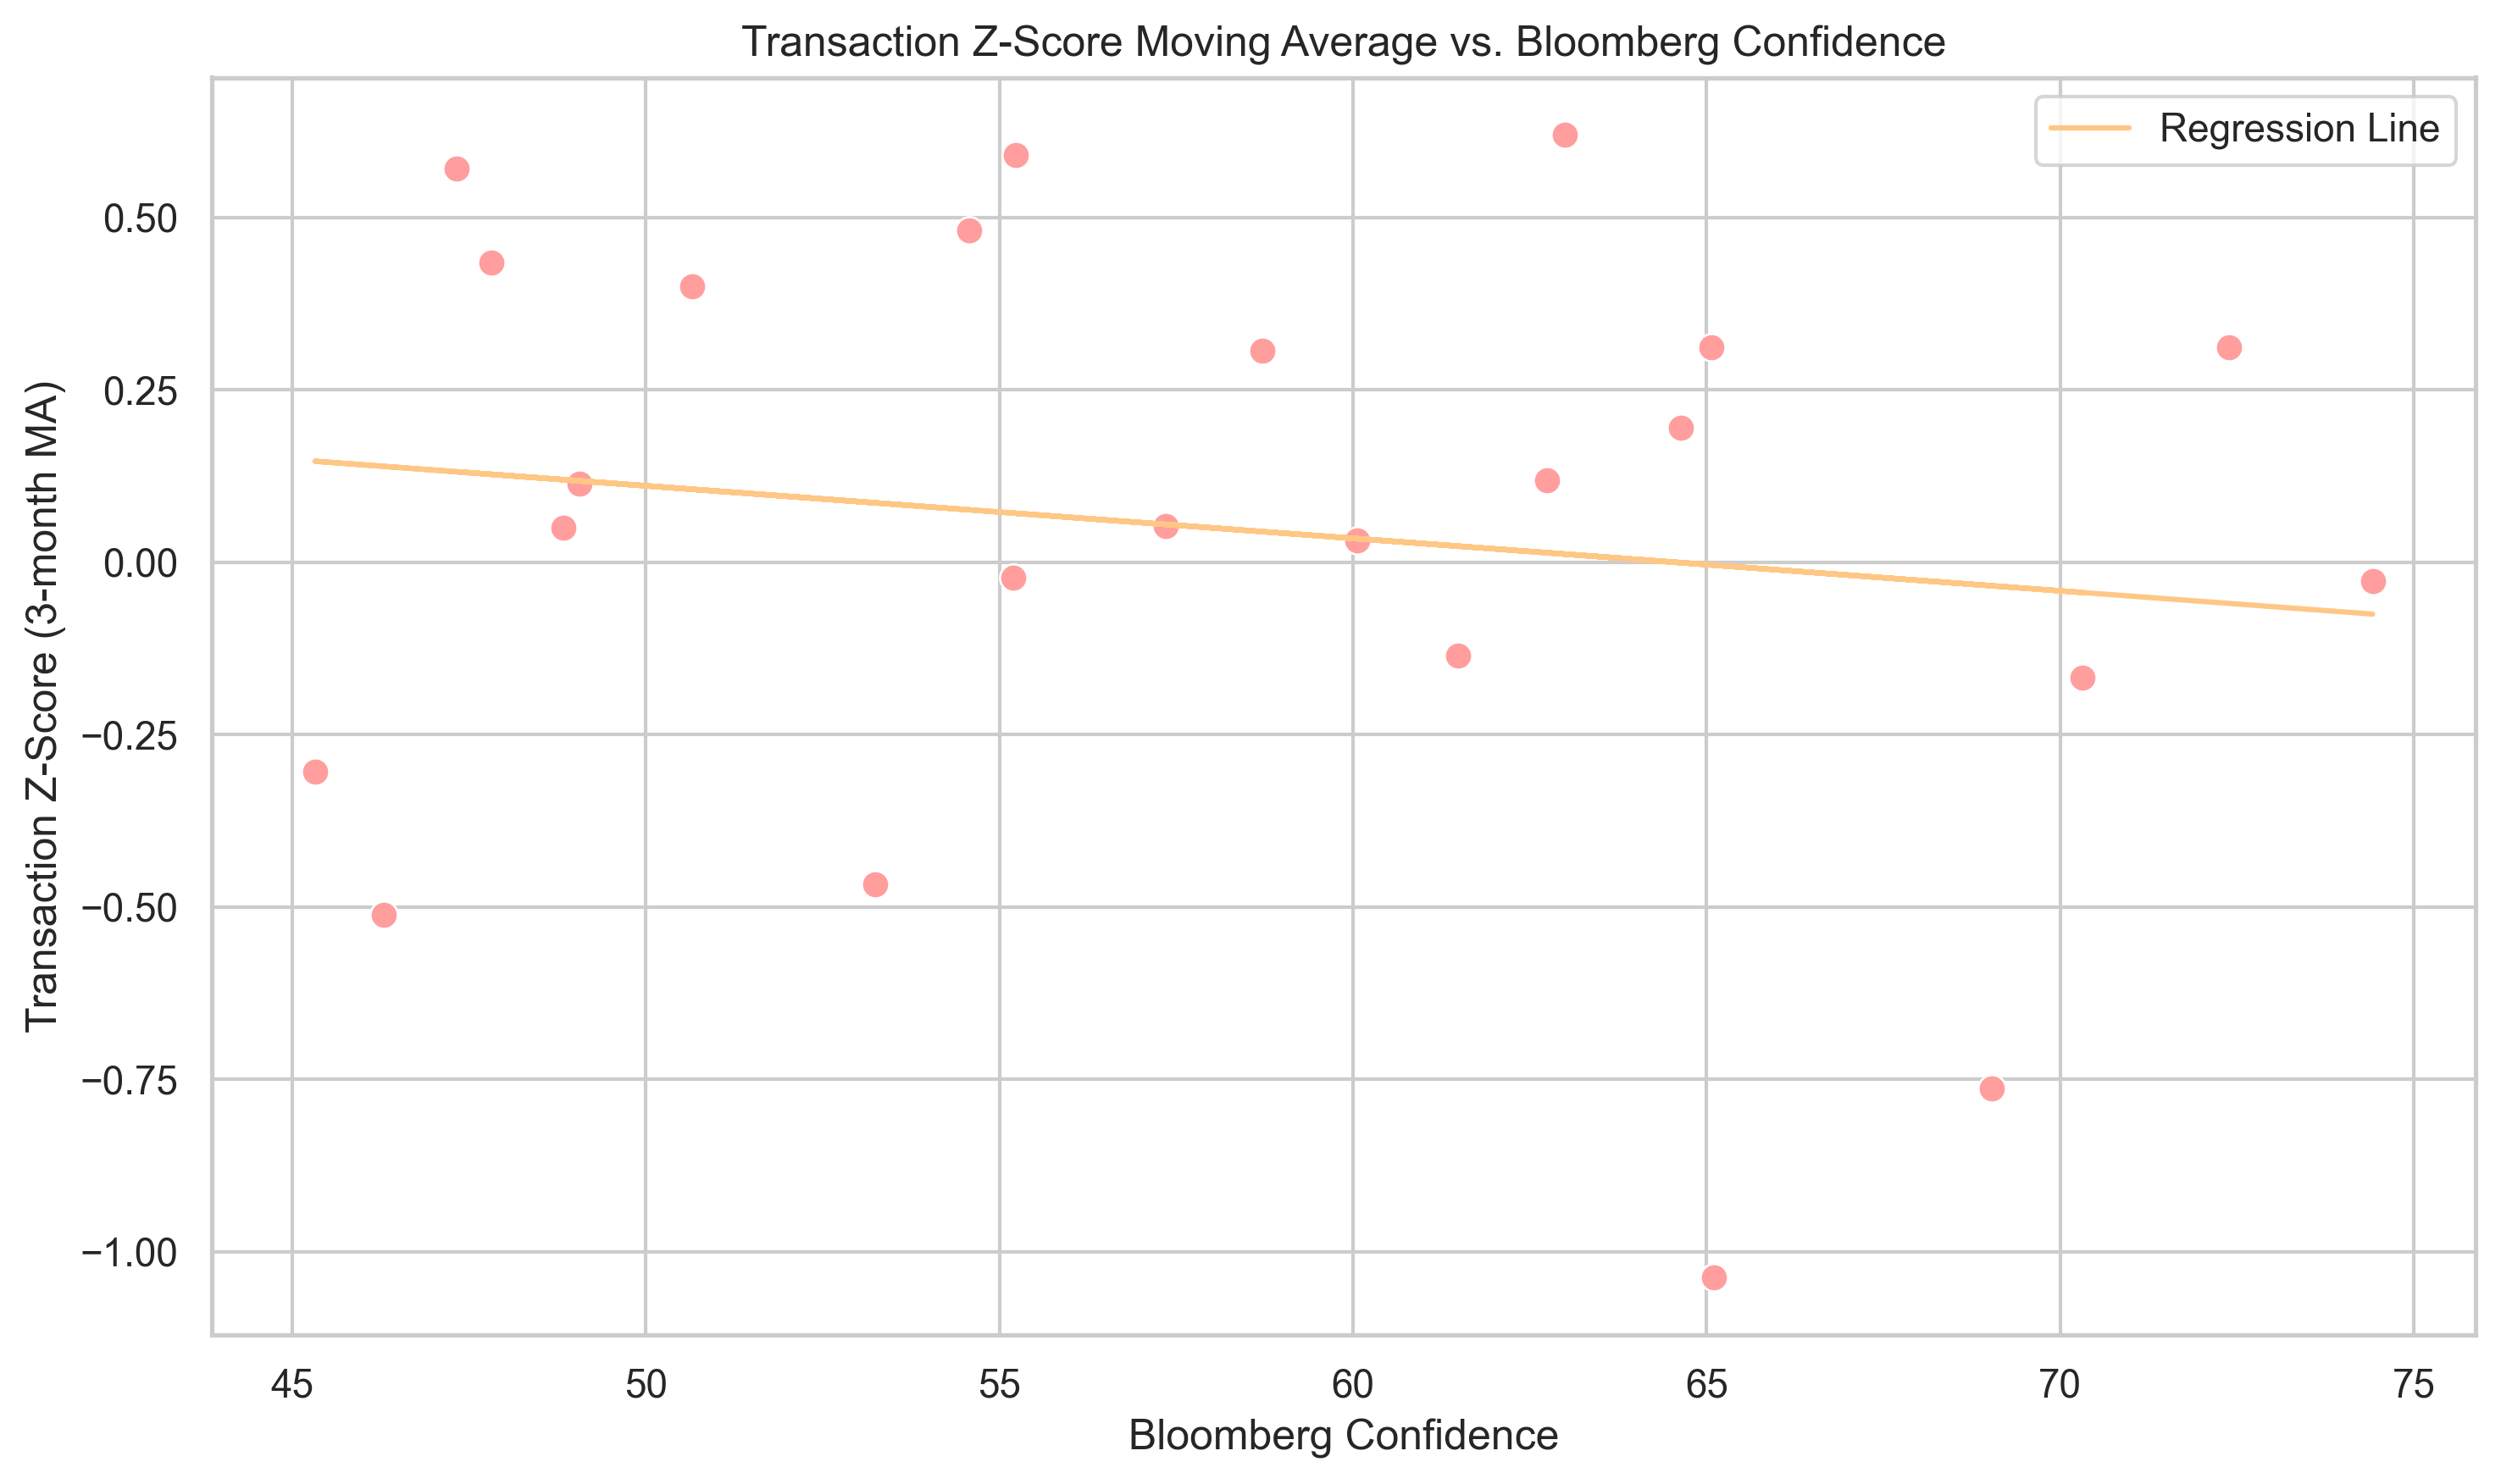


Regression on ipsos_confidence (Transaction Z-MA):

                            OLS Regression Results                            
Dep. Variable:      transactions_z_ma   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     4.794
Date:                Mon, 14 Jul 2025   Prob (F-statistic):             0.0394
Time:                        16:23:13   Log-Likelihood:                -10.841
No. Observations:                  24   AIC:                             25.68
Df Residuals:                      22   BIC:                             28.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

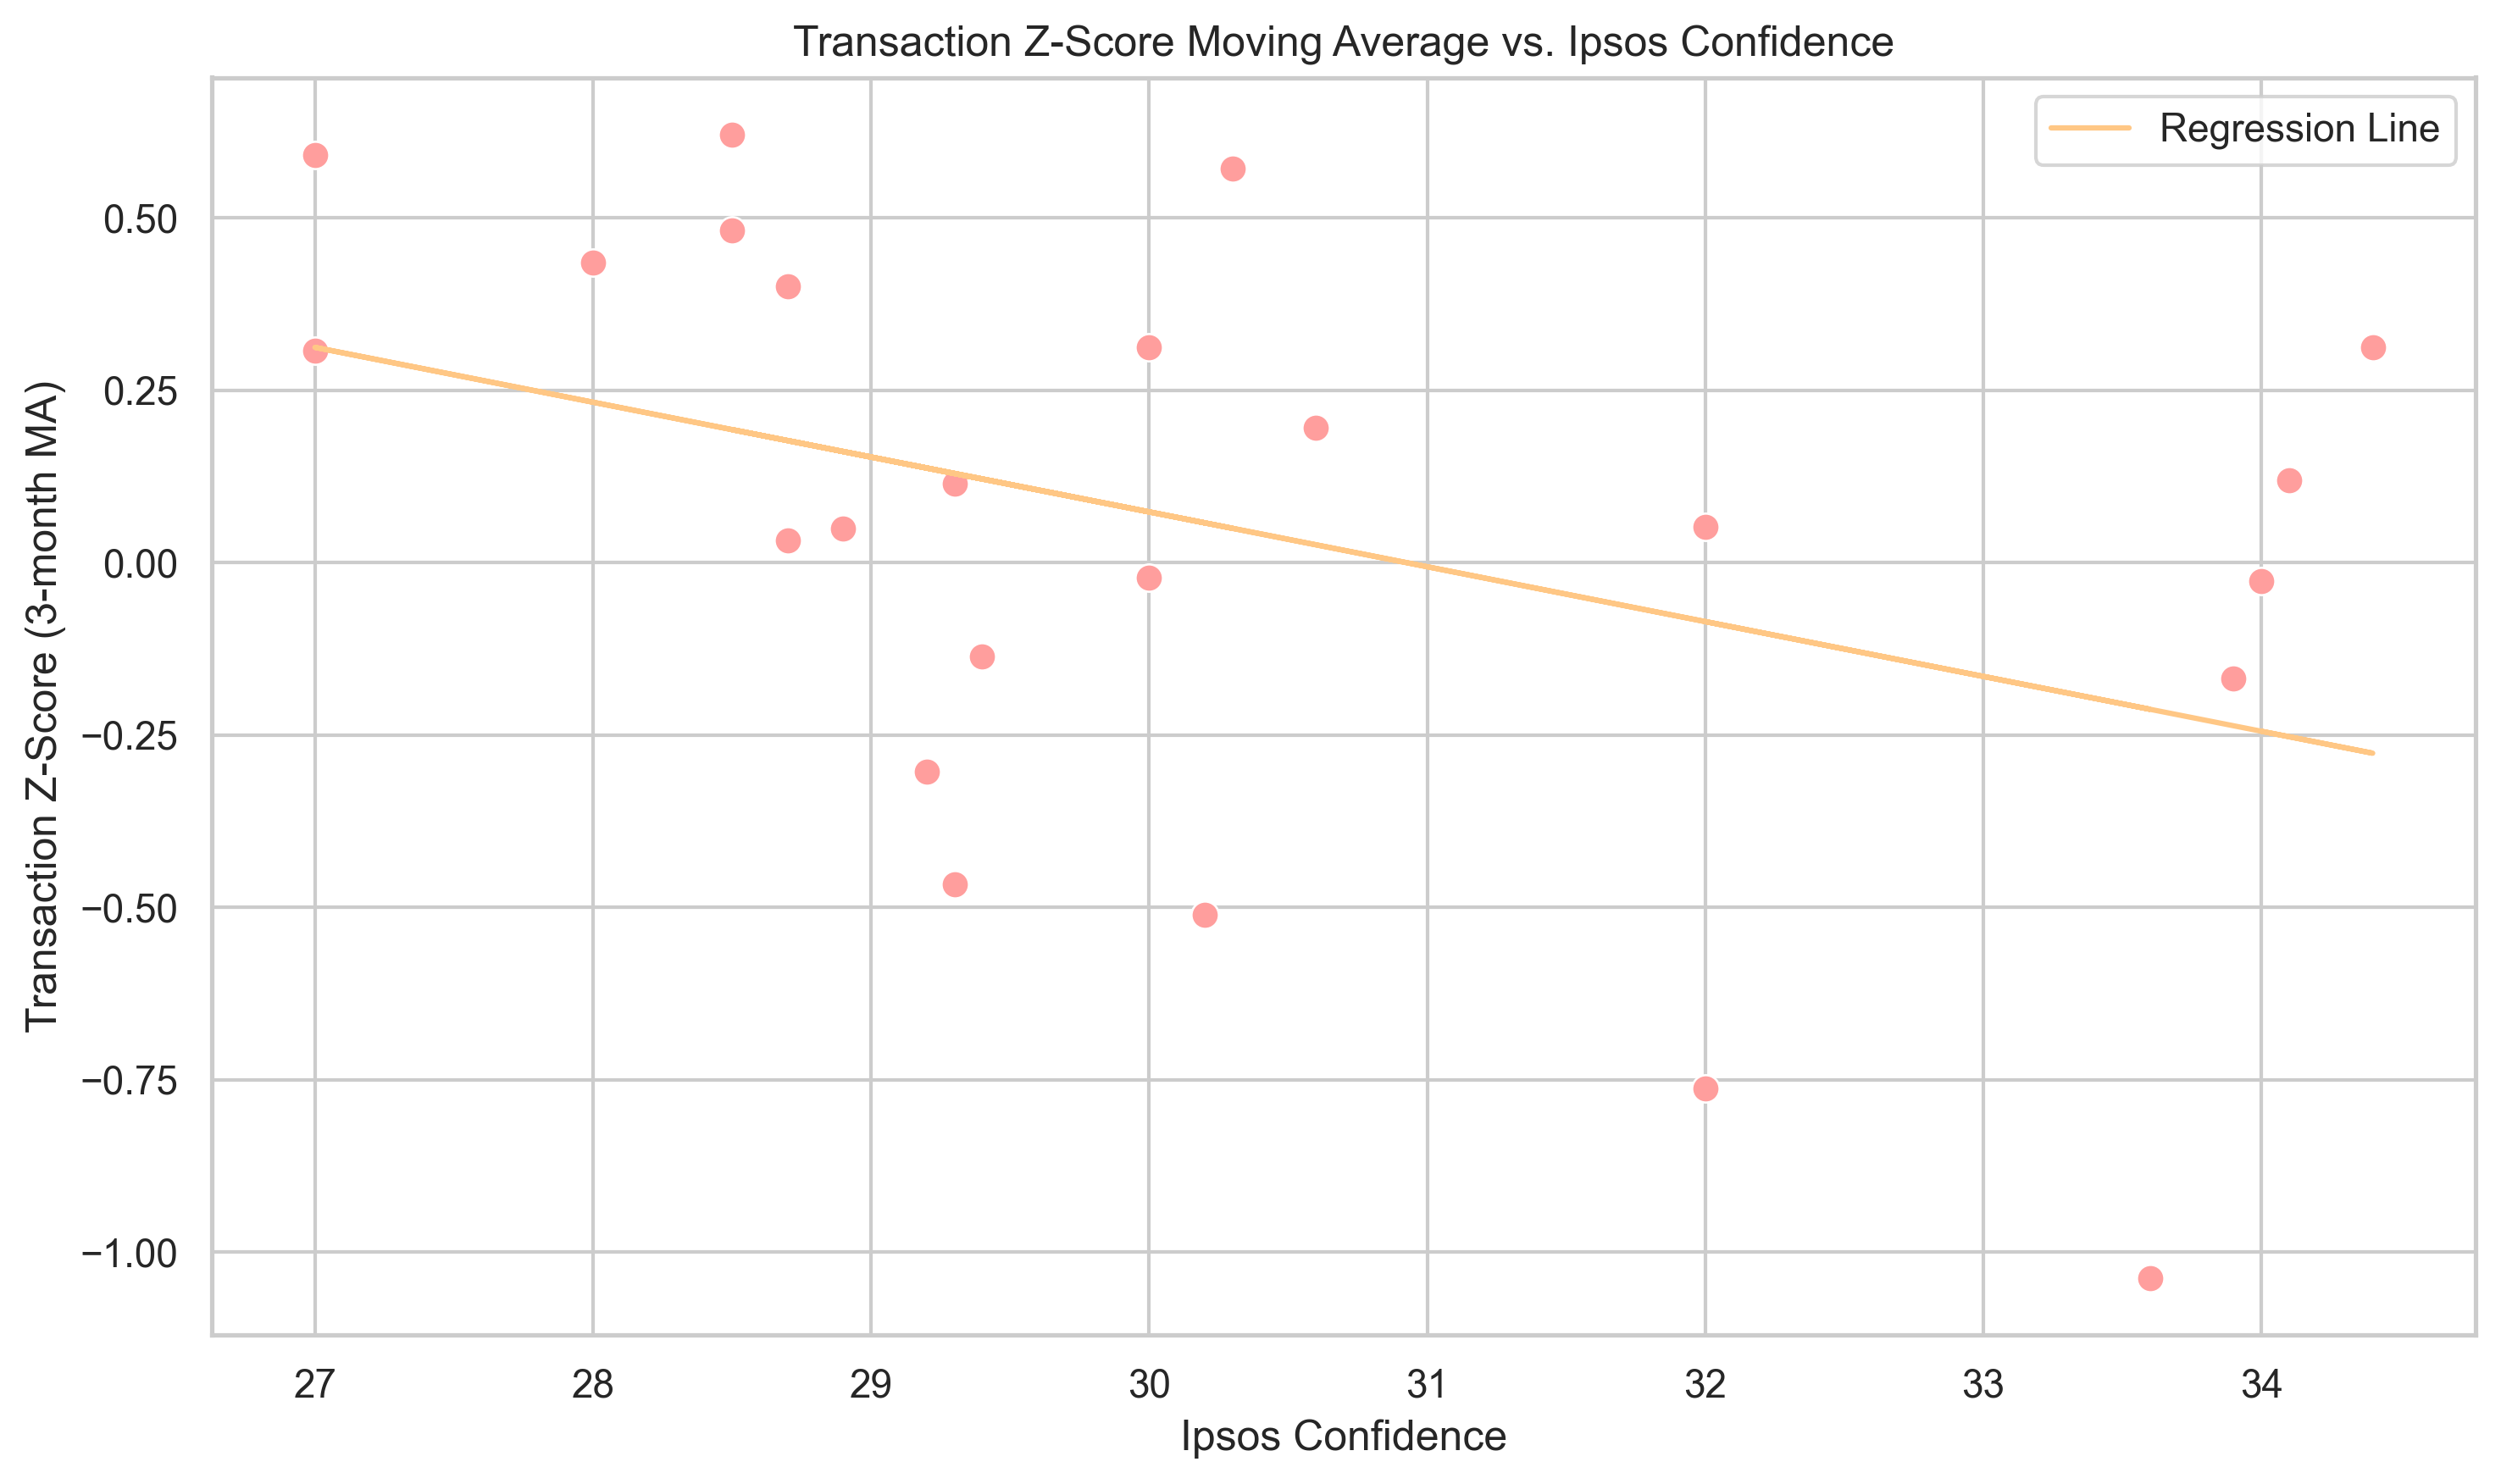


Regression on econ_conf (Transaction Z-MA):

                            OLS Regression Results                            
Dep. Variable:      transactions_z_ma   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                 -0.025
Method:                 Least Squares   F-statistic:                    0.4499
Date:                Mon, 14 Jul 2025   Prob (F-statistic):              0.509
Time:                        16:23:14   Log-Likelihood:                -12.964
No. Observations:                  24   AIC:                             29.93
Df Residuals:                      22   BIC:                             32.28
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const 

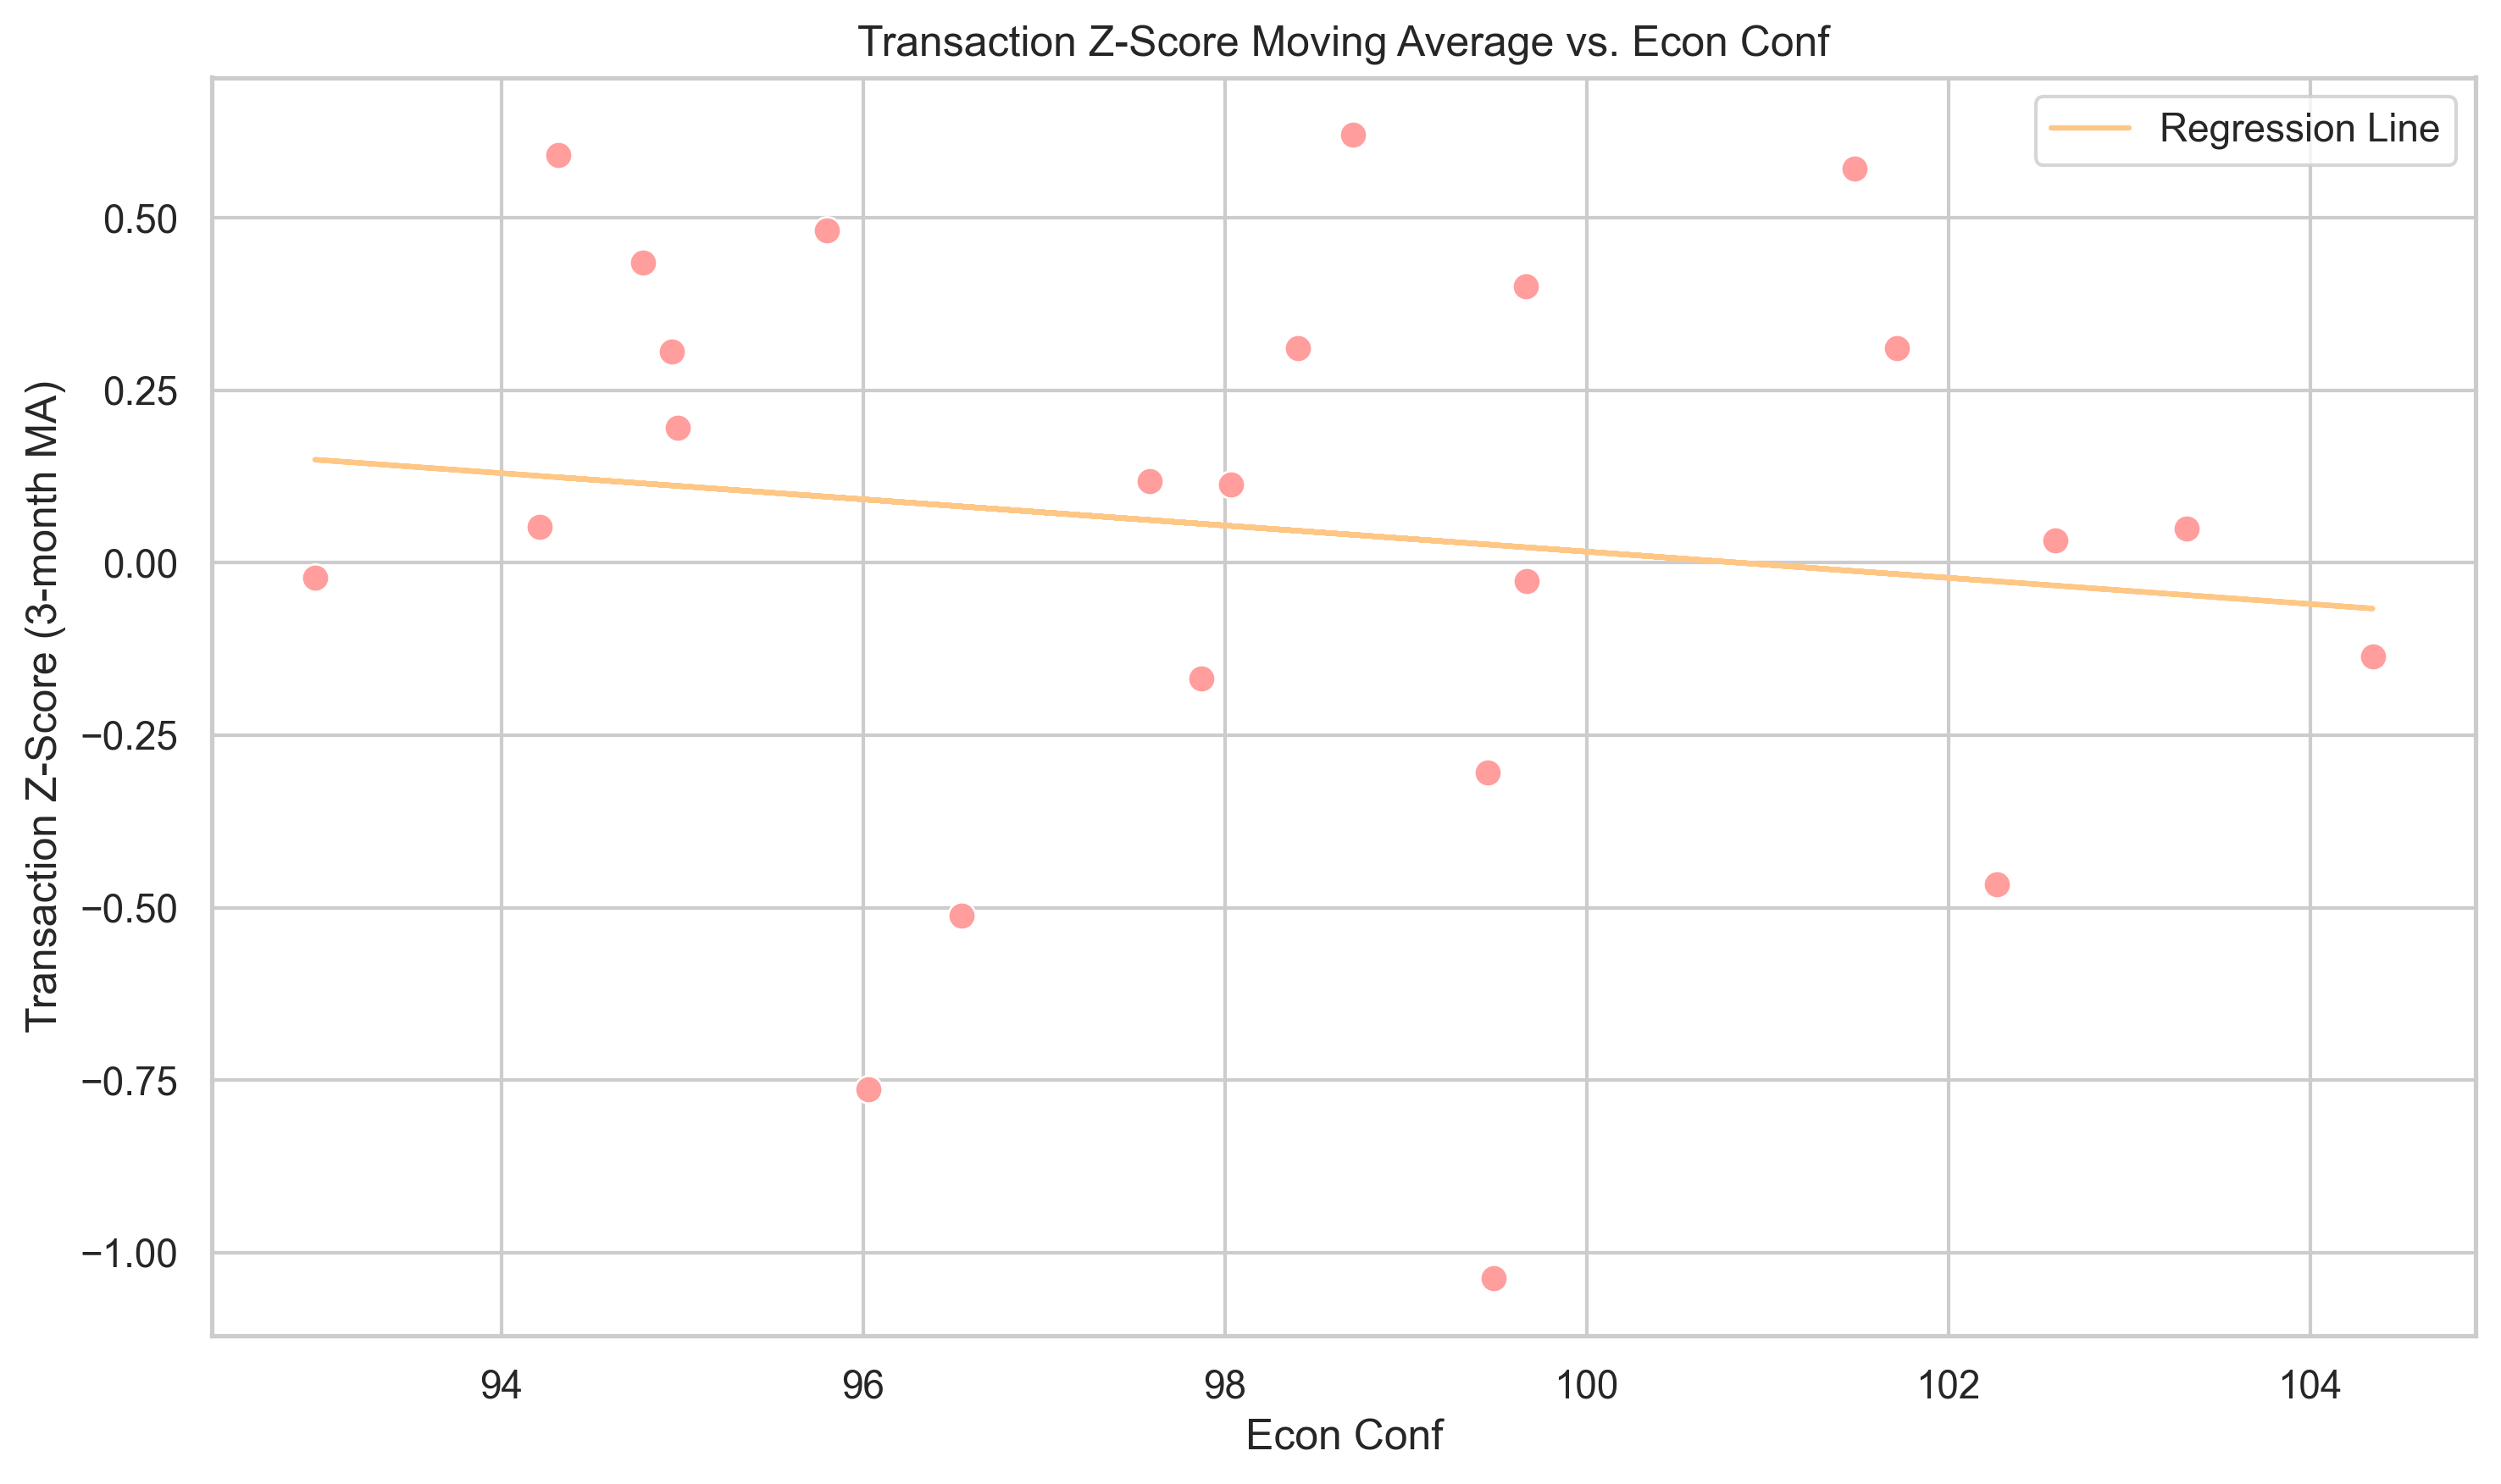


Regression on cons_conf (Transaction Z-MA):

                            OLS Regression Results                            
Dep. Variable:      transactions_z_ma   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     8.744
Date:                Mon, 14 Jul 2025   Prob (F-statistic):            0.00728
Time:                        16:23:14   Log-Likelihood:                -9.1913
No. Observations:                  24   AIC:                             22.38
Df Residuals:                      22   BIC:                             24.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const 

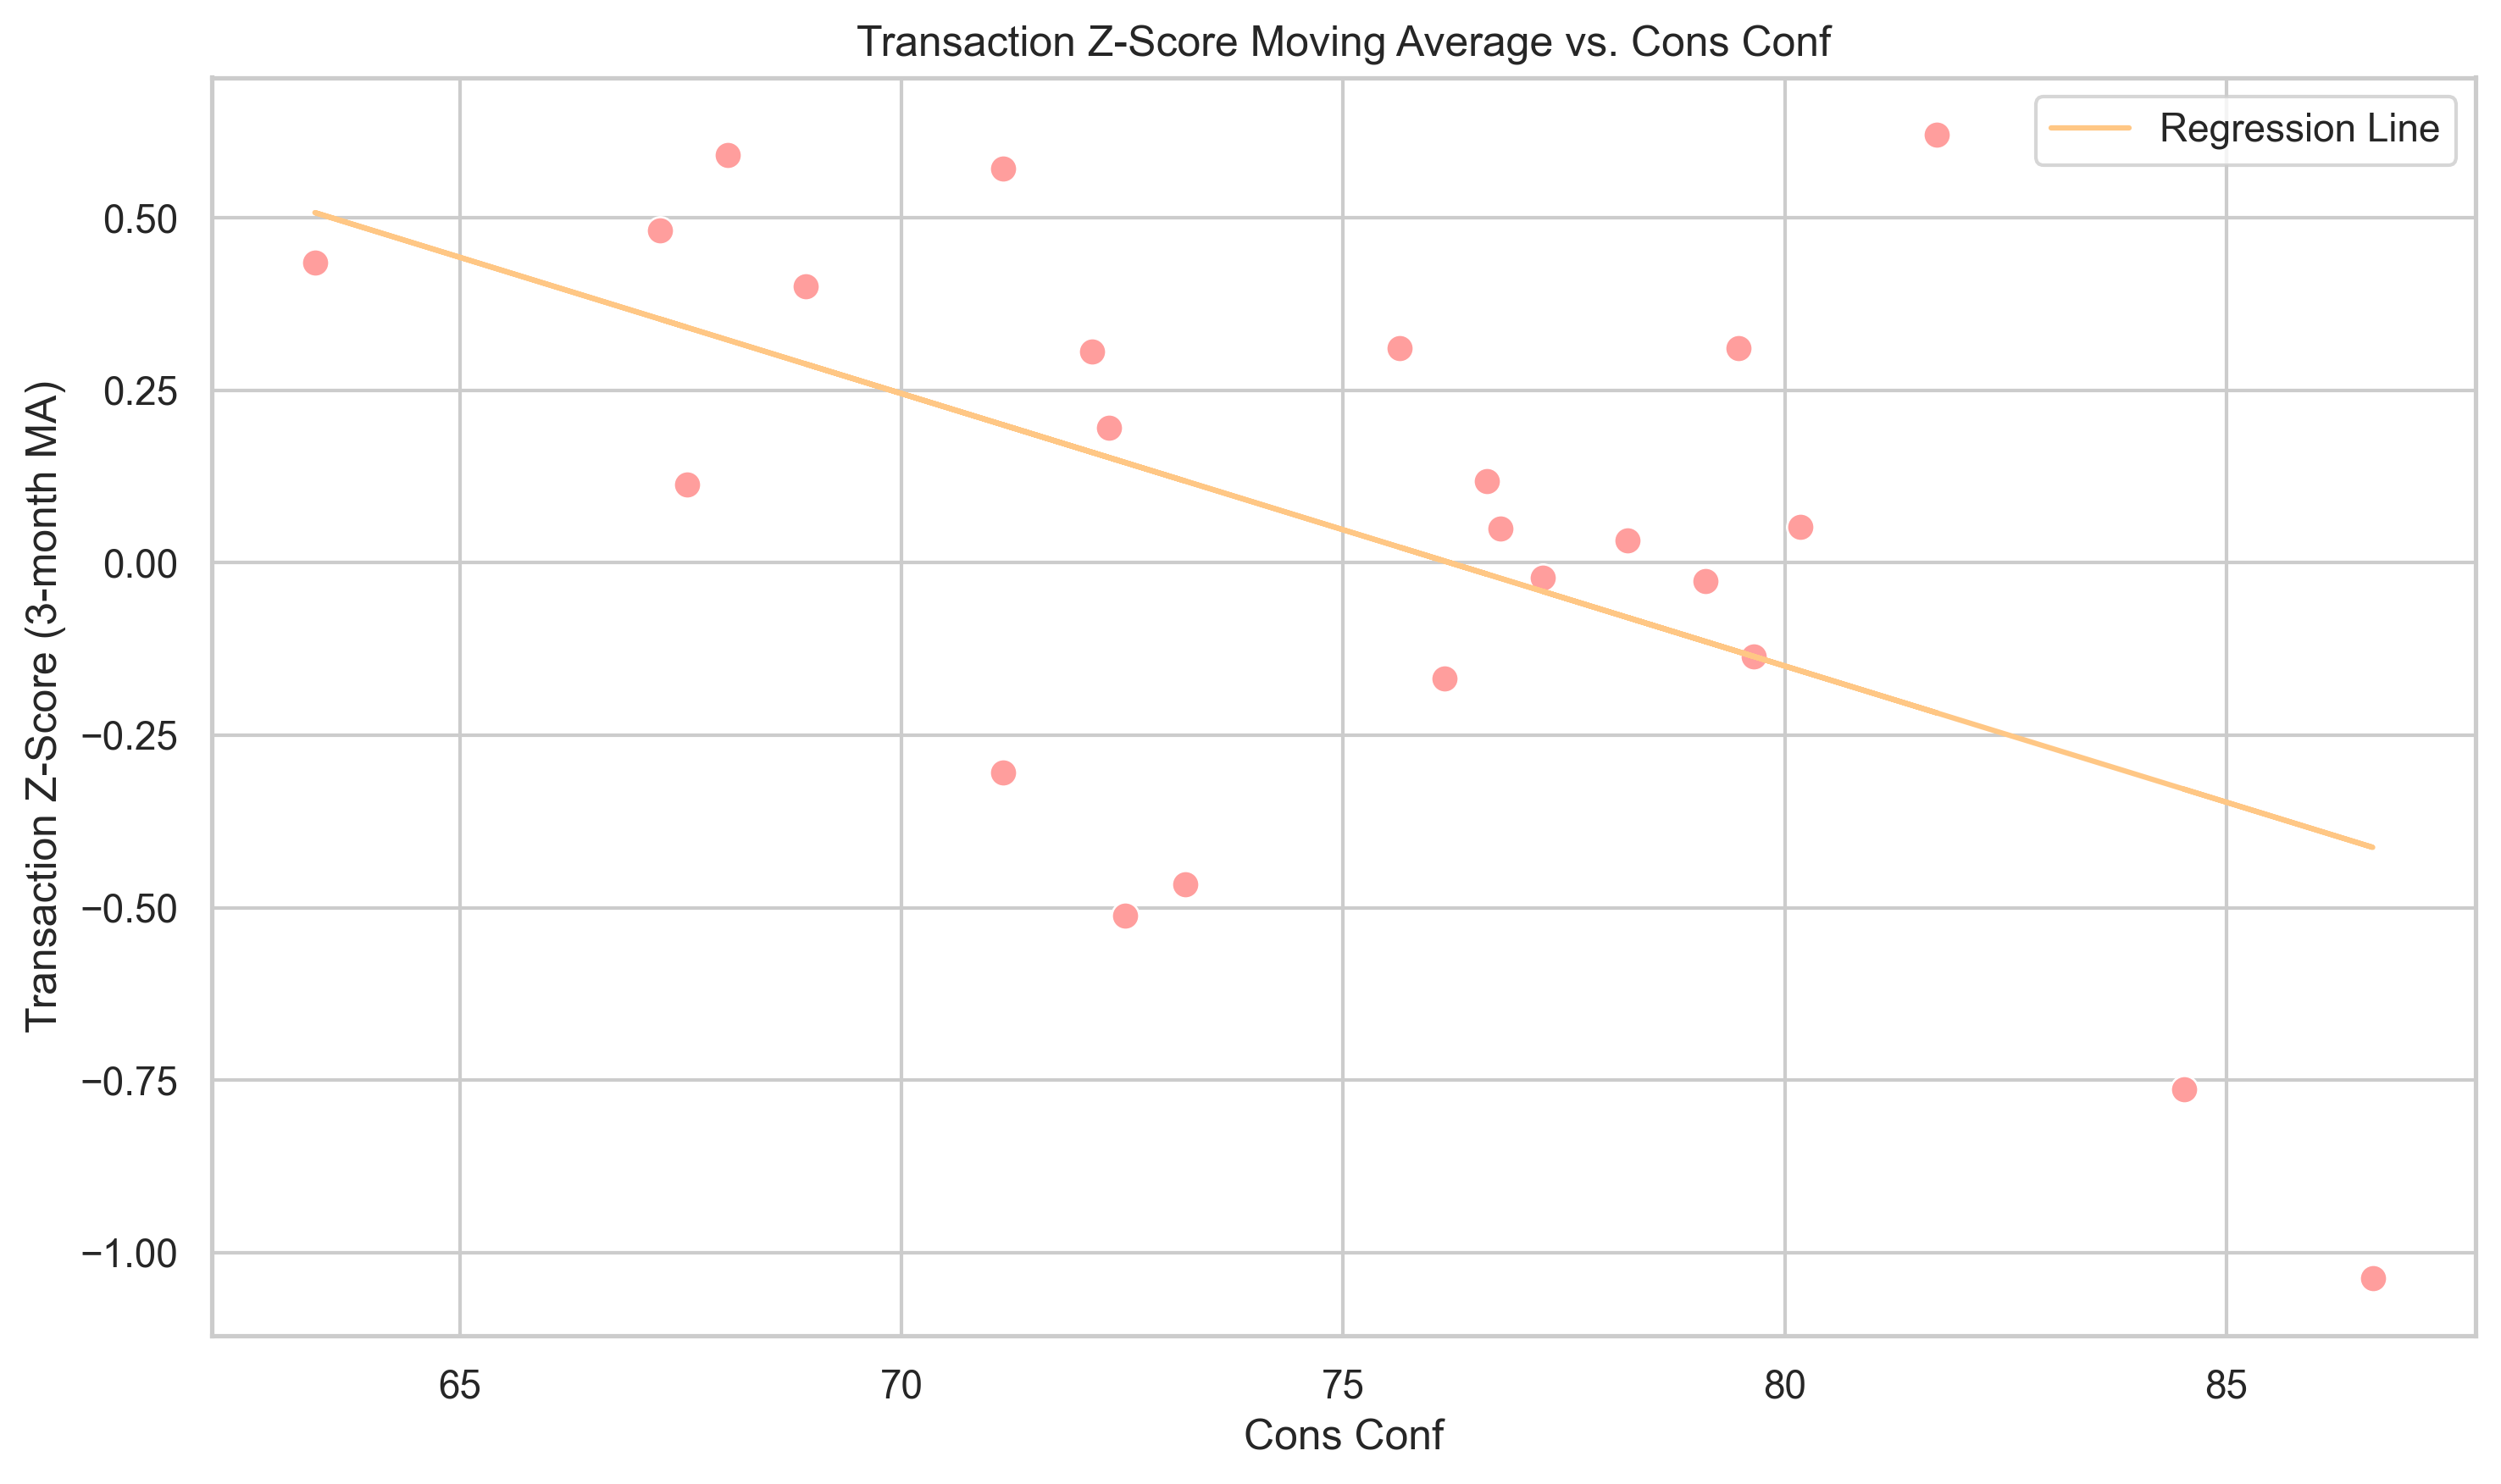


Regression on realsec_conf (Transaction Z-MA):

                            OLS Regression Results                            
Dep. Variable:      transactions_z_ma   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1.276
Date:                Mon, 14 Jul 2025   Prob (F-statistic):              0.271
Time:                        16:23:14   Log-Likelihood:                -12.531
No. Observations:                  24   AIC:                             29.06
Df Residuals:                      22   BIC:                             31.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

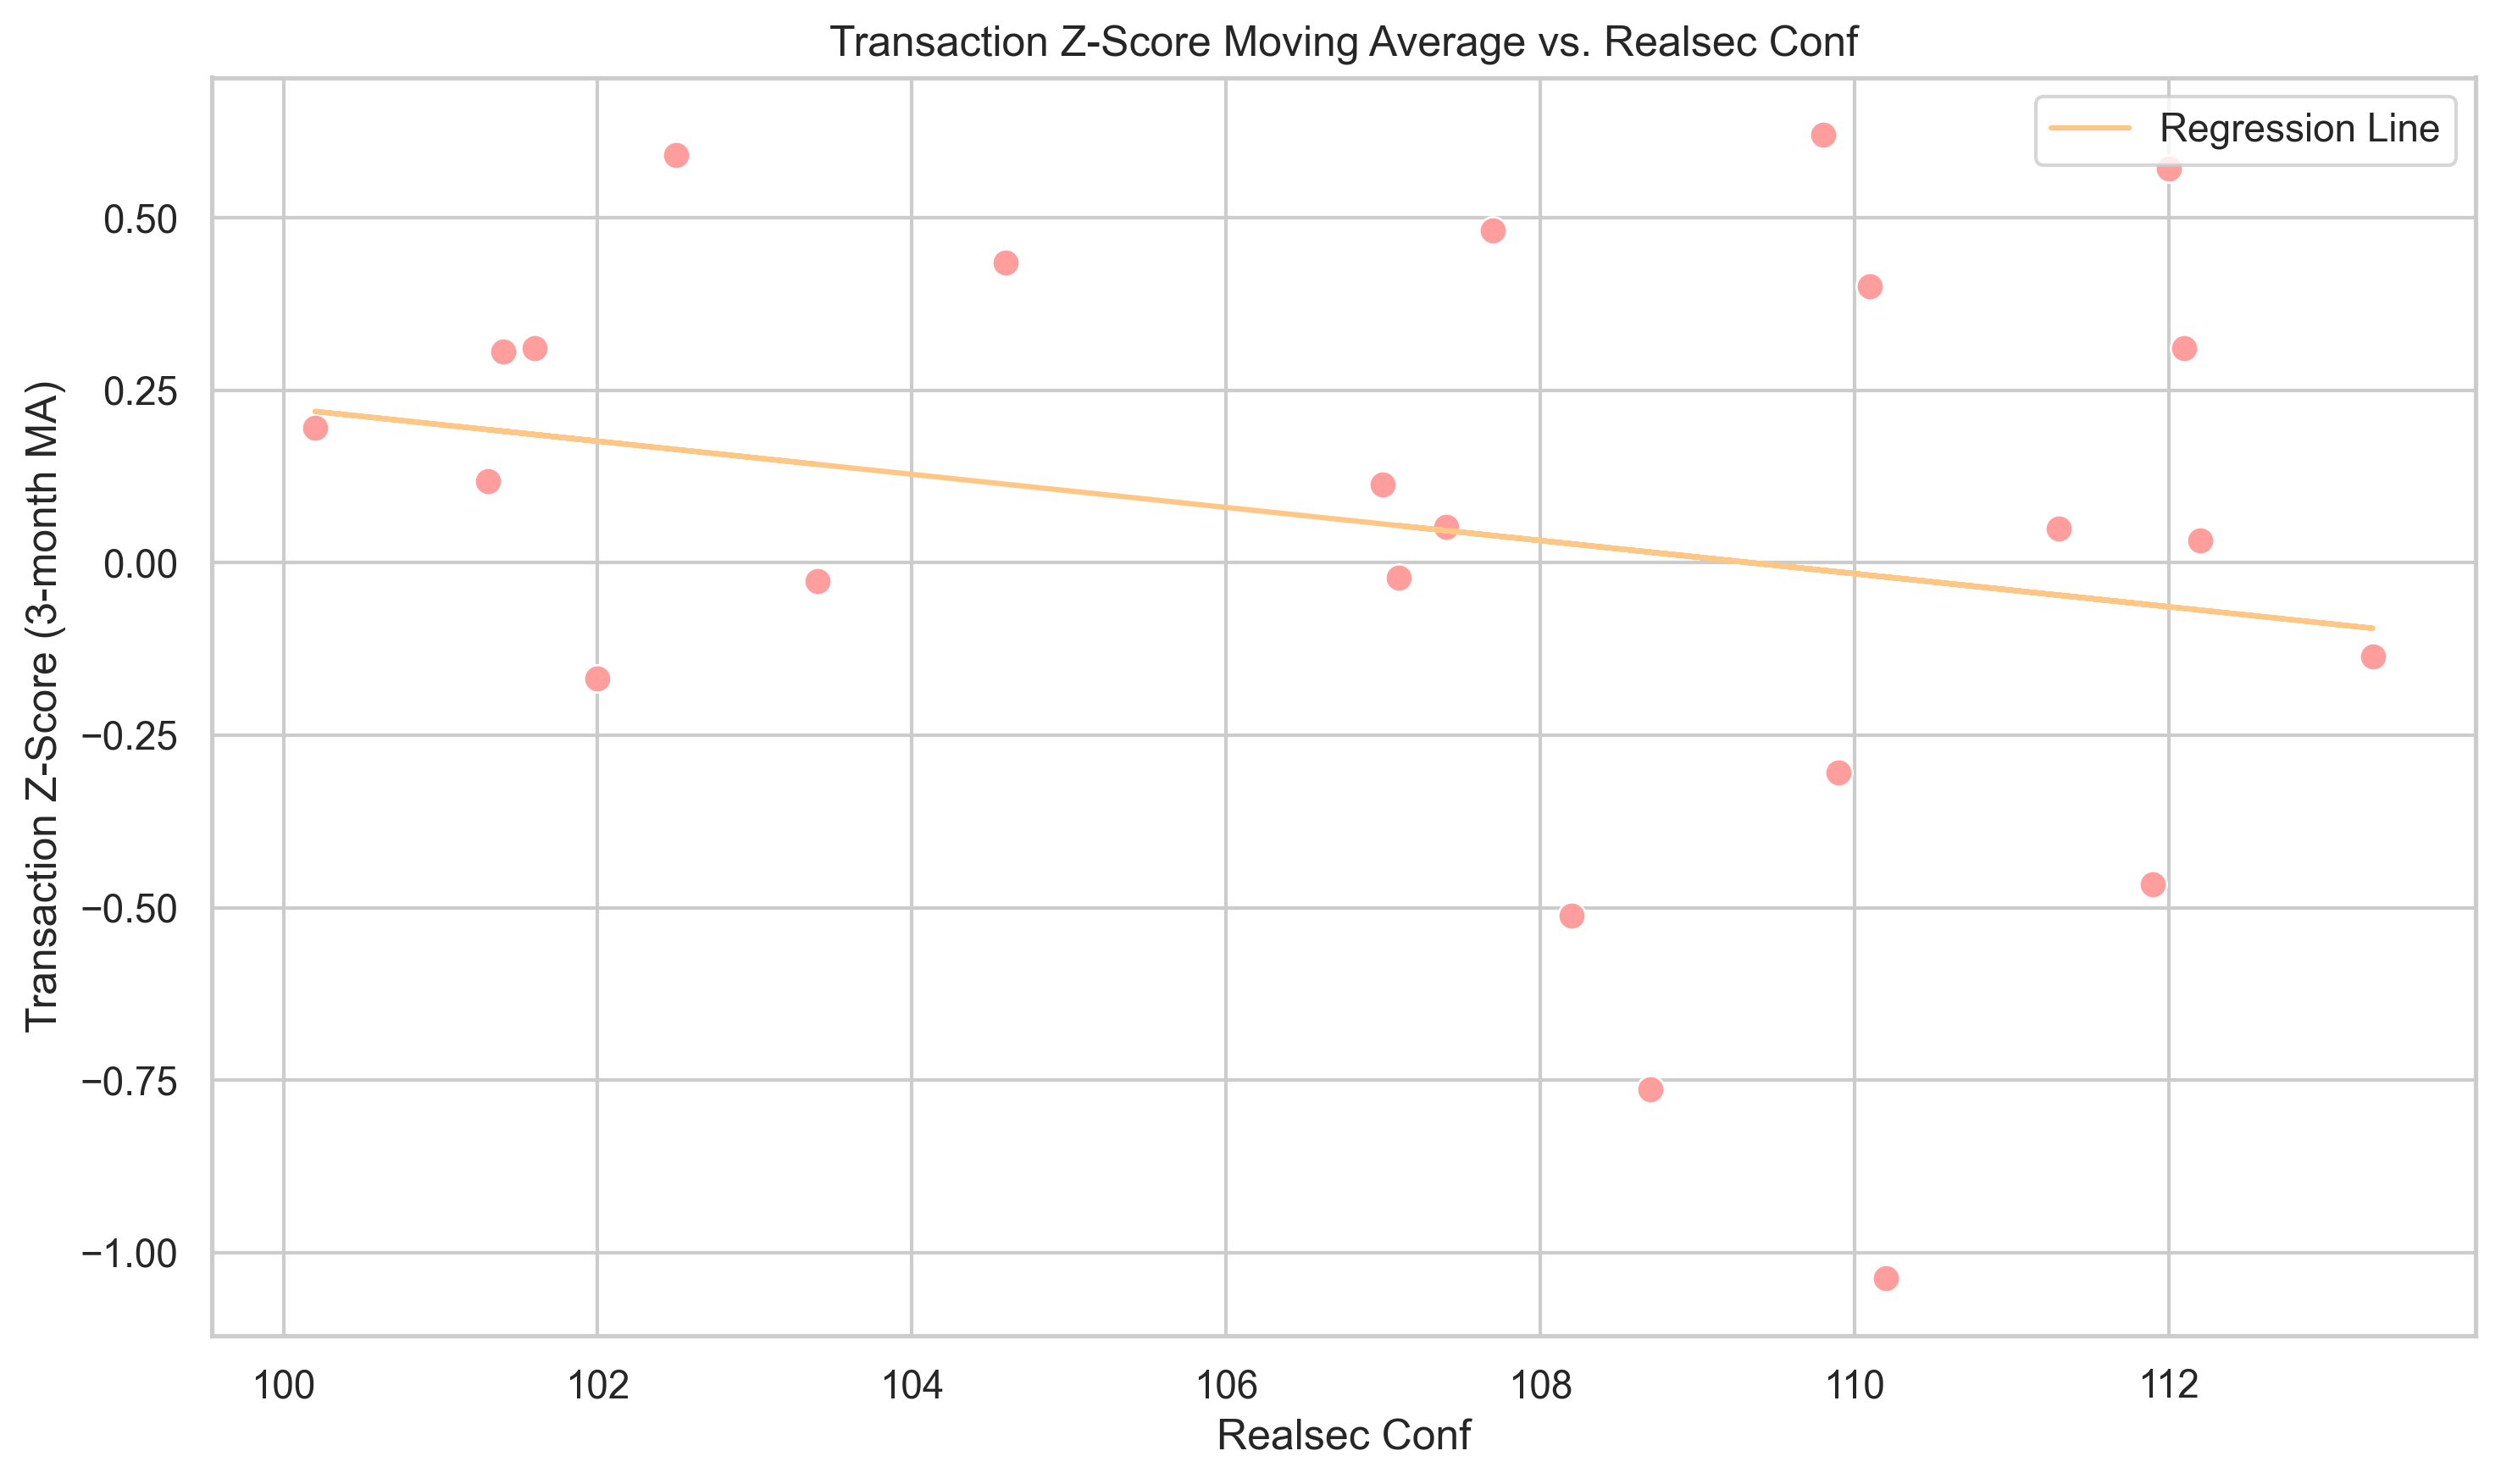

In [13]:

df["invoice_date"] = pd.to_datetime(df["invoice_date"])
df["month"] = df["invoice_date"].dt.to_period("M")

# Monthly aggregation
monthly_summary = (
    df.groupby("month")
      .agg(
          total_transactions=("invoice_no", "count"),
          total_spend=("total_price", "sum"),
          bloomberg_confidence=("bloomberg_confidence", "mean"),
          ipsos_confidence=("ipsos_confidence", "mean"),
          econ_conf=("Econ_Conf", "mean"),
          cons_conf=("Cons_Conf", "mean"),
          realsec_conf=("RealSec_Conf", "mean")
      )
      .reset_index()
)

# Remove low-count months (if needed)
monthly_summary_clean = monthly_summary[monthly_summary["total_transactions"] > 2000].copy()

# Z-score normalization
monthly_summary_clean["transactions_z"] = zscore(monthly_summary_clean["total_transactions"])
monthly_summary_clean["spend_z"] = zscore(monthly_summary_clean["total_spend"])

# Moving average (3-month window, center aligned)
monthly_summary_clean["transactions_z_ma"] = monthly_summary_clean["transactions_z"].rolling(window=3, center=True).mean()
monthly_summary_clean["spend_z_ma"] = monthly_summary_clean["spend_z"].rolling(window=3, center=True).mean()

print("\nNormalized and smoothed data preview:\n")
print(monthly_summary_clean[[
    "month",
    "transactions_z",
    "transactions_z_ma",
    "spend_z",
    "spend_z_ma"
]])

# List of indices to test
indices = [
    "bloomberg_confidence",
    "ipsos_confidence",
    "econ_conf",
    "cons_conf",
    "realsec_conf"
]

# Loop over indices and regress (Transaction Z-MA)
for idx in indices:
    print(f"\n==============================")
    print(f"Regression on {idx} (Transaction Z-MA):")
    print("==============================\n")

    # Drop rows with NaN due to moving average
    reg_df = monthly_summary_clean.dropna(subset=["transactions_z_ma", idx])

    X = sm.add_constant(reg_df[idx])
    y = reg_df["transactions_z_ma"]

    model = sm.OLS(y, X).fit()
    print(model.summary())

    slope = model.params[idx]
    p_value = model.pvalues[idx]
    r_squared = model.rsquared

    if p_value < 0.05:
        print(f"\n✅ Significant: Slope = {slope:.4f}, p = {p_value:.4f}, R² = {r_squared:.3f}")
    else:
        print(f"\n❌ Not significant: Slope = {slope:.4f}, p = {p_value:.4f}, R² = {r_squared:.3f}")

    # Scatter plot
    plt.figure(figsize=(10,6), dpi=300)
    sns.scatterplot(
        data=reg_df,
        x=idx,
        y="transactions_z_ma",
        s=60,
        color=color1
    )

    y_pred = model.predict(X)

    plt.plot(
        reg_df[idx],
        y_pred,
        color=color2,
        label="Regression Line"
    )

    plt.title(f"Transaction Z-Score Moving Average vs. {idx.replace('_',' ').title()}")
    plt.xlabel(f"{idx.replace('_',' ').title()}")
    plt.ylabel("Transaction Z-Score (3-month MA)")
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"dataset_new_indexes_economic_impact_figures/composite_index_transition_z_score_moving_averages{idx}.png")
    plt.show()


z score moving average ols regression - total spend


Normalized and smoothed data preview:

      month  transactions_z  transactions_z_ma   spend_z  spend_z_ma
0   2021-01        0.348664                NaN  0.144544         NaN
1   2021-02       -2.823806          -0.763183 -1.788182   -0.637733
2   2021-03        0.185593          -1.037439 -0.269560   -0.824545
3   2021-04       -0.474103           0.052171 -0.415894   -0.083854
4   2021-05        0.445024          -0.021952  0.433891   -0.209166
5   2021-06       -0.036776           0.620449 -0.645496    0.473820
6   2021-07        1.453099           0.311602  1.633064    0.369249
7   2021-08       -0.481515           0.032405  0.120179    0.296542
8   2021-09       -0.874368          -0.135607 -0.863616    0.260892
9   2021-10        0.949061           0.049701  1.526112   -0.009686
10  2021-11        0.074408           0.571033 -0.691554    0.284558
11  2021-12        0.689630           0.400550  0.019117   -0.085034
12  2022-01        0.437612          -0.466691  0.417337   -0.7

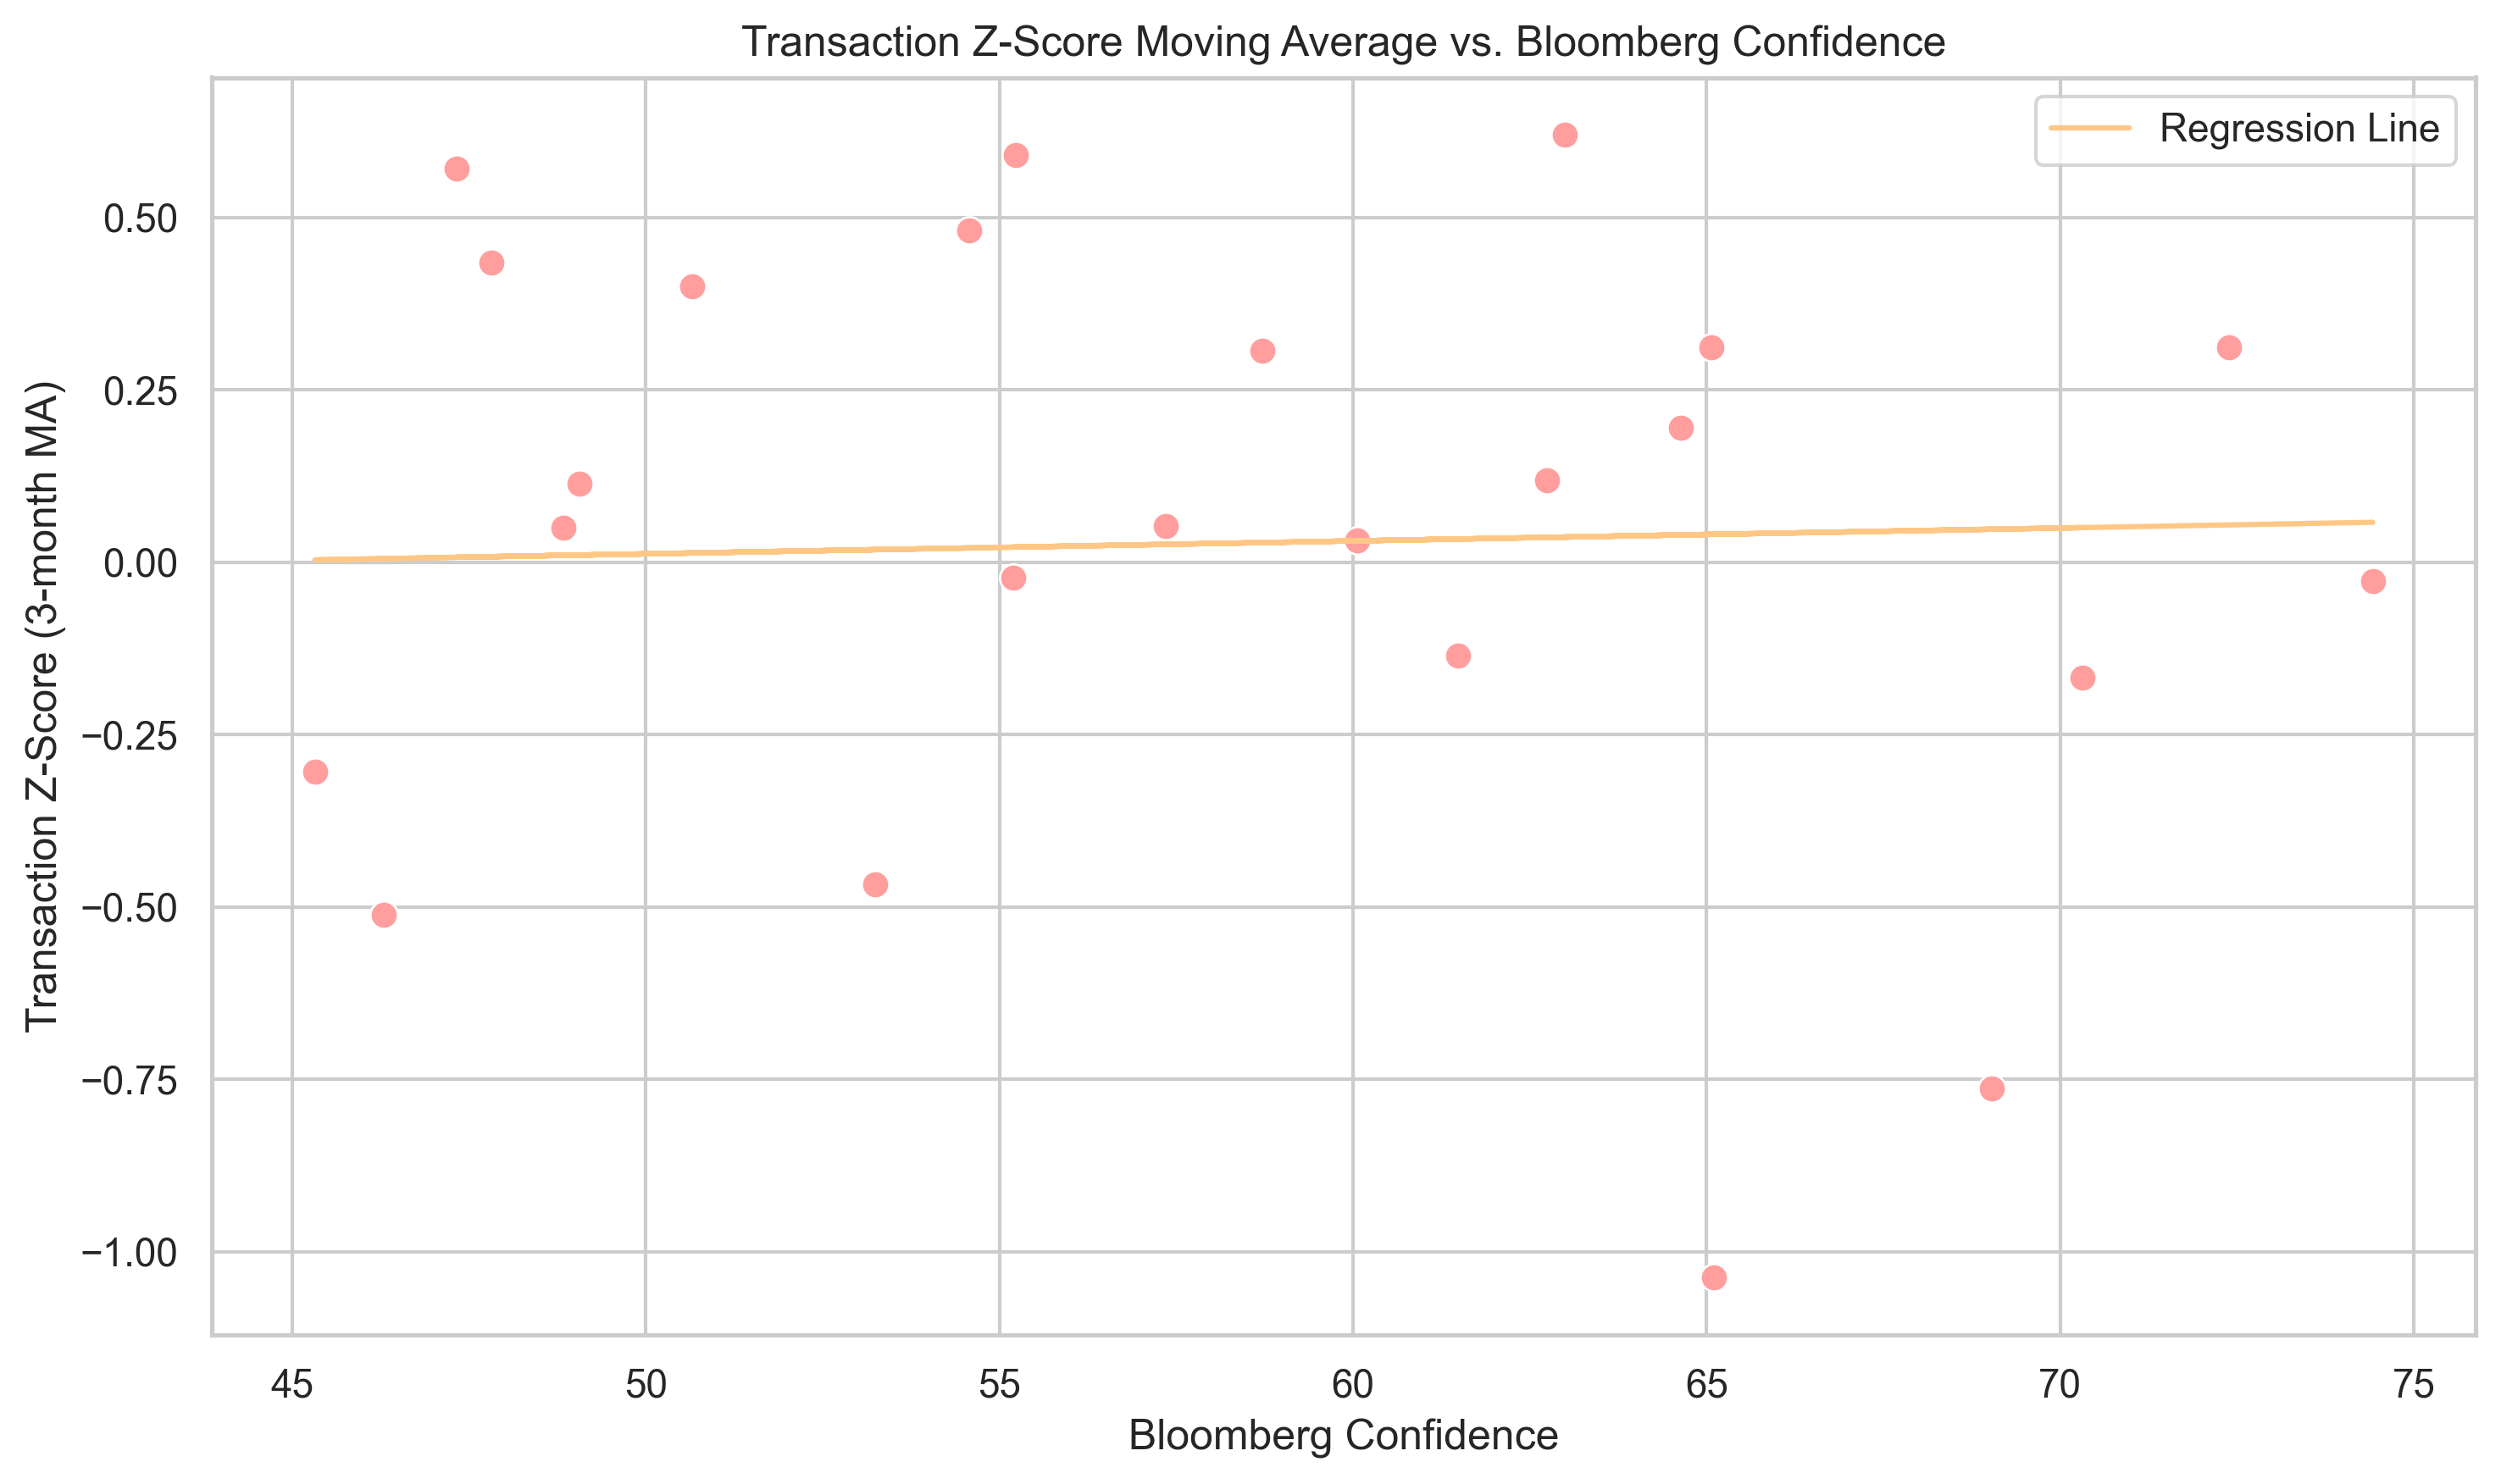


Regression on ipsos_confidence (Transaction Z-MA):

                            OLS Regression Results                            
Dep. Variable:             spend_z_ma   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     3.610
Date:                Mon, 14 Jul 2025   Prob (F-statistic):             0.0706
Time:                        16:23:15   Log-Likelihood:                -12.896
No. Observations:                  24   AIC:                             29.79
Df Residuals:                      22   BIC:                             32.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

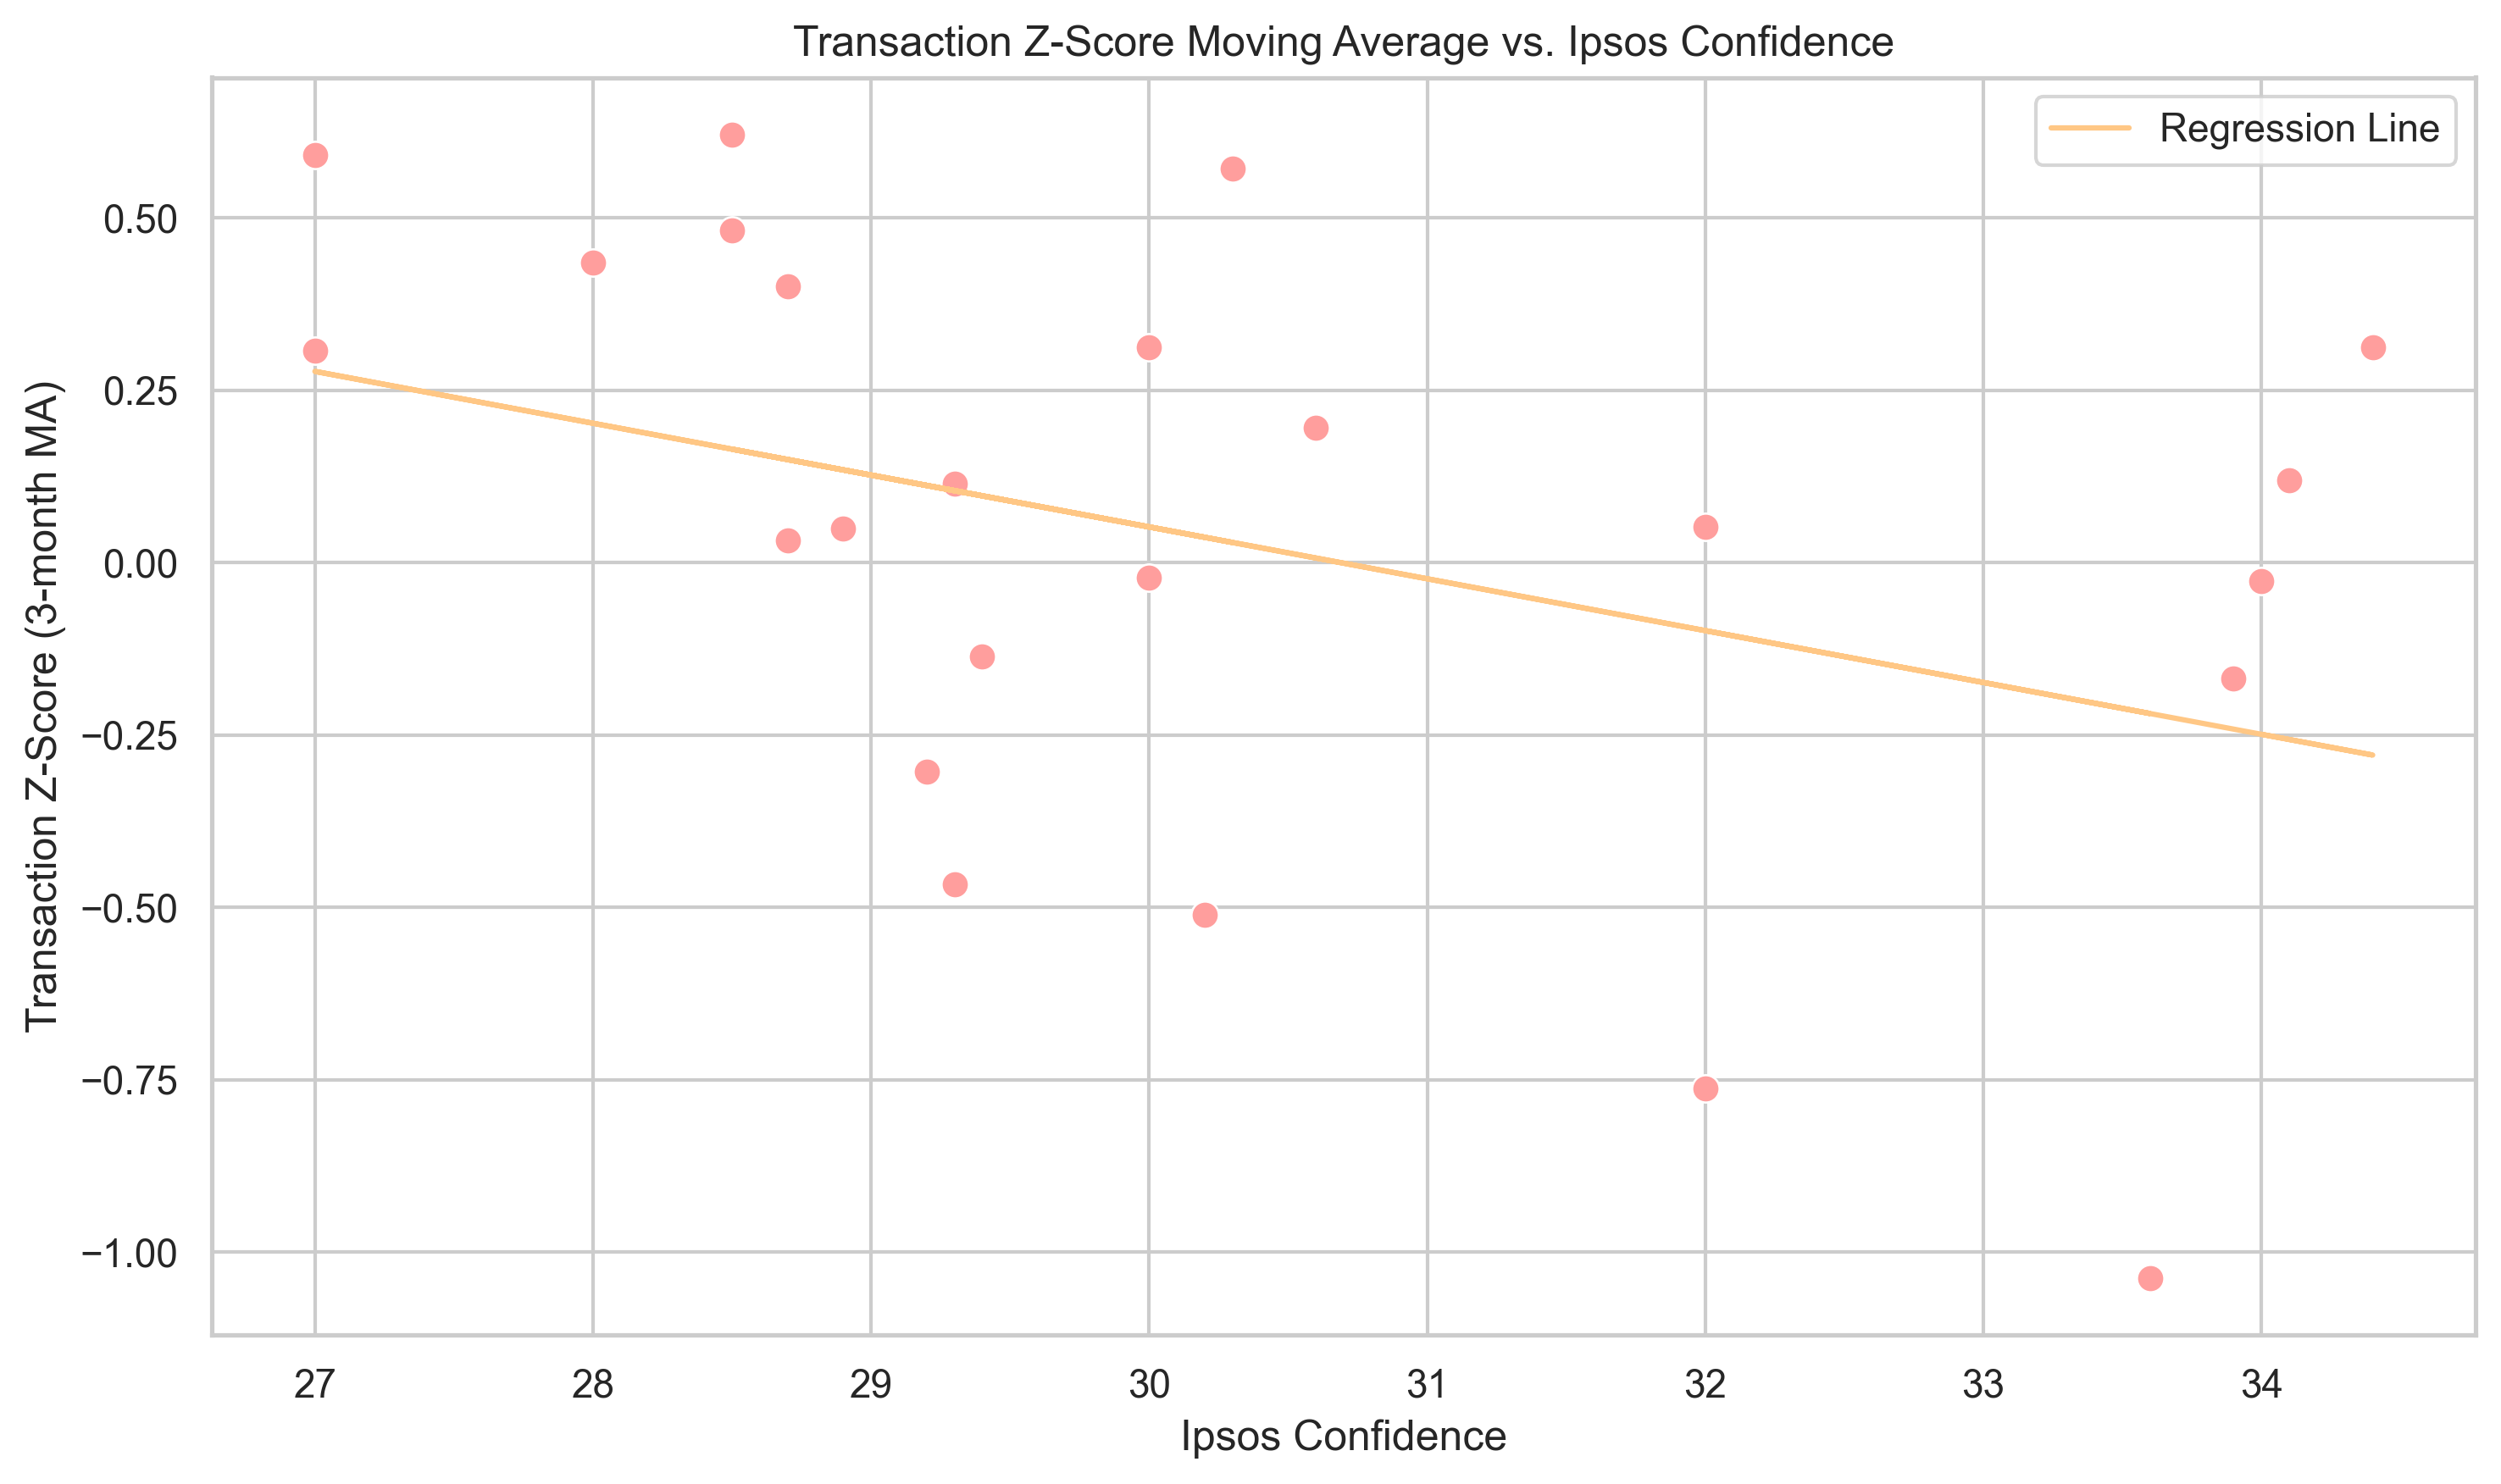


Regression on econ_conf (Transaction Z-MA):

                            OLS Regression Results                            
Dep. Variable:             spend_z_ma   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.029
Method:                 Least Squares   F-statistic:                    0.3429
Date:                Mon, 14 Jul 2025   Prob (F-statistic):              0.564
Time:                        16:23:15   Log-Likelihood:                -14.534
No. Observations:                  24   AIC:                             33.07
Df Residuals:                      22   BIC:                             35.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const 

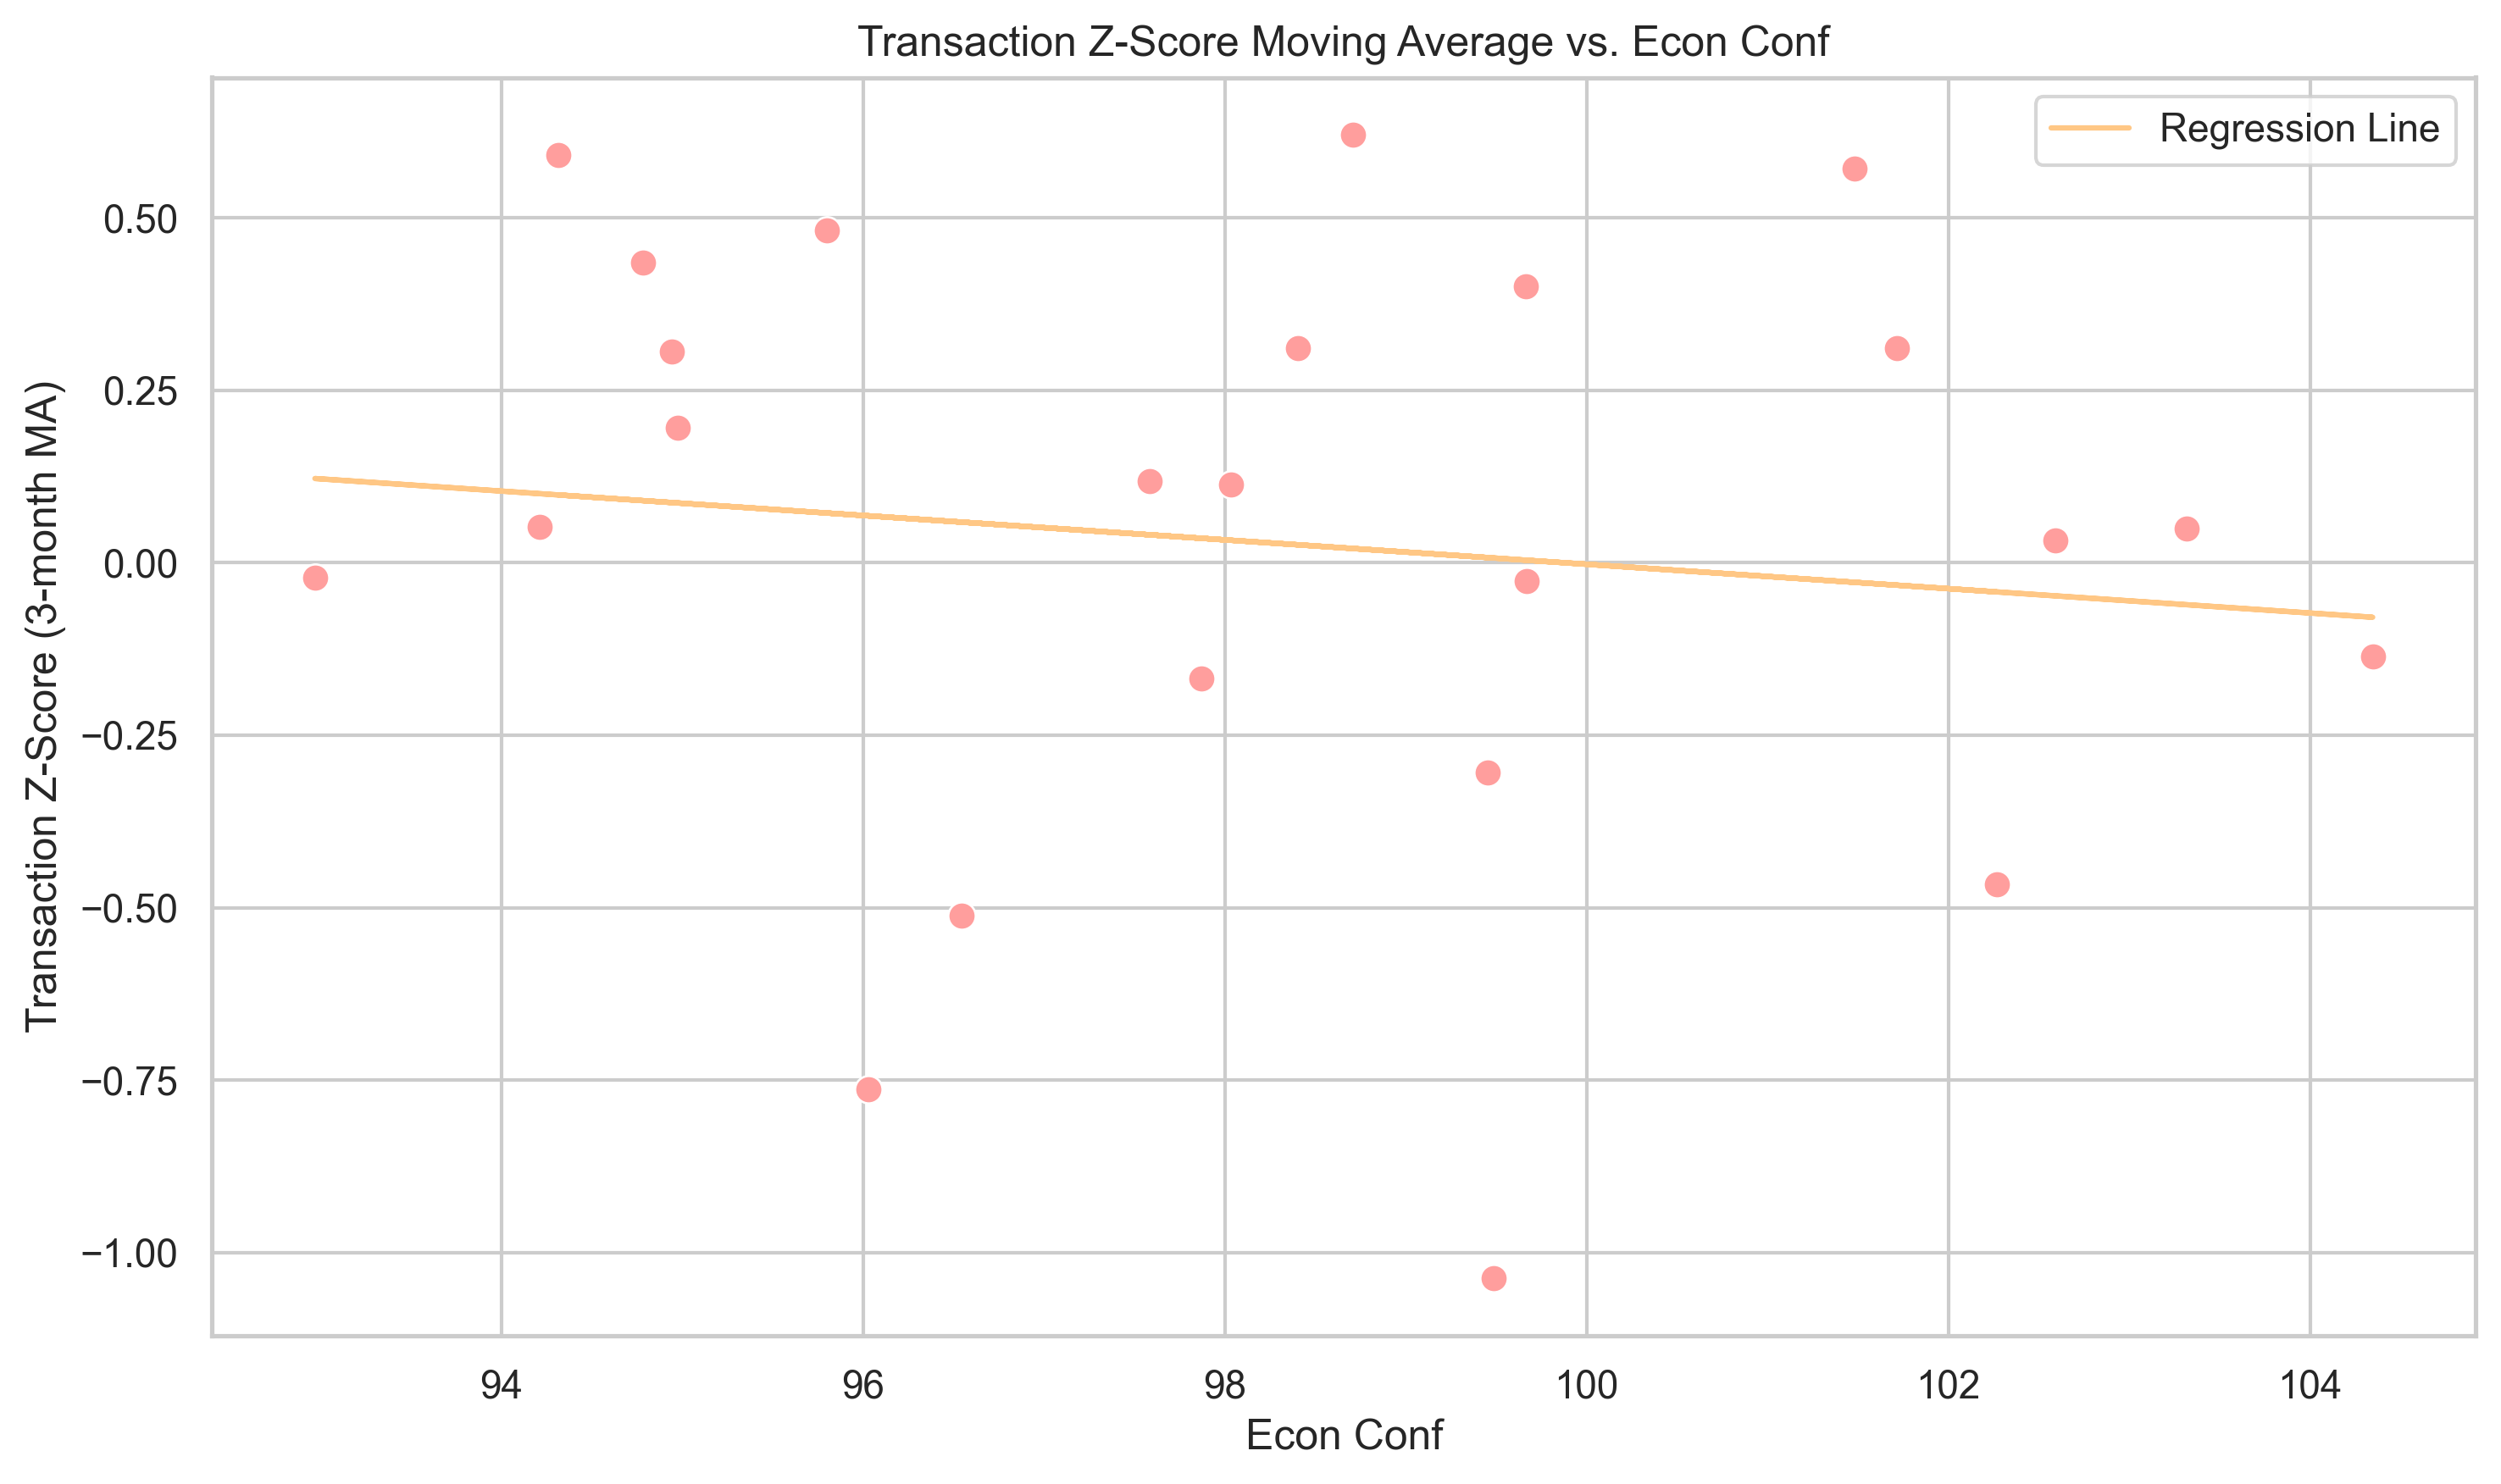


Regression on cons_conf (Transaction Z-MA):

                            OLS Regression Results                            
Dep. Variable:             spend_z_ma   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     3.524
Date:                Mon, 14 Jul 2025   Prob (F-statistic):             0.0738
Time:                        16:23:16   Log-Likelihood:                -12.937
No. Observations:                  24   AIC:                             29.87
Df Residuals:                      22   BIC:                             32.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const 

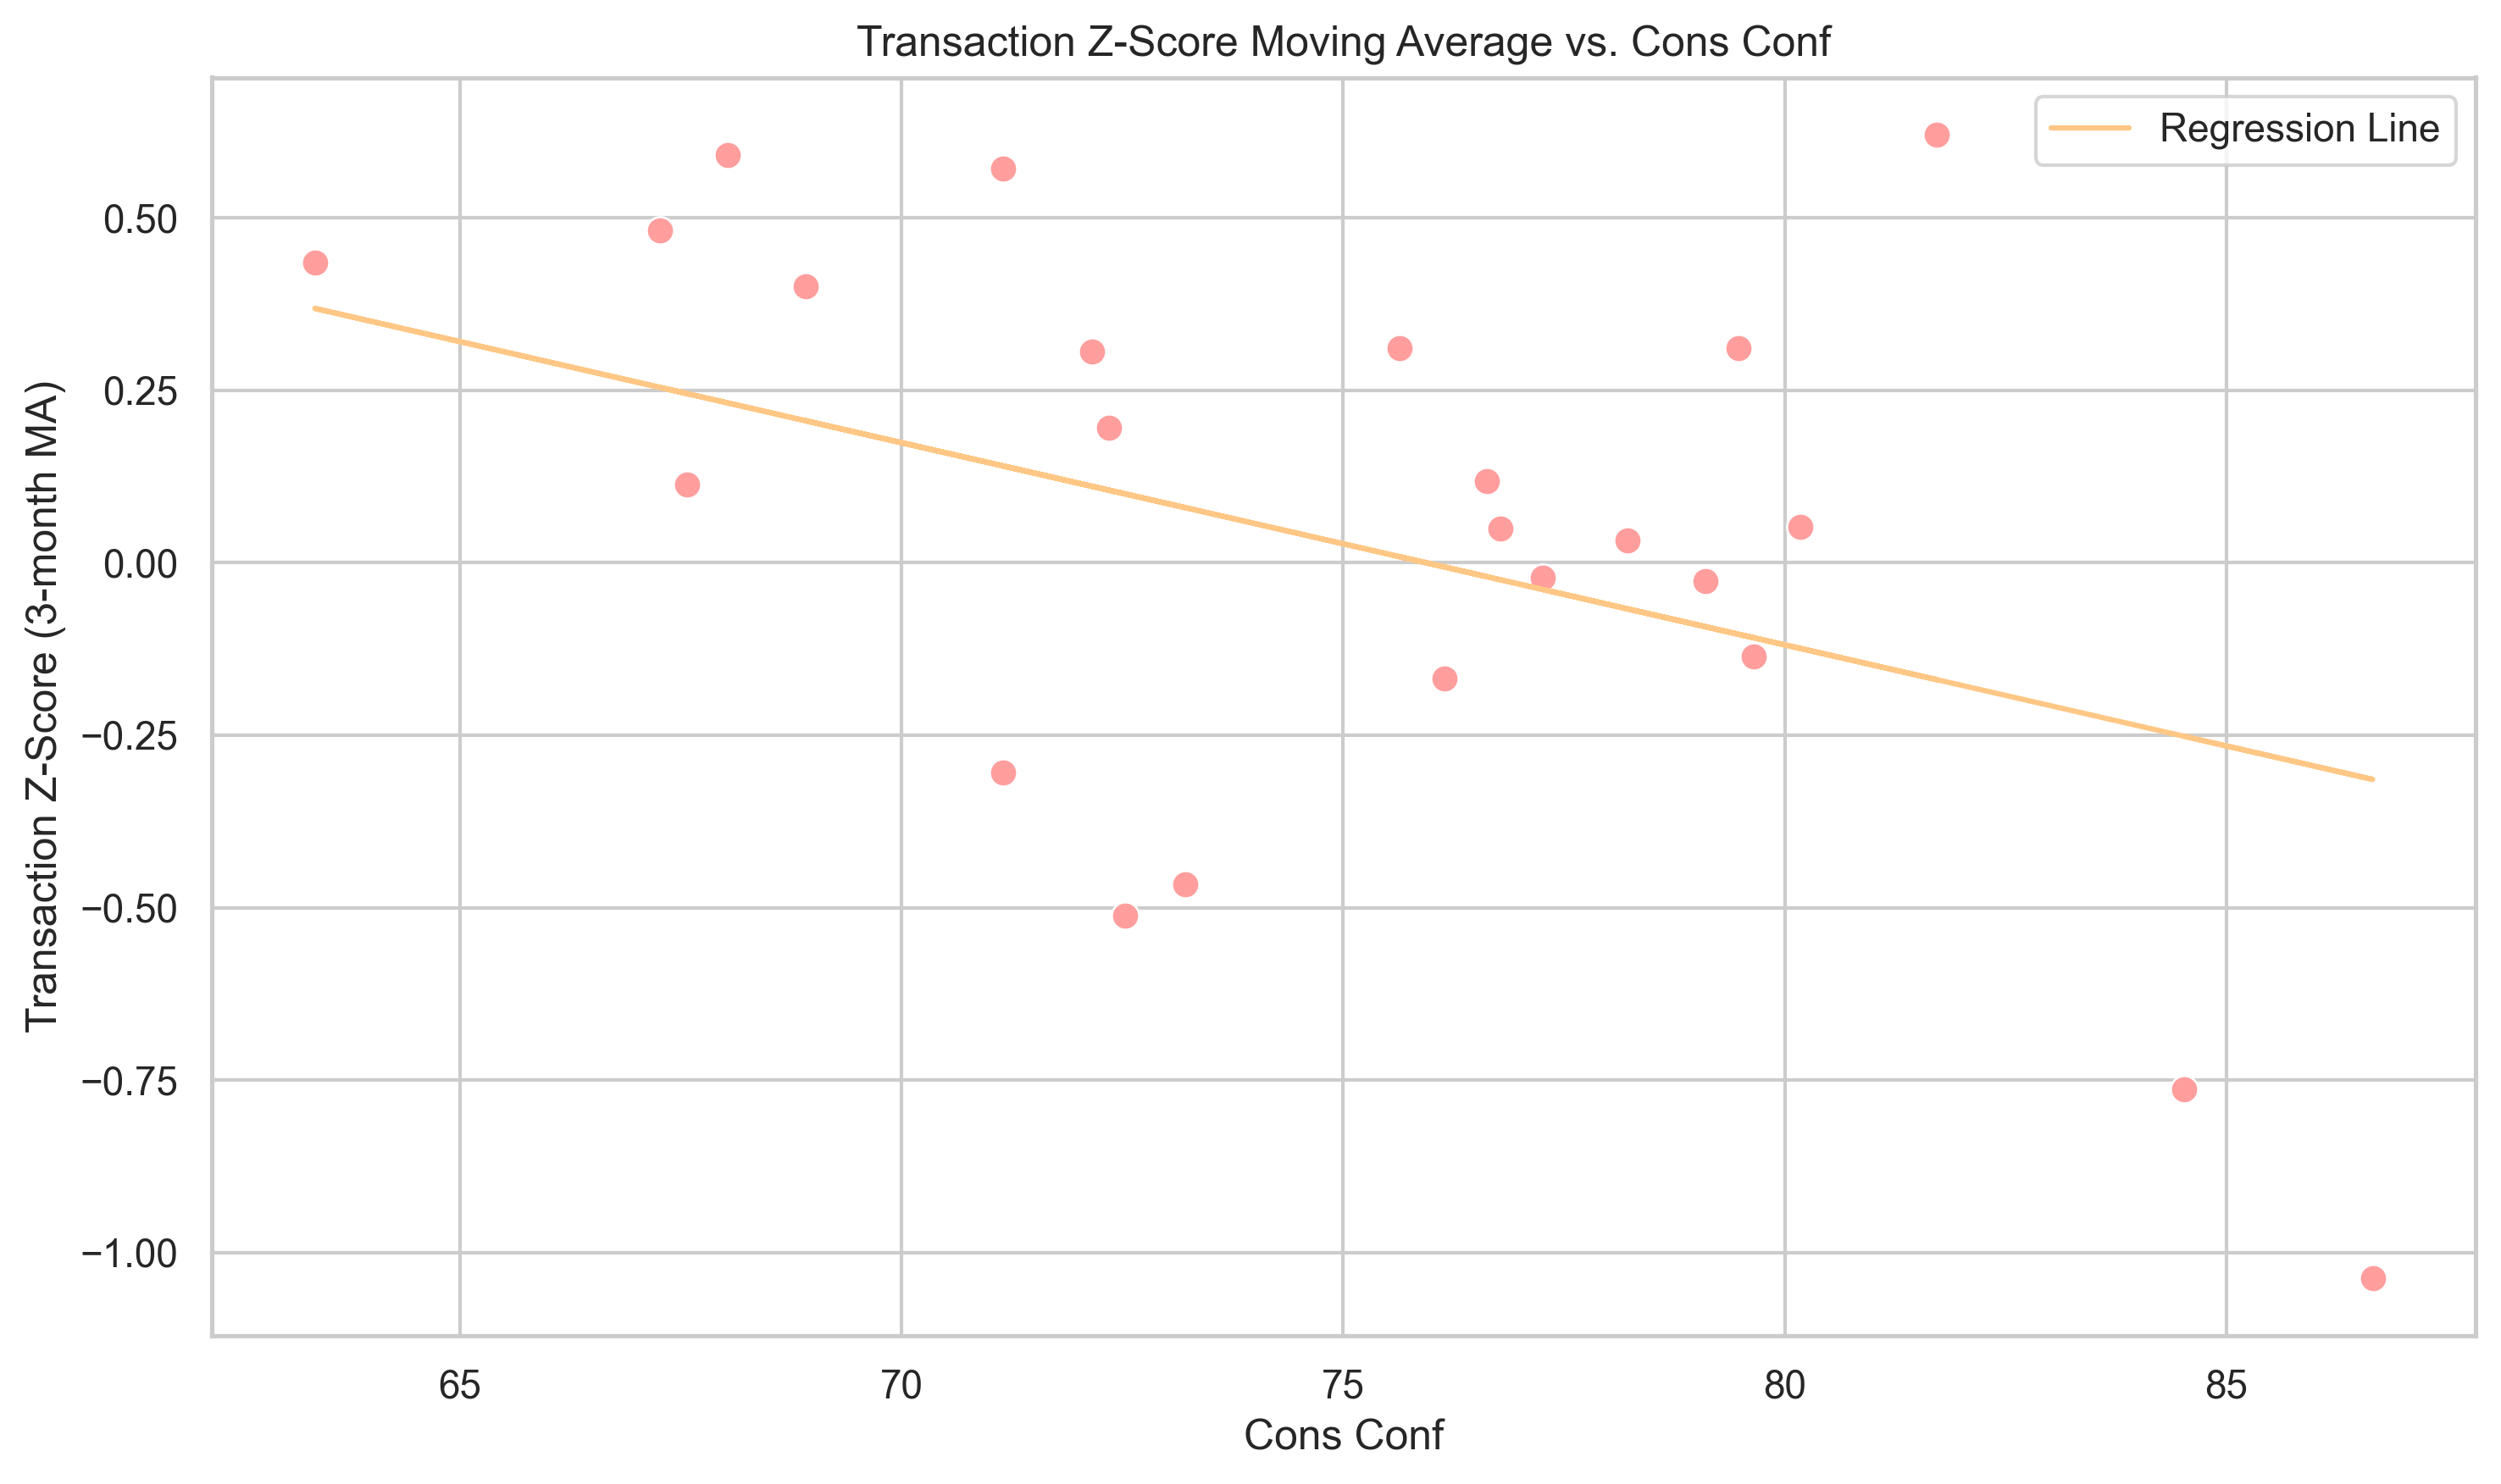


Regression on realsec_conf (Transaction Z-MA):

                            OLS Regression Results                            
Dep. Variable:             spend_z_ma   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     2.181
Date:                Mon, 14 Jul 2025   Prob (F-statistic):              0.154
Time:                        16:23:16   Log-Likelihood:                -13.585
No. Observations:                  24   AIC:                             31.17
Df Residuals:                      22   BIC:                             33.53
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

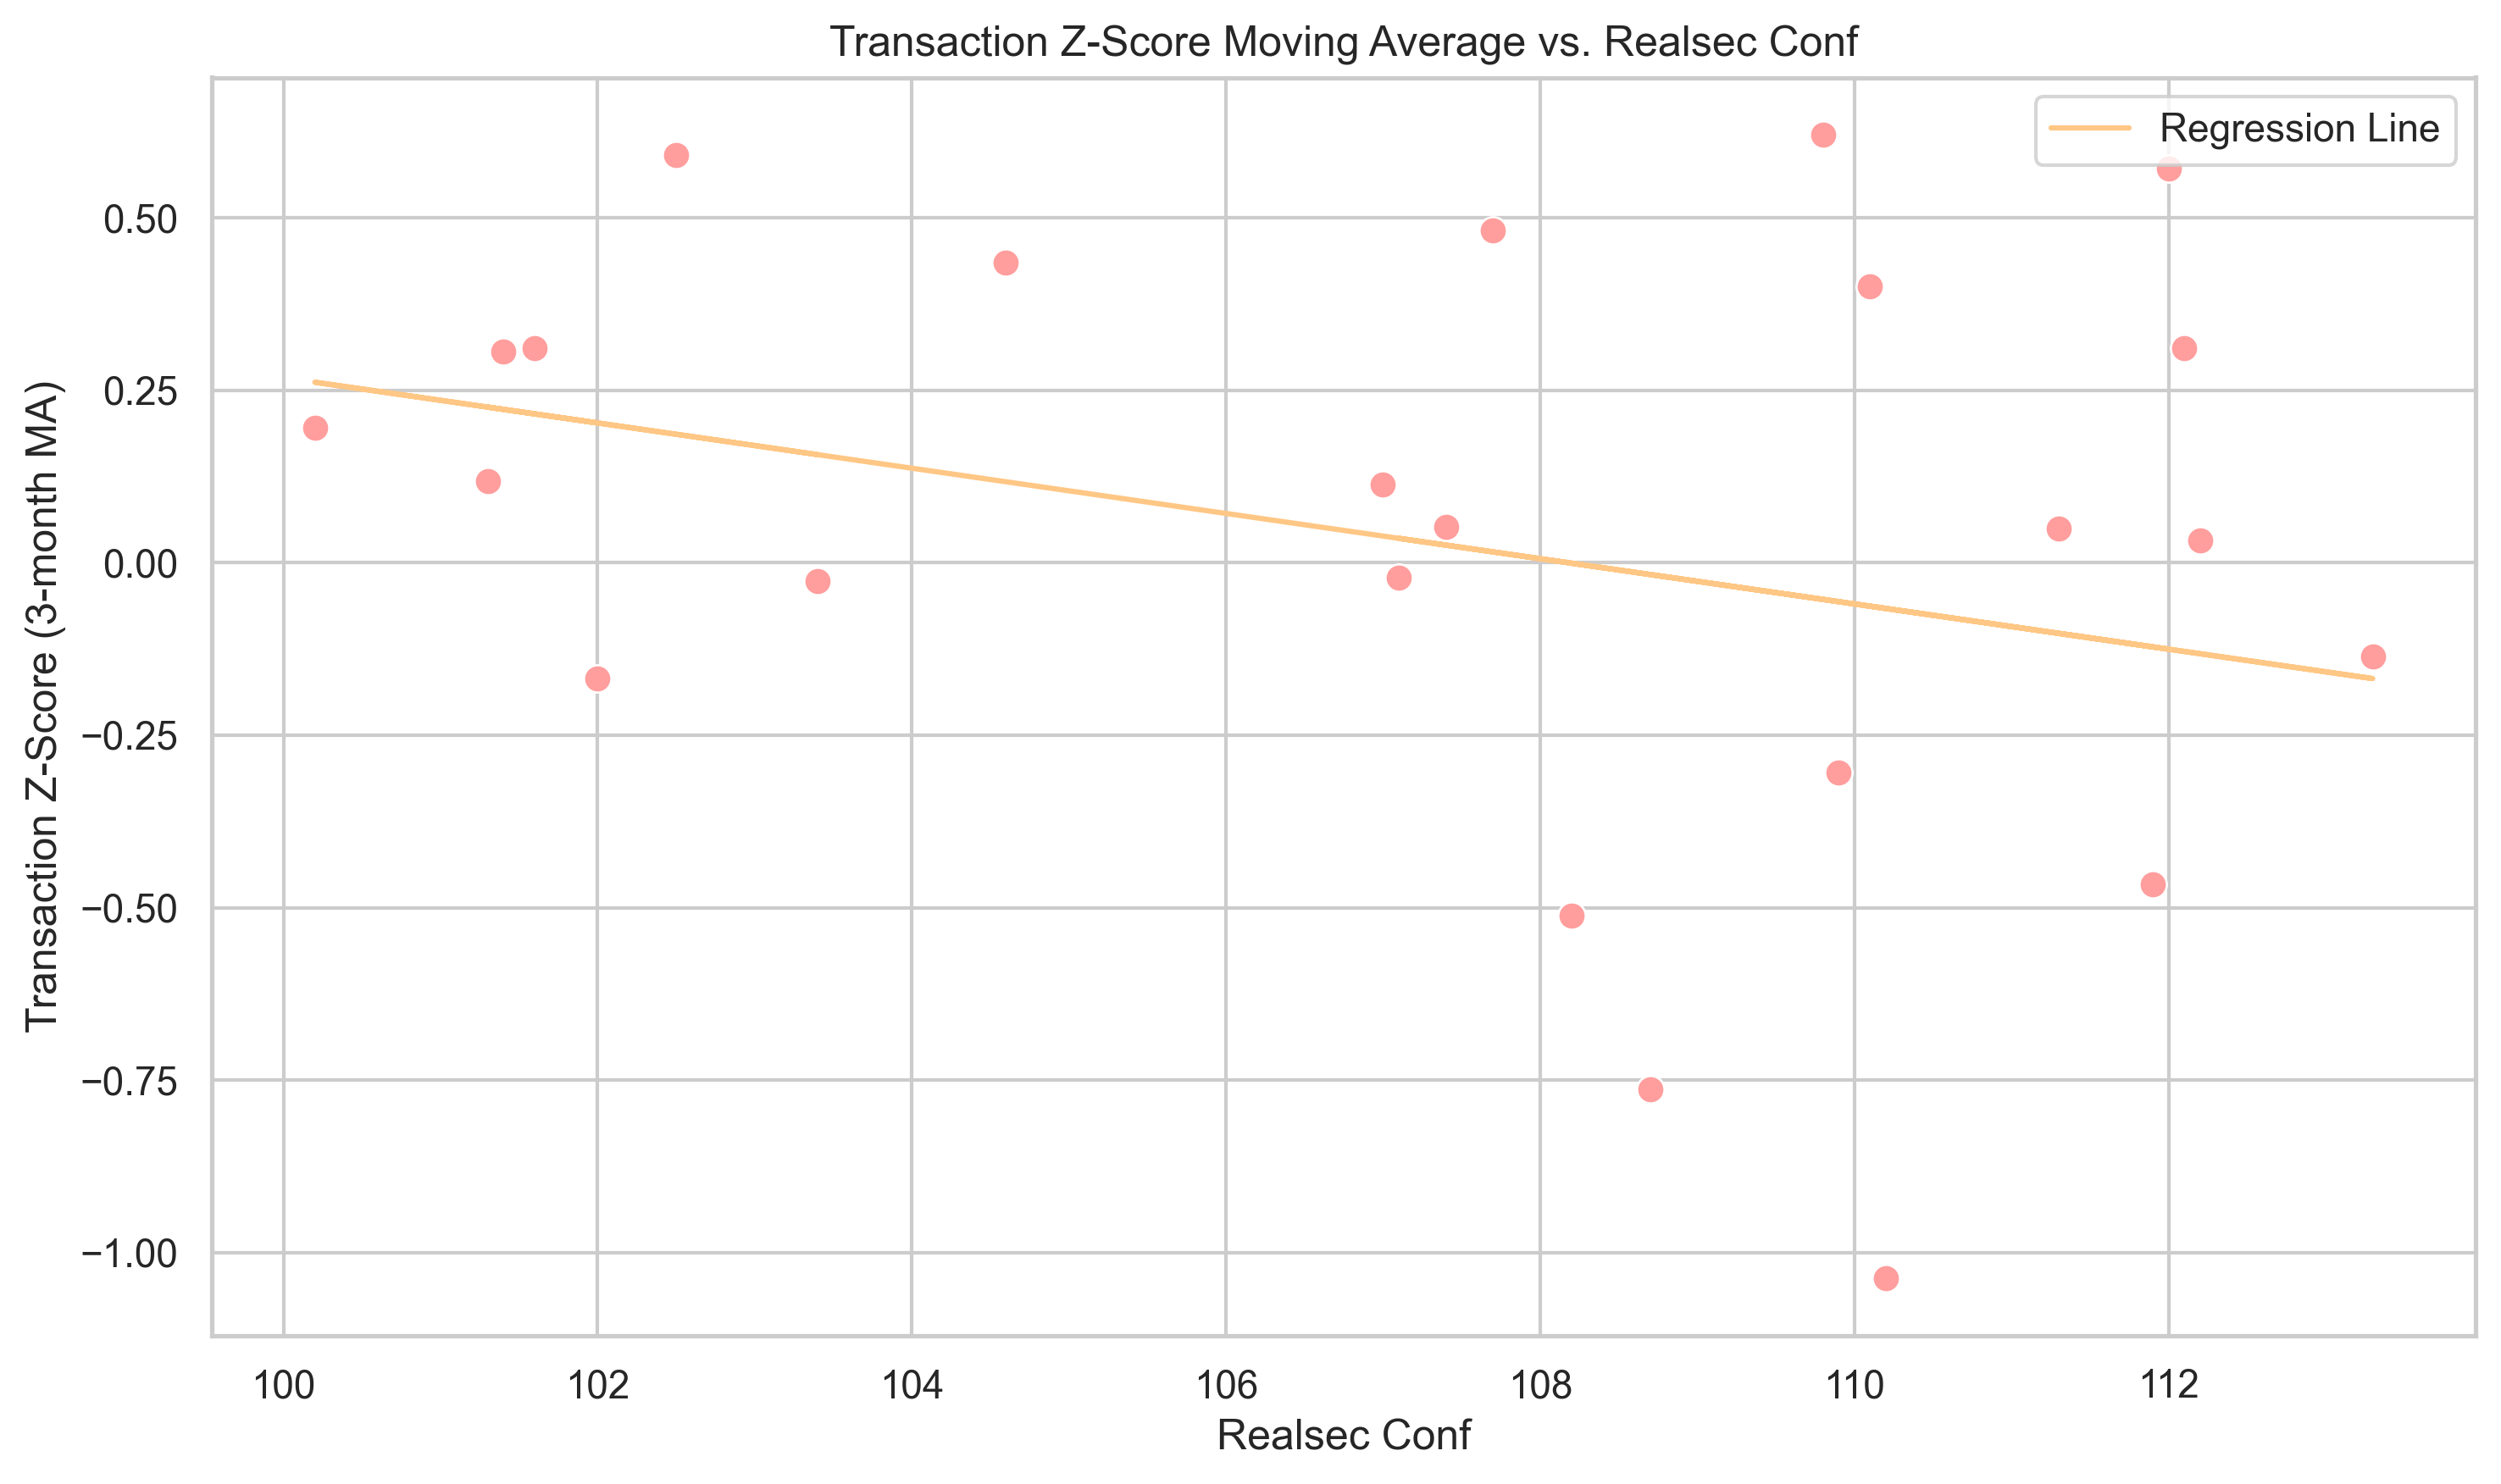

In [14]:

df["invoice_date"] = pd.to_datetime(df["invoice_date"])
df["month"] = df["invoice_date"].dt.to_period("M")

# Monthly aggregation
monthly_summary = (
    df.groupby("month")
      .agg(
          total_transactions=("invoice_no", "count"),
          total_spend=("total_price", "sum"),
          bloomberg_confidence=("bloomberg_confidence", "mean"),
          ipsos_confidence=("ipsos_confidence", "mean"),
          econ_conf=("Econ_Conf", "mean"),
          cons_conf=("Cons_Conf", "mean"),
          realsec_conf=("RealSec_Conf", "mean")
      )
      .reset_index()
)

# Remove low-count months (if needed)
monthly_summary_clean = monthly_summary[monthly_summary["total_transactions"] > 2000].copy()

# Z-score normalization
monthly_summary_clean["transactions_z"] = zscore(monthly_summary_clean["total_transactions"])
monthly_summary_clean["spend_z"] = zscore(monthly_summary_clean["total_spend"])

# Moving average (3-month window, center aligned)
monthly_summary_clean["transactions_z_ma"] = monthly_summary_clean["transactions_z"].rolling(window=3, center=True).mean()
monthly_summary_clean["spend_z_ma"] = monthly_summary_clean["spend_z"].rolling(window=3, center=True).mean()

print("\nNormalized and smoothed data preview:\n")
print(monthly_summary_clean[[
    "month",
    "transactions_z",
    "transactions_z_ma",
    "spend_z",
    "spend_z_ma"
]])

# List of indices to test
indices = [
    "bloomberg_confidence",
    "ipsos_confidence",
    "econ_conf",
    "cons_conf",
    "realsec_conf"
]

# Loop over indices and regress (Transaction Z-MA)
for idx in indices:
    print(f"\n==============================")
    print(f"Regression on {idx} (Transaction Z-MA):")
    print("==============================\n")

    # Drop rows with NaN due to moving average
    reg_df = monthly_summary_clean.dropna(subset=["transactions_z_ma", idx])

    X = sm.add_constant(reg_df[idx])
    y = reg_df["spend_z_ma"]

    model = sm.OLS(y, X).fit()
    print(model.summary())

    slope = model.params[idx]
    p_value = model.pvalues[idx]
    r_squared = model.rsquared

    if p_value < 0.05:
        print(f"\n✅ Significant: Slope = {slope:.4f}, p = {p_value:.4f}, R² = {r_squared:.3f}")
    else:
        print(f"\n❌ Not significant: Slope = {slope:.4f}, p = {p_value:.4f}, R² = {r_squared:.3f}")

    # Scatter plot
    plt.figure(figsize=(10,6), dpi=300)
    sns.scatterplot(
        data=reg_df,
        x=idx,
        y="transactions_z_ma",
        s=60,
        color=color1
    )

    y_pred = model.predict(X)

    plt.plot(
        reg_df[idx],
        y_pred,
        color=color2,
        label="Regression Line"
    )

    plt.title(f"Transaction Z-Score Moving Average vs. {idx.replace('_',' ').title()}")
    plt.xlabel(f"{idx.replace('_',' ').title()}")
    plt.ylabel("Transaction Z-Score (3-month MA)")
    plt.legend()
    plt.tight_layout()
    plt.savefig('dataset_new_indexes_economic_impact_figures/zscore_moving_average_ols_totalspend.png', dpi=300)
    plt.show()


z score moving average ols regression - total transaction


Smoothed data preview:

      month  transactions_z_ma  spend_z_ma
0   2021-01                NaN         NaN
1   2021-02                NaN         NaN
2   2021-03          -0.463726   -0.379040
3   2021-04          -0.540814   -0.537048
4   2021-05           0.314567    0.147201
5   2021-06           0.181146    0.225149
6   2021-07           0.101093    0.135604
7   2021-08           0.201900    0.354049
8   2021-09           0.224137    0.344837
9   2021-10           0.071443    0.022048
10  2021-11           0.255269    0.081479
11  2021-12          -0.075321   -0.293840
12  2022-01          -0.029364   -0.416714
13  2022-02          -0.081250   -0.389772
14  2022-03          -0.128689   -0.228638
15  2022-04          -0.201330   -0.280578
16  2022-05           0.459849    0.485795
17  2022-06           0.407962    0.336842
18  2022-07           0.289365    0.462008
19  2022-08           0.287883    0.610748
20  2022-09           0.238962    0.296852
21  2022-10           0.09961

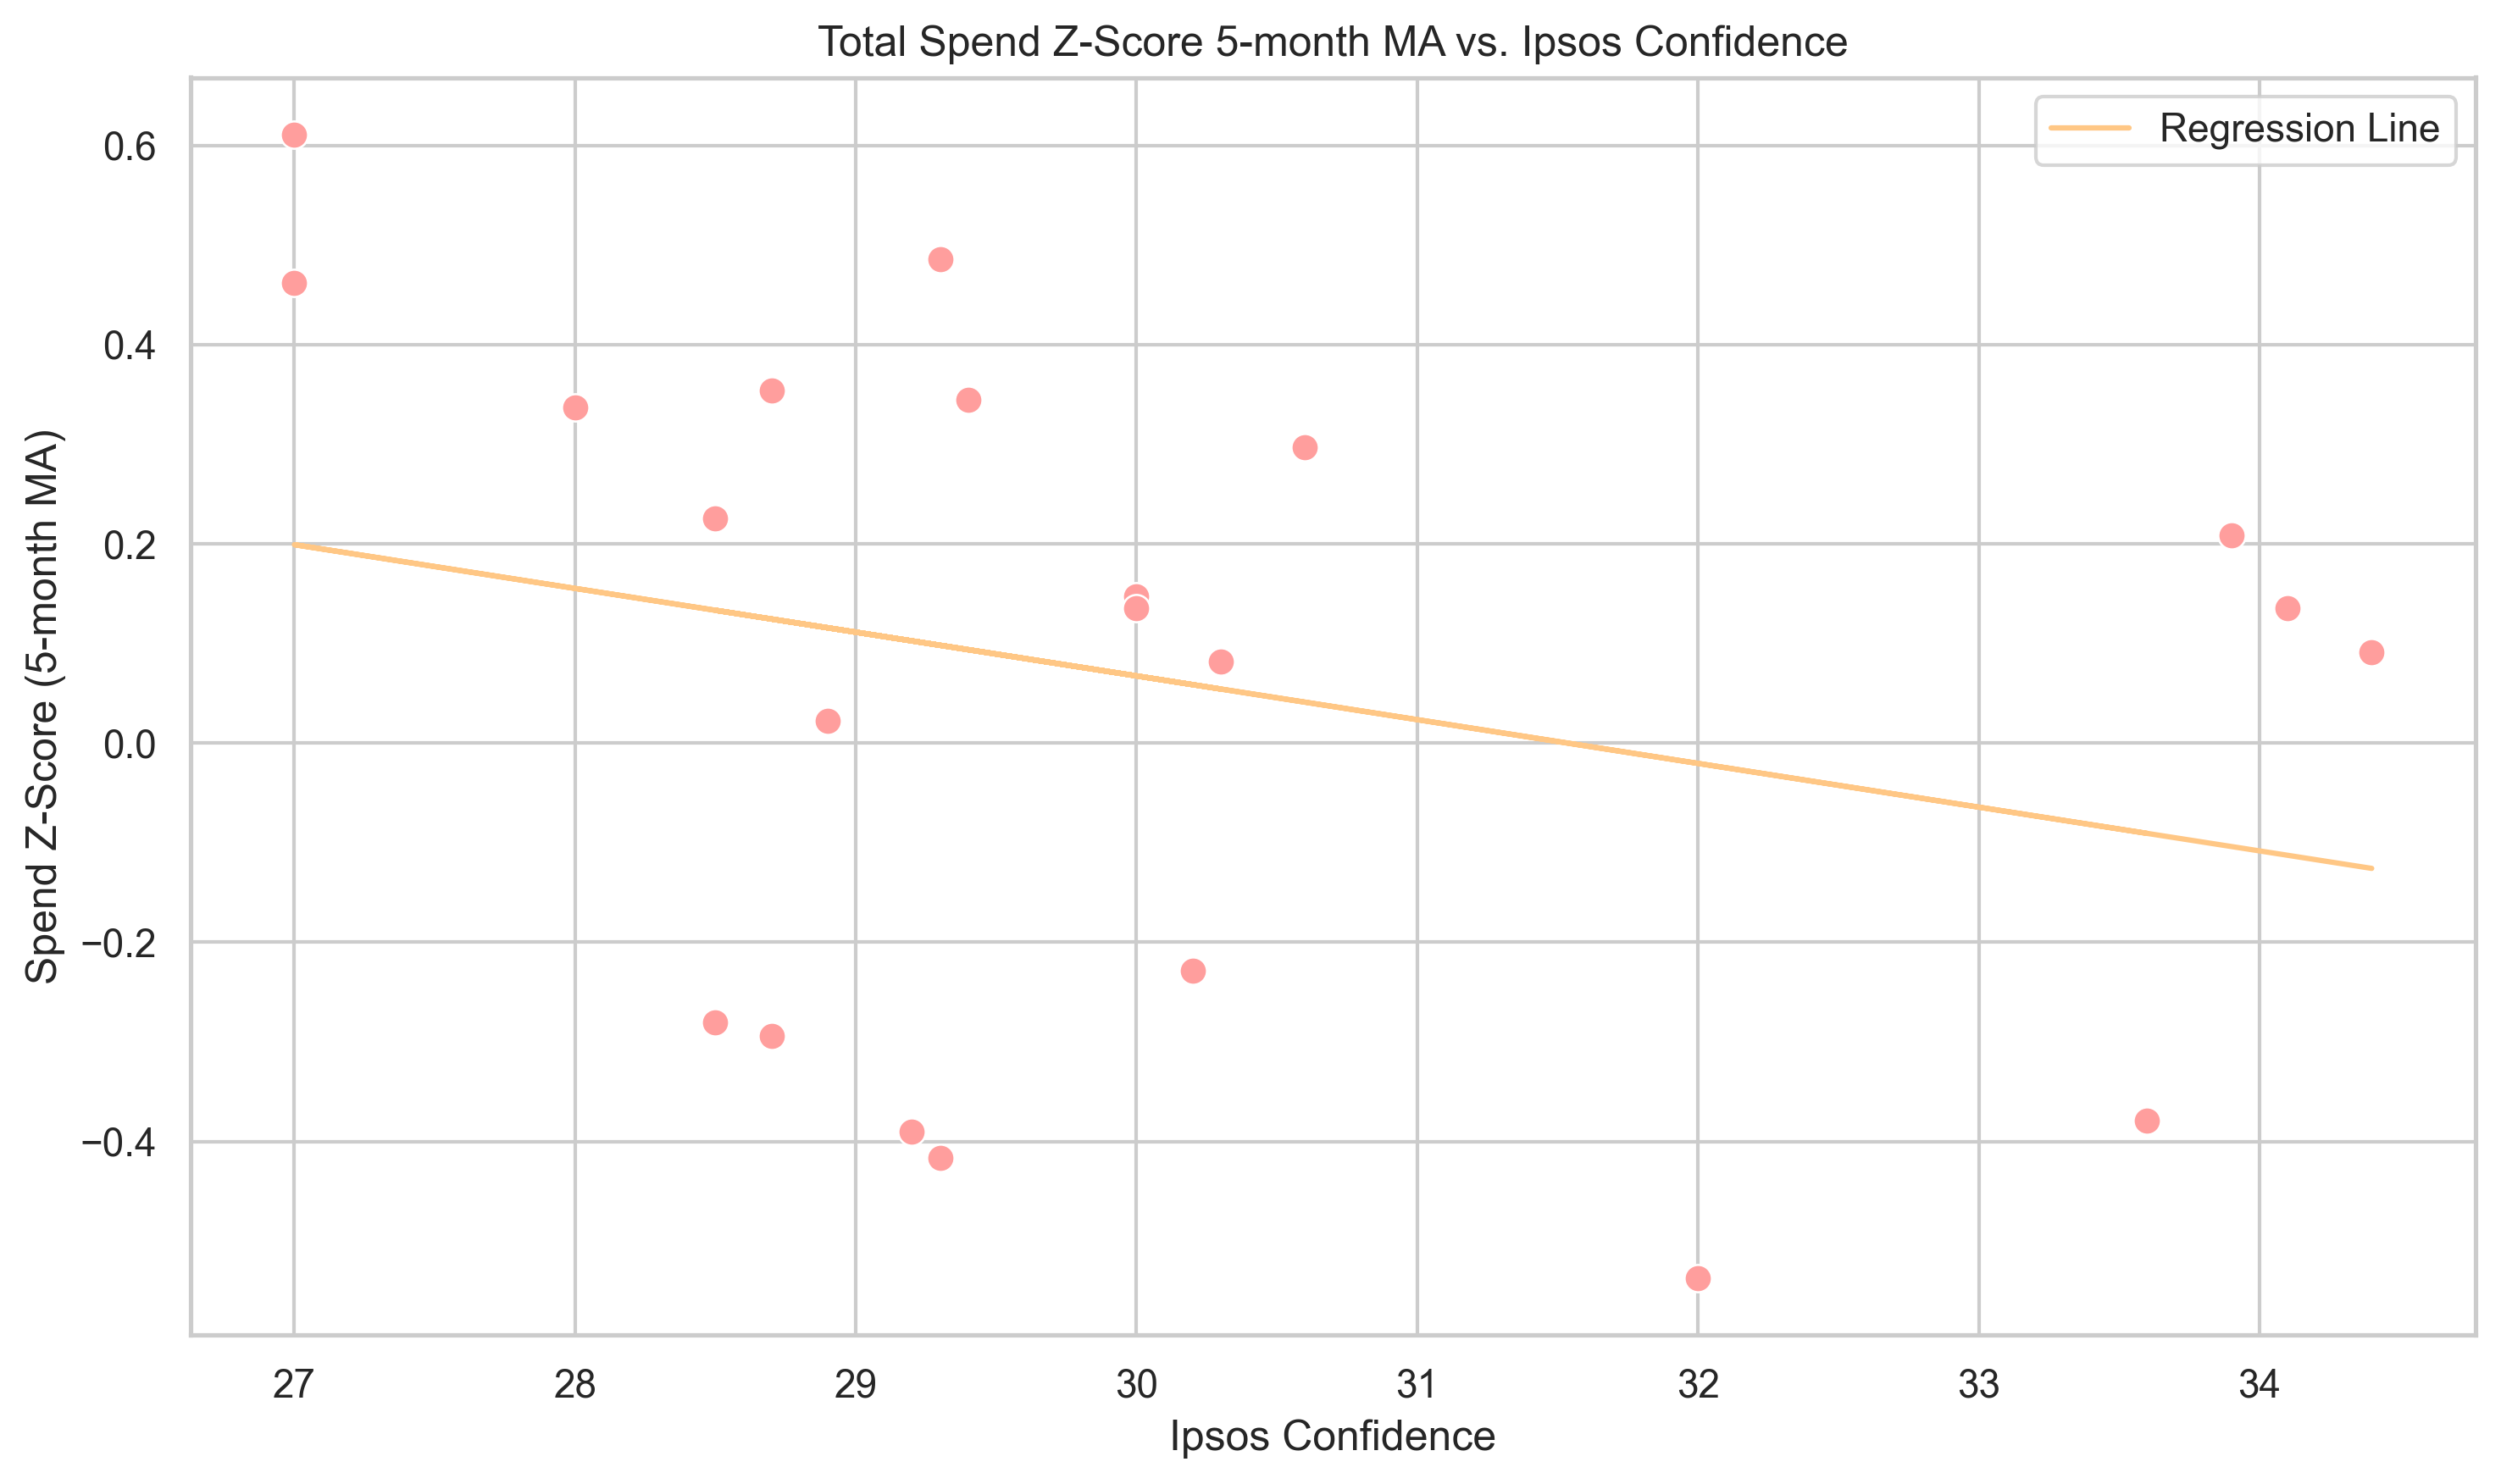

In [15]:

from scipy.stats import zscore

df["invoice_date"] = pd.to_datetime(df["invoice_date"])
df["month"] = df["invoice_date"].dt.to_period("M")

# Monthly aggregation
monthly_summary = (
    df.groupby("month")
      .agg(
          total_transactions=("invoice_no", "count"),
          total_spend=("total_price", "sum"),
          bloomberg_confidence=("bloomberg_confidence", "mean"),
          ipsos_confidence=("ipsos_confidence", "mean"),
          econ_conf=("Econ_Conf", "mean"),
          cons_conf=("Cons_Conf", "mean"),
          realsec_conf=("RealSec_Conf", "mean")
      )
      .reset_index()
)

monthly_summary_clean = monthly_summary[monthly_summary["total_transactions"] > 2000].copy()

# Z-score normalization
monthly_summary_clean["transactions_z"] = zscore(monthly_summary_clean["total_transactions"])
monthly_summary_clean["spend_z"] = zscore(monthly_summary_clean["total_spend"])

# 5-month centered moving average
monthly_summary_clean["transactions_z_ma"] = monthly_summary_clean["transactions_z"].rolling(window=5, center=True).mean()
monthly_summary_clean["spend_z_ma"] = monthly_summary_clean["spend_z"].rolling(window=5, center=True).mean()

print("\nSmoothed data preview:\n")
print(monthly_summary_clean[["month","transactions_z_ma","spend_z_ma"]])

# Example: Ipsos regression on spend_z_ma
reg_df = monthly_summary_clean.dropna(subset=["spend_z_ma", "ipsos_confidence"])

X = sm.add_constant(reg_df["ipsos_confidence"])
y = reg_df["spend_z_ma"]

model = sm.OLS(y, X).fit()
print("\nRegression summary (Ipsos vs. Total Spend Z-MA 5-month):\n")
print(model.summary())

slope = model.params["ipsos_confidence"]
p_value = model.pvalues["ipsos_confidence"]
r_squared = model.rsquared

if p_value < 0.05:
    print(f"\n✅ Significant: Slope = {slope:.4f}, p = {p_value:.4f}, R² = {r_squared:.3f}")
else:
    print(f"\n❌ Not significant: Slope = {slope:.4f}, p = {p_value:.4f}, R² = {r_squared:.3f}")

# Scatter plot
plt.figure(figsize=(10,6), dpi=300)
sns.scatterplot(
    data=reg_df,
    x="ipsos_confidence",
    y="spend_z_ma",
    s=60,
    color=color1
)
y_pred = model.predict(X)
plt.plot(
    reg_df["ipsos_confidence"],
    y_pred,
    color=color2,
    label="Regression Line"
)
plt.title("Total Spend Z-Score 5-month MA vs. Ipsos Confidence")
plt.xlabel("Ipsos Confidence")
plt.ylabel("Spend Z-Score (5-month MA)")
plt.legend()
plt.tight_layout()
plt.savefig('dataset_new_indexes_economic_impact_figures/zscore_moving_average_ols_totaltransaction.png', dpi=300)
plt.show()


z score moving average ols regression - total transaction window = 5


Smoothed data preview:

      month  transactions_z_ma  spend_z_ma
0   2021-01                NaN         NaN
1   2021-02                NaN         NaN
2   2021-03          -0.463726   -0.379040
3   2021-04          -0.540814   -0.537048
4   2021-05           0.314567    0.147201
5   2021-06           0.181146    0.225149
6   2021-07           0.101093    0.135604
7   2021-08           0.201900    0.354049
8   2021-09           0.224137    0.344837
9   2021-10           0.071443    0.022048
10  2021-11           0.255269    0.081479
11  2021-12          -0.075321   -0.293840
12  2022-01          -0.029364   -0.416714
13  2022-02          -0.081250   -0.389772
14  2022-03          -0.128689   -0.228638
15  2022-04          -0.201330   -0.280578
16  2022-05           0.459849    0.485795
17  2022-06           0.407962    0.336842
18  2022-07           0.289365    0.462008
19  2022-08           0.287883    0.610748
20  2022-09           0.238962    0.296852
21  2022-10           0.09961

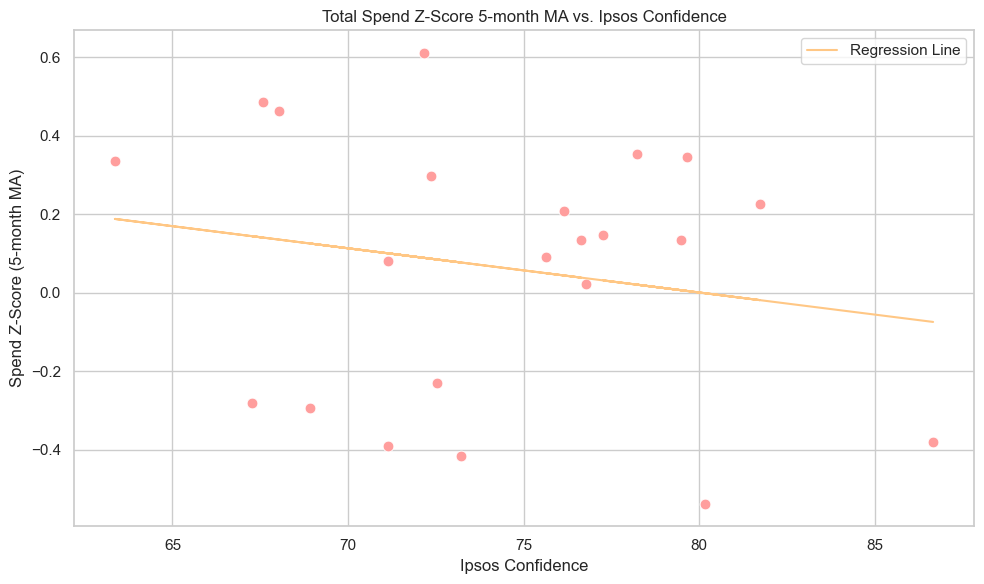

In [16]:

df["invoice_date"] = pd.to_datetime(df["invoice_date"])
df["month"] = df["invoice_date"].dt.to_period("M")

# Monthly aggregation
monthly_summary = (
    df.groupby("month")
      .agg(
          total_transactions=("invoice_no", "count"),
          total_spend=("total_price", "sum"),
          bloomberg_confidence=("bloomberg_confidence", "mean"),
          ipsos_confidence=("ipsos_confidence", "mean"),
          econ_conf=("Econ_Conf", "mean"),
          cons_conf=("Cons_Conf", "mean"),
          realsec_conf=("RealSec_Conf", "mean")
      )
      .reset_index()
)

monthly_summary_clean = monthly_summary[monthly_summary["total_transactions"] > 2000].copy()

# Z-score normalization
monthly_summary_clean["transactions_z"] = zscore(monthly_summary_clean["total_transactions"])
monthly_summary_clean["spend_z"] = zscore(monthly_summary_clean["total_spend"])

# 5-month centered moving average
monthly_summary_clean["transactions_z_ma"] = monthly_summary_clean["transactions_z"].rolling(window=5, center=True).mean()
monthly_summary_clean["spend_z_ma"] = monthly_summary_clean["spend_z"].rolling(window=5, center=True).mean()

print("\nSmoothed data preview:\n")
print(monthly_summary_clean[["month","transactions_z_ma","spend_z_ma"]])

# Example: Ipsos regression on spend_z_ma
reg_df = monthly_summary_clean.dropna(subset=["spend_z_ma", "cons_conf"])

X = sm.add_constant(reg_df["cons_conf"])
y = reg_df["spend_z_ma"]

model = sm.OLS(y, X).fit()
print("\nRegression summary (Ipsos vs. Total Spend Z-MA 5-month):\n")
print(model.summary())

slope = model.params["cons_conf"]
p_value = model.pvalues["cons_conf"]
r_squared = model.rsquared

if p_value < 0.05:
    print(f"\n✅ Significant: Slope = {slope:.4f}, p = {p_value:.4f}, R² = {r_squared:.3f}")
else:
    print(f"\n❌ Not significant: Slope = {slope:.4f}, p = {p_value:.4f}, R² = {r_squared:.3f}")

# Scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=reg_df,
    x="cons_conf",
    y="spend_z_ma",
    s=60,
    color=color1
)
y_pred = model.predict(X)
plt.plot(
    reg_df["cons_conf"],
    y_pred,
    label="Regression Line",
    color=color2
)
plt.title("Total Spend Z-Score 5-month MA vs. Ipsos Confidence")
plt.xlabel("Ipsos Confidence")
plt.ylabel("Spend Z-Score (5-month MA)")
plt.legend()
plt.tight_layout()
plt.savefig('dataset_new_indexes_economic_impact_figures/zscore_moving_average_ols_totaltransaction_window5.png', dpi=300)
plt.show()


ipsos z score moving average robust regression - total spend and transaction


Robust Regression summary:

                    Robust linear Model Regression Results                    
Dep. Variable:             spend_z_ma   No. Observations:                   24
Model:                            RLM   Df Residuals:                       22
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 14 Jul 2025                                         
Time:                        16:23:17                                         
No. Iterations:                    33                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const      

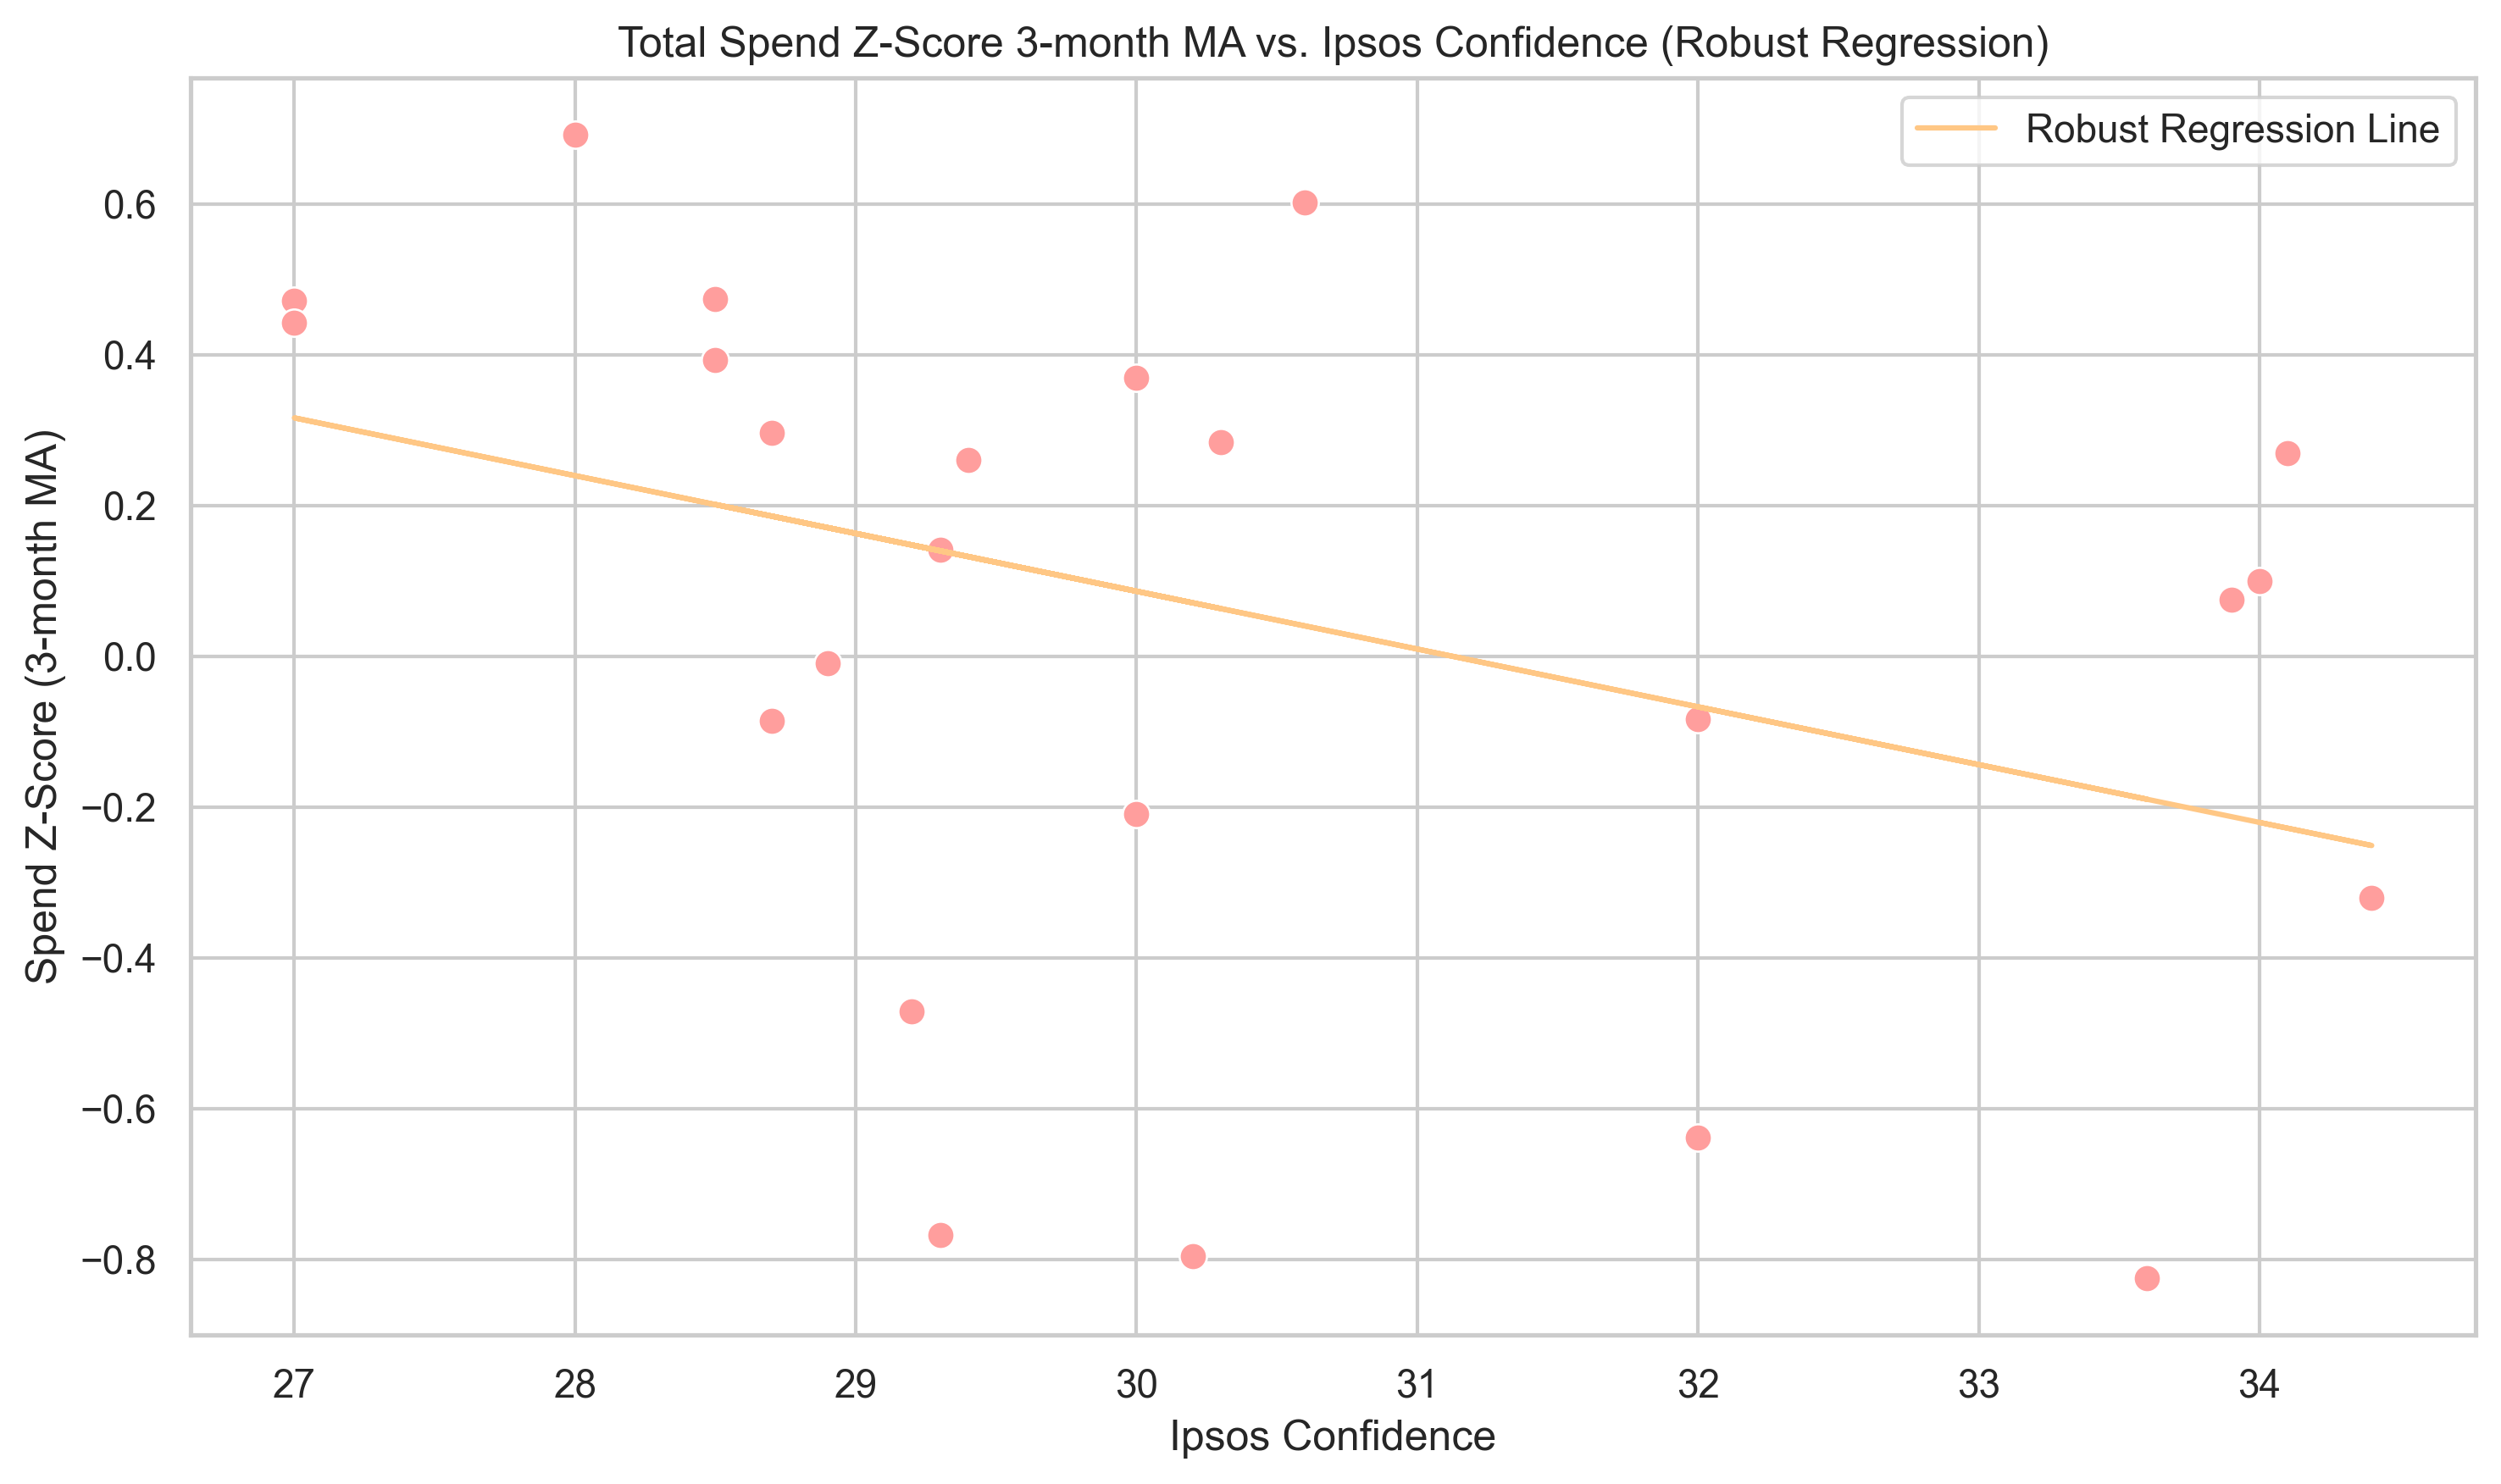

In [17]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore, norm


df["invoice_date"] = pd.to_datetime(df["invoice_date"])
df["month"] = df["invoice_date"].dt.to_period("M")

# Monthly aggregation
monthly_summary = (
    df.groupby("month")
      .agg(
          total_transactions=("invoice_no", "count"),
          total_spend=("total_price", "sum"),
          ipsos_confidence=("ipsos_confidence", "mean"),
          cons_conf=("Cons_Conf", "mean")
      )
      .reset_index()
)

monthly_summary_clean = monthly_summary[monthly_summary["total_transactions"] > 2000].copy()

# Z-score normalization
monthly_summary_clean["spend_z"] = zscore(monthly_summary_clean["total_spend"])

# 3-month centered moving average
monthly_summary_clean["spend_z_ma"] = monthly_summary_clean["spend_z"].rolling(window=3, center=True).mean()

# Choose index
conf_var = "ipsos_confidence"  # or "cons_conf"

# Prepare data
reg_df = monthly_summary_clean.dropna(subset=["spend_z_ma", conf_var])

X = sm.add_constant(reg_df[conf_var])
y = reg_df["spend_z_ma"]

# Robust Regression
rlm_model = sm.RLM(y, X, M=sm.robust.norms.HuberT()).fit()

print("\nRobust Regression summary:\n")
print(rlm_model.summary())

# Extract coefficients
coef = rlm_model.params[conf_var]
std_err = rlm_model.bse[conf_var]

# Compute 95% confidence interval manually
z_crit = norm.ppf(0.975)  # ~1.96
ci_lower = coef - z_crit * std_err
ci_upper = coef + z_crit * std_err

print("\nInterpretation:")
print(f"Slope estimate: {coef:.4f}")
print(f"Standard error: {std_err:.4f}")
print(f"95% CI: [{ci_lower:.4f}, {ci_upper:.4f}]")

# Interpretation message
if ci_upper < 0 or ci_lower > 0:
    print("\n✅ The slope is likely statistically significant (95% CI does not include zero).")
else:
    print("\n❌ The slope is likely not statistically significant (95% CI includes zero).")

# Compute 90% confidence interval manually
z_crit_90 = norm.ppf(0.95)  # ~1.645
ci_lower_90 = coef - z_crit_90 * std_err
ci_upper_90 = coef + z_crit_90 * std_err

print("\n90% CI: [{:.4f}, {:.4f}]".format(ci_lower_90, ci_upper_90))

# Interpretation message
if ci_upper_90 < 0 or ci_lower_90 > 0:
    print("✅ The slope is likely statistically significant at the 90% confidence level (CI does not include zero).")
else:
    print("❌ The slope is likely not statistically significant even at the 90% confidence level.")

# Scatter plot
plt.figure(figsize=(10,6), dpi=300)
sns.scatterplot(
    data=reg_df,
    x=conf_var,
    y="spend_z_ma",
    s=60,
    color=color1
)
y_pred = rlm_model.predict(X)
plt.plot(
    reg_df[conf_var],
    y_pred,
    color=color2,
    label="Robust Regression Line"
)
plt.title(f"Total Spend Z-Score 3-month MA vs. {conf_var.replace('_',' ').title()} (Robust Regression)")
plt.xlabel(f"{conf_var.replace('_',' ').title()}")
plt.ylabel("Spend Z-Score (3-month MA)")
plt.legend()
plt.tight_layout()
plt.savefig('dataset_new_indexes_economic_impact_figures/ipsos_zscore_moving_average_robust_totalspendtransaction.png', dpi=300)
plt.show()


cons z score moving average robust regression - total spend and transaction


Robust Regression summary:

                    Robust linear Model Regression Results                    
Dep. Variable:             spend_z_ma   No. Observations:                   24
Model:                            RLM   Df Residuals:                       22
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 14 Jul 2025                                         
Time:                        16:23:17                                         
No. Iterations:                    12                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3709  

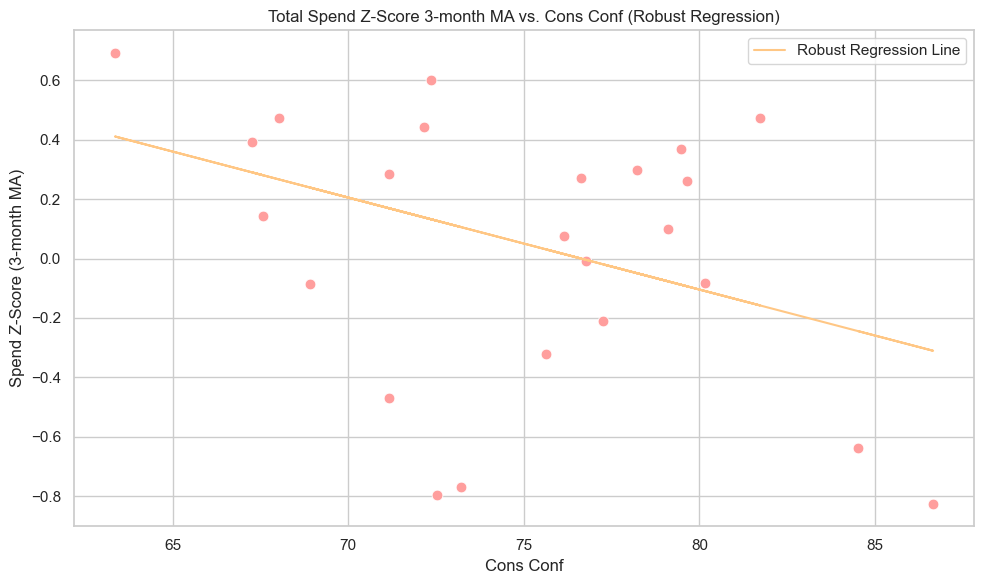

In [18]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore, norm


df["invoice_date"] = pd.to_datetime(df["invoice_date"])
df["month"] = df["invoice_date"].dt.to_period("M")

# Monthly aggregation
monthly_summary = (
    df.groupby("month")
      .agg(
          total_transactions=("invoice_no", "count"),
          total_spend=("total_price", "sum"),
          ipsos_confidence=("ipsos_confidence", "mean"),
          cons_conf=("Cons_Conf", "mean")
      )
      .reset_index()
)

monthly_summary_clean = monthly_summary[monthly_summary["total_transactions"] > 2000].copy()

# Z-score normalization
monthly_summary_clean["spend_z"] = zscore(monthly_summary_clean["total_spend"])

# 3-month centered moving average
monthly_summary_clean["spend_z_ma"] = monthly_summary_clean["spend_z"].rolling(window=3, center=True).mean()

# Choose index
conf_var = "cons_conf"

# Prepare data
reg_df = monthly_summary_clean.dropna(subset=["spend_z_ma", conf_var])

X = sm.add_constant(reg_df[conf_var])
y = reg_df["spend_z_ma"]

# Robust Regression
rlm_model = sm.RLM(y, X, M=sm.robust.norms.HuberT()).fit()

print("\nRobust Regression summary:\n")
print(rlm_model.summary())

# Extract coefficients
coef = rlm_model.params[conf_var]
std_err = rlm_model.bse[conf_var]

# Compute 95% confidence interval manually
z_crit = norm.ppf(0.975)  # ~1.96
ci_lower = coef - z_crit * std_err
ci_upper = coef + z_crit * std_err

print("\nInterpretation:")
print(f"Slope estimate: {coef:.4f}")
print(f"Standard error: {std_err:.4f}")
print(f"95% CI: [{ci_lower:.4f}, {ci_upper:.4f}]")

# Interpretation message
if ci_upper < 0 or ci_lower > 0:
    print("\n✅ The slope is likely statistically significant (95% CI does not include zero).")
else:
    print("\n❌ The slope is likely not statistically significant (95% CI includes zero).")

# Compute 90% confidence interval manually
z_crit_90 = norm.ppf(0.95)  # ~1.645
ci_lower_90 = coef - z_crit_90 * std_err
ci_upper_90 = coef + z_crit_90 * std_err

print("\n90% CI: [{:.4f}, {:.4f}]".format(ci_lower_90, ci_upper_90))

# Interpretation message
if ci_upper_90 < 0 or ci_lower_90 > 0:
    print("✅ The slope is likely statistically significant at the 90% confidence level (CI does not include zero).")
else:
    print("❌ The slope is likely not statistically significant even at the 90% confidence level.")

# Scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=reg_df,
    x=conf_var,
    y="spend_z_ma",
    s=60,
    color=color1
)
y_pred = rlm_model.predict(X)
plt.plot(
    reg_df[conf_var],
    y_pred,
    color=color2,
    label="Robust Regression Line"
)
plt.title(f"Total Spend Z-Score 3-month MA vs. {conf_var.replace('_',' ').title()} (Robust Regression)")
plt.xlabel(f"{conf_var.replace('_',' ').title()}")
plt.ylabel("Spend Z-Score (3-month MA)")
plt.legend()
plt.tight_layout()
plt.savefig('dataset_new_indexes_economic_impact_figures/cons_zscore_moving_average_robust_totalspendtransaction.png', dpi=300)
plt.show()


category 

categoric analysis

In [19]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore


df["invoice_date"] = pd.to_datetime(df["invoice_date"])
df["month"] = df["invoice_date"].dt.to_period("M")

# Compute macro_confidence
df["ipsos_z"] = zscore(df["ipsos_confidence"])
df["cons_z"] = zscore(df["Cons_Conf"])
df["macro_confidence"] = (df["ipsos_z"] + df["cons_z"]) / 2

# Prepare txt output
output_lines = []

# Get unique categories
categories = df["category"].unique()

for cat in categories:
    output_lines.append("\n" + "="*70)
    output_lines.append(f"Category: {cat}")
    output_lines.append("="*70 + "\n")

    # Subset data
    cat_df = df[df["category"] == cat]

    # Monthly aggregation
    monthly_summary = (
        cat_df.groupby("month")
             .agg(
                 total_transactions=("invoice_no", "count"),
                 total_spend=("total_price", "sum"),
                 macro_confidence=("macro_confidence", "mean")
             )
             .reset_index()
    )

    # Drop low-count months
    monthly_summary = monthly_summary[monthly_summary["total_transactions"] > 0].copy()
    if monthly_summary.empty:
        msg = "⚠️ Not enough data for this category—skipping."
        print(msg)
        output_lines.append(msg)
        continue

    # Z-score normalization
    monthly_summary["transactions_z"] = zscore(monthly_summary["total_transactions"])
    monthly_summary["spend_z"] = zscore(monthly_summary["total_spend"])

    # 3-month centered moving average
    monthly_summary["transactions_z_ma"] = monthly_summary["transactions_z"].rolling(window=3, center=True).mean()
    monthly_summary["spend_z_ma"] = monthly_summary["spend_z"].rolling(window=3, center=True).mean()

    # Transactions Regression
    reg_df_tx = monthly_summary.dropna(subset=["transactions_z_ma", "macro_confidence"])
    X_tx = sm.add_constant(reg_df_tx["macro_confidence"])
    y_tx = reg_df_tx["transactions_z_ma"]
    model_tx = sm.OLS(y_tx, X_tx).fit()

    output_lines.append("\nTransaction Regression Summary:\n")
    output_lines.append(str(model_tx.summary()))

    slope_tx = model_tx.params["macro_confidence"]
    p_tx = model_tx.pvalues["macro_confidence"]

    if p_tx < 0.05:
        comment_tx = f"✅ Significant for transactions (p={p_tx:.3f})"
    elif p_tx < 0.1:
        comment_tx = f"⚠️ Marginally significant for transactions (trend-level evidence) (p={p_tx:.3f})"
    else:
        comment_tx = f"❌ Not significant for transactions (p={p_tx:.3f})"

    output_lines.append(comment_tx)

    # Spend Regression
    reg_df_sp = monthly_summary.dropna(subset=["spend_z_ma", "macro_confidence"])
    X_sp = sm.add_constant(reg_df_sp["macro_confidence"])
    y_sp = reg_df_sp["spend_z_ma"]
    model_sp = sm.OLS(y_sp, X_sp).fit()

    output_lines.append("\nSpend Regression Summary:\n")
    output_lines.append(str(model_sp.summary()))

    slope_sp = model_sp.params["macro_confidence"]
    p_sp = model_sp.pvalues["macro_confidence"]

    if p_sp < 0.05:
        comment_sp = f"✅ Significant for spend (p={p_sp:.3f})"
    elif p_sp < 0.1:
        comment_sp = f"⚠️ Marginally significant for spend (trend-level evidence) (p={p_sp:.3f})"
    else:
        comment_sp = f"❌ Not significant for spend (p={p_sp:.3f})"

    output_lines.append(comment_sp)

    # Print all outputs immediately
    for line in [comment_tx, comment_sp]:
        print(line)

# Save outputs to txt
with open("economic_regression_txt_results/category_regression_results.txt", "w") as f:
    for line in output_lines:
        f.write(line + "\n")

print("\n✅ All results saved to category_regression_results.txt")


⚠️ Marginally significant for transactions (trend-level evidence) (p=0.051)
✅ Significant for spend (p=0.023)
✅ Significant for transactions (p=0.009)
✅ Significant for spend (p=0.005)
❌ Not significant for transactions (p=0.429)
❌ Not significant for spend (p=0.305)
✅ Significant for transactions (p=0.014)
⚠️ Marginally significant for spend (trend-level evidence) (p=0.076)
✅ Significant for transactions (p=0.008)
⚠️ Marginally significant for spend (trend-level evidence) (p=0.055)
✅ Significant for transactions (p=0.014)
⚠️ Marginally significant for spend (trend-level evidence) (p=0.071)
⚠️ Marginally significant for transactions (trend-level evidence) (p=0.072)
❌ Not significant for spend (p=0.431)
❌ Not significant for transactions (p=0.165)
⚠️ Marginally significant for spend (trend-level evidence) (p=0.076)

✅ All results saved to category_regression_results.txt


season

In [20]:
import pandas as pd
import statsmodels.api as sm
from scipy.stats import zscore

# datetime
df["invoice_date"] = pd.to_datetime(df["invoice_date"])
df["month"] = df["invoice_date"].dt.to_period("M")

# macro_confidence
df["ipsos_z"] = zscore(df["ipsos_confidence"])
df["cons_z"] = zscore(df["Cons_Conf"])
df["macro_confidence"] = (df["ipsos_z"] + df["cons_z"]) / 2

output_lines = []

# unique seasons
seasons = df["season"].unique()

for season in seasons:
    output_lines.append("\n" + "="*70)
    output_lines.append(f"Season: {season}")
    output_lines.append("="*70 + "\n")

    # Subset
    season_df = df[df["season"] == season]

    # Monthly aggregation
    monthly_summary = (
        season_df.groupby("month")
            .agg(
                total_transactions=("invoice_no", "count"),
                total_spend=("total_price", "sum"),
                macro_confidence=("macro_confidence", "mean")
            )
            .reset_index()
    )

    # Drop months with no transactions
    monthly_summary = monthly_summary[monthly_summary["total_transactions"] > 0].copy()
    if monthly_summary.empty:
        msg = "⚠️ Not enough data for this season—skipping."
        print(msg)
        output_lines.append(msg)
        continue

    # Z-score normalization
    monthly_summary["transactions_z"] = zscore(monthly_summary["total_transactions"])
    monthly_summary["spend_z"] = zscore(monthly_summary["total_spend"])

    # 3-month centered moving average
    monthly_summary["transactions_z_ma"] = monthly_summary["transactions_z"].rolling(window=3, center=True).mean()
    monthly_summary["spend_z_ma"] = monthly_summary["spend_z"].rolling(window=3, center=True).mean()

    # Transactions regression
    reg_df_tx = monthly_summary.dropna(subset=["transactions_z_ma", "macro_confidence"])
    X_tx = sm.add_constant(reg_df_tx["macro_confidence"])
    y_tx = reg_df_tx["transactions_z_ma"]
    model_tx = sm.OLS(y_tx, X_tx).fit()

    output_lines.append("\nTransaction Regression Summary:\n")
    output_lines.append(str(model_tx.summary()))

    slope_tx = model_tx.params["macro_confidence"]
    p_tx = model_tx.pvalues["macro_confidence"]

    if p_tx < 0.05:
        comment_tx = f"✅ Significant for transactions (p={p_tx:.3f})"
    elif p_tx < 0.1:
        comment_tx = f"⚠️ Marginally significant for transactions (trend-level evidence) (p={p_tx:.3f})"
    else:
        comment_tx = f"❌ Not significant for transactions (p={p_tx:.3f})"

    output_lines.append(comment_tx)

    # Spend regression
    reg_df_sp = monthly_summary.dropna(subset=["spend_z_ma", "macro_confidence"])
    X_sp = sm.add_constant(reg_df_sp["macro_confidence"])
    y_sp = reg_df_sp["spend_z_ma"]
    model_sp = sm.OLS(y_sp, X_sp).fit()

    output_lines.append("\nSpend Regression Summary:\n")
    output_lines.append(str(model_sp.summary()))

    slope_sp = model_sp.params["macro_confidence"]
    p_sp = model_sp.pvalues["macro_confidence"]

    if p_sp < 0.05:
        comment_sp = f"✅ Significant for spend (p={p_sp:.3f})"
    elif p_sp < 0.1:
        comment_sp = f"⚠️ Marginally significant for spend (trend-level evidence) (p={p_sp:.3f})"
    else:
        comment_sp = f"❌ Not significant for spend (p={p_sp:.3f})"

    output_lines.append(comment_sp)

    # Print summaries immediately
    for line in [comment_tx, comment_sp]:
        print(line)

# Save to txt
with open("economic_regression_txt_results/season_regression_results.txt", "w") as f:
    for line in output_lines:
        f.write(line + "\n")

print("\n✅ All results saved to season_regression_results.txt")


❌ Not significant for transactions (p=0.988)
❌ Not significant for spend (p=0.972)
❌ Not significant for transactions (p=0.304)
❌ Not significant for spend (p=0.541)
❌ Not significant for transactions (p=0.170)
❌ Not significant for spend (p=0.545)
❌ Not significant for transactions (p=0.491)
❌ Not significant for spend (p=0.511)

✅ All results saved to season_regression_results.txt


/Users/ebrarsudedogan/anaconda3/envs/Data_Mining_Conda/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/ebrarsudedogan/anaconda3/envs/Data_Mining_Conda/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/ebrarsudedogan/anaconda3/envs/Data_Mining_Conda/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/ebrarsudedogan/anaconda3/envs/Data_Mining_Conda/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest i

gender

In [21]:
import pandas as pd
import statsmodels.api as sm
from scipy.stats import zscore

df["invoice_date"] = pd.to_datetime(df["invoice_date"])
df["month"] = df["invoice_date"].dt.to_period("M")

# Compute macro_confidence
df["ipsos_z"] = zscore(df["ipsos_confidence"])
df["cons_z"] = zscore(df["Cons_Conf"])
df["macro_confidence"] = (df["ipsos_z"] + df["cons_z"]) / 2

output_lines = []

genders = df["gender"].unique()

for gender in genders:
    output_lines.append("\n" + "="*70)
    output_lines.append(f"Gender: {gender}")
    output_lines.append("="*70 + "\n")

    gender_df = df[df["gender"] == gender]

    monthly_summary = (
        gender_df.groupby("month")
                 .agg(
                     total_transactions=("invoice_no", "count"),
                     total_spend=("total_price", "sum"),
                     macro_confidence=("macro_confidence", "mean")
                 )
                 .reset_index()
    )

    monthly_summary = monthly_summary[monthly_summary["total_transactions"] > 0].copy()
    if monthly_summary.empty:
        msg = "⚠️ Not enough data for this gender—skipping."
        print(msg)
        output_lines.append(msg)
        continue

    monthly_summary["transactions_z"] = zscore(monthly_summary["total_transactions"])
    monthly_summary["spend_z"] = zscore(monthly_summary["total_spend"])

    monthly_summary["transactions_z_ma"] = monthly_summary["transactions_z"].rolling(window=3, center=True).mean()
    monthly_summary["spend_z_ma"] = monthly_summary["spend_z"].rolling(window=3, center=True).mean()

    # Transactions regression
    reg_df_tx = monthly_summary.dropna(subset=["transactions_z_ma", "macro_confidence"])
    X_tx = sm.add_constant(reg_df_tx["macro_confidence"])
    y_tx = reg_df_tx["transactions_z_ma"]
    model_tx = sm.OLS(y_tx, X_tx).fit()

    output_lines.append("\nTransaction Regression Summary:\n")
    output_lines.append(str(model_tx.summary()))

    slope_tx = model_tx.params["macro_confidence"]
    p_tx = model_tx.pvalues["macro_confidence"]

    if p_tx < 0.05:
        comment_tx = f"✅ Significant for transactions (p={p_tx:.3f})"
    elif p_tx < 0.1:
        comment_tx = f"⚠️ Marginally significant for transactions (trend-level evidence) (p={p_tx:.3f})"
    else:
        comment_tx = f"❌ Not significant for transactions (p={p_tx:.3f})"

    output_lines.append(comment_tx)
    print(comment_tx)

    # Spend regression
    reg_df_sp = monthly_summary.dropna(subset=["spend_z_ma", "macro_confidence"])
    X_sp = sm.add_constant(reg_df_sp["macro_confidence"])
    y_sp = reg_df_sp["spend_z_ma"]
    model_sp = sm.OLS(y_sp, X_sp).fit()

    output_lines.append("\nSpend Regression Summary:\n")
    output_lines.append(str(model_sp.summary()))

    slope_sp = model_sp.params["macro_confidence"]
    p_sp = model_sp.pvalues["macro_confidence"]

    if p_sp < 0.05:
        comment_sp = f"✅ Significant for spend (p={p_sp:.3f})"
    elif p_sp < 0.1:
        comment_sp = f"⚠️ Marginally significant for spend (trend-level evidence) (p={p_sp:.3f})"
    else:
        comment_sp = f"❌ Not significant for spend (p={p_sp:.3f})"

    output_lines.append(comment_sp)
    print(comment_sp)

# Save outputs to txt
with open("economic_regression_txt_results/gender_regression_results.txt", "w") as f:
    for line in output_lines:
        f.write(line + "\n")

print("\n✅ All results saved to gender_regression_results.txt")


✅ Significant for transactions (p=0.028)
✅ Significant for spend (p=0.019)
✅ Significant for transactions (p=0.010)
✅ Significant for spend (p=0.044)

✅ All results saved to gender_regression_results.txt


age

In [22]:
import pandas as pd
import statsmodels.api as sm
from scipy.stats import zscore

df["invoice_date"] = pd.to_datetime(df["invoice_date"])
df["month"] = df["invoice_date"].dt.to_period("M")

# Compute macro_confidence
df["ipsos_z"] = zscore(df["ipsos_confidence"])
df["cons_z"] = zscore(df["Cons_Conf"])
df["macro_confidence"] = (df["ipsos_z"] + df["cons_z"]) / 2

output_lines = []

output_lines.append("\n" + "="*70)
output_lines.append("Continuous Age Analysis")
output_lines.append("="*70 + "\n")

# Monthly aggregation
monthly_summary = (
    df.groupby("month")
    .agg(
        avg_age=("age", "mean"),
        total_transactions=("invoice_no", "count"),
        total_spend=("total_price", "sum"),
        macro_confidence=("macro_confidence", "mean")
    )
    .reset_index()
)

monthly_summary = monthly_summary[monthly_summary["total_transactions"] > 0].copy()

monthly_summary["transactions_z"] = zscore(monthly_summary["total_transactions"])
monthly_summary["spend_z"] = zscore(monthly_summary["total_spend"])

monthly_summary["transactions_z_ma"] = monthly_summary["transactions_z"].rolling(window=3, center=True).mean()
monthly_summary["spend_z_ma"] = monthly_summary["spend_z"].rolling(window=3, center=True).mean()

# Transactions Regression
reg_df_tx = monthly_summary.dropna(subset=["transactions_z_ma", "macro_confidence"])
X_tx = sm.add_constant(reg_df_tx["macro_confidence"])
y_tx = reg_df_tx["transactions_z_ma"]
model_tx = sm.OLS(y_tx, X_tx).fit()

output_lines.append("\nTransaction Regression Summary:\n")
output_lines.append(str(model_tx.summary()))

p_tx = model_tx.pvalues["macro_confidence"]
if p_tx < 0.05:
    comment_tx = f"✅ Significant for transactions (p={p_tx:.3f})"
elif p_tx < 0.1:
    comment_tx = f"⚠️ Marginally significant for transactions (trend-level evidence) (p={p_tx:.3f})"
else:
    comment_tx = f"❌ Not significant for transactions (p={p_tx:.3f})"
output_lines.append(comment_tx)
print(comment_tx)

# Spend Regression
reg_df_sp = monthly_summary.dropna(subset=["spend_z_ma", "macro_confidence"])
X_sp = sm.add_constant(reg_df_sp["macro_confidence"])
y_sp = reg_df_sp["spend_z_ma"]
model_sp = sm.OLS(y_sp, X_sp).fit()

output_lines.append("\nSpend Regression Summary:\n")
output_lines.append(str(model_sp.summary()))

p_sp = model_sp.pvalues["macro_confidence"]
if p_sp < 0.05:
    comment_sp = f"✅ Significant for spend (p={p_sp:.3f})"
elif p_sp < 0.1:
    comment_sp = f"⚠️ Marginally significant for spend (trend-level evidence) (p={p_sp:.3f})"
else:
    comment_sp = f"❌ Not significant for spend (p={p_sp:.3f})"
output_lines.append(comment_sp)
print(comment_sp)

with open("economic_regression_txt_results/age_continuous_regression_results.txt", "w") as f:
    for line in output_lines:
        f.write(line + "\n")

print("\n✅ All results saved to age_continuous_regression_results.txt")


✅ Significant for transactions (p=0.017)
✅ Significant for spend (p=0.019)

✅ All results saved to age_continuous_regression_results.txt


In [23]:
import pandas as pd
import statsmodels.api as sm
from scipy.stats import zscore

df["invoice_date"] = pd.to_datetime(df["invoice_date"])
df["month"] = df["invoice_date"].dt.to_period("M")

# Compute macro_confidence
df["ipsos_z"] = zscore(df["ipsos_confidence"])
df["cons_z"] = zscore(df["Cons_Conf"])
df["macro_confidence"] = (df["ipsos_z"] + df["cons_z"]) / 2

# Age group bins
bins = list(range(18, 70, 5))
if bins[-1] < 69:
    bins.append(70)

df["age_group"] = pd.cut(df["age"], bins=bins, right=False)

output_lines = []

groups = df["age_group"].dropna().unique()

for group in groups:
    output_lines.append("\n" + "="*70)
    output_lines.append(f"Age Group: {group}")
    output_lines.append("="*70 + "\n")

    group_df = df[df["age_group"] == group]

    monthly_summary = (
        group_df.groupby("month")
        .agg(
            total_transactions=("invoice_no", "count"),
            total_spend=("total_price", "sum"),
            macro_confidence=("macro_confidence", "mean")
        )
        .reset_index()
    )

    monthly_summary = monthly_summary[monthly_summary["total_transactions"] > 0].copy()
    if monthly_summary.empty:
        msg = "⚠️ Not enough data for this group—skipping."
        print(msg)
        output_lines.append(msg)
        continue

    monthly_summary["transactions_z"] = zscore(monthly_summary["total_transactions"])
    monthly_summary["spend_z"] = zscore(monthly_summary["total_spend"])

    monthly_summary["transactions_z_ma"] = monthly_summary["transactions_z"].rolling(window=3, center=True).mean()
    monthly_summary["spend_z_ma"] = monthly_summary["spend_z"].rolling(window=3, center=True).mean()

    # Transactions Regression
    reg_df_tx = monthly_summary.dropna(subset=["transactions_z_ma", "macro_confidence"])
    X_tx = sm.add_constant(reg_df_tx["macro_confidence"])
    y_tx = reg_df_tx["transactions_z_ma"]
    model_tx = sm.OLS(y_tx, X_tx).fit()

    output_lines.append("\nTransaction Regression Summary:\n")
    output_lines.append(str(model_tx.summary()))

    p_tx = model_tx.pvalues["macro_confidence"]
    if p_tx < 0.05:
        comment_tx = f"✅ Significant for transactions (p={p_tx:.3f})"
    elif p_tx < 0.1:
        comment_tx = f"⚠️ Marginally significant for transactions (trend-level evidence) (p={p_tx:.3f})"
    else:
        comment_tx = f"❌ Not significant for transactions (p={p_tx:.3f})"
    output_lines.append(comment_tx)
    print(comment_tx)

    # Spend Regression
    reg_df_sp = monthly_summary.dropna(subset=["spend_z_ma", "macro_confidence"])
    X_sp = sm.add_constant(reg_df_sp["macro_confidence"])
    y_sp = reg_df_sp["spend_z_ma"]
    model_sp = sm.OLS(y_sp, X_sp).fit()

    output_lines.append("\nSpend Regression Summary:\n")
    output_lines.append(str(model_sp.summary()))

    p_sp = model_sp.pvalues["macro_confidence"]
    if p_sp < 0.05:
        comment_sp = f"✅ Significant for spend (p={p_sp:.3f})"
    elif p_sp <= 0.1:
        comment_sp = f"⚠️ Marginally significant for spend (trend-level evidence) (p={p_sp:.3f})"
    else:
        comment_sp = f"❌ Not significant for spend (p={p_sp:.3f})"
    output_lines.append(comment_sp)
    print(comment_sp)

with open("economic_regression_txt_results/age_group_regression_results.txt", "w") as f:
    for line in output_lines:
        f.write(line + "\n")

print("\n✅ All results saved to age_group_regression_results.txt")


✅ Significant for transactions (p=0.043)
❌ Not significant for spend (p=0.586)
✅ Significant for transactions (p=0.005)
✅ Significant for spend (p=0.001)
✅ Significant for transactions (p=0.006)
✅ Significant for spend (p=0.006)
⚠️ Marginally significant for transactions (trend-level evidence) (p=0.076)
✅ Significant for spend (p=0.035)
⚠️ Marginally significant for transactions (trend-level evidence) (p=0.093)
❌ Not significant for spend (p=0.161)
✅ Significant for transactions (p=0.015)
✅ Significant for spend (p=0.022)
❌ Not significant for transactions (p=0.300)
❌ Not significant for spend (p=0.926)
❌ Not significant for transactions (p=0.100)
❌ Not significant for spend (p=0.327)
✅ Significant for transactions (p=0.026)
❌ Not significant for spend (p=0.139)
✅ Significant for transactions (p=0.002)
✅ Significant for spend (p=0.002)
⚠️ Marginally significant for transactions (trend-level evidence) (p=0.066)
❌ Not significant for spend (p=0.421)

✅ All results saved to age_group_regr

SHOPPİNG MALL

In [24]:
import pandas as pd
import statsmodels.api as sm
from scipy.stats import zscore

df["invoice_date"] = pd.to_datetime(df["invoice_date"])
df["month"] = df["invoice_date"].dt.to_period("M")

# Compute macro_confidence
df["ipsos_z"] = zscore(df["ipsos_confidence"])
df["cons_z"] = zscore(df["Cons_Conf"])
df["macro_confidence"] = (df["ipsos_z"] + df["cons_z"]) / 2

output_lines = []

# Unique shopping malls
malls = df["shopping_mall"].dropna().unique()

for mall in malls:
    output_lines.append("\n" + "="*70)
    output_lines.append(f"Shopping Mall: {mall}")
    output_lines.append("="*70 + "\n")

    mall_df = df[df["shopping_mall"] == mall]

    monthly_summary = (
        mall_df.groupby("month")
        .agg(
            total_transactions=("invoice_no", "count"),
            total_spend=("total_price", "sum"),
            macro_confidence=("macro_confidence", "mean")
        )
        .reset_index()
    )

    monthly_summary = monthly_summary[monthly_summary["total_transactions"] > 0].copy()
    if monthly_summary.empty:
        msg = "⚠️ Not enough data for this mall—skipping."
        print(msg)
        output_lines.append(msg)
        continue

    # Z-scores
    monthly_summary["transactions_z"] = zscore(monthly_summary["total_transactions"])
    monthly_summary["spend_z"] = zscore(monthly_summary["total_spend"])

    # Moving average
    monthly_summary["transactions_z_ma"] = monthly_summary["transactions_z"].rolling(window=3, center=True).mean()
    monthly_summary["spend_z_ma"] = monthly_summary["spend_z"].rolling(window=3, center=True).mean()

    # Transactions Regression
    reg_df_tx = monthly_summary.dropna(subset=["transactions_z_ma", "macro_confidence"])
    X_tx = sm.add_constant(reg_df_tx["macro_confidence"])
    y_tx = reg_df_tx["transactions_z_ma"]
    model_tx = sm.OLS(y_tx, X_tx).fit()

    output_lines.append("\nTransaction Regression Summary:\n")
    output_lines.append(str(model_tx.summary()))

    p_tx = model_tx.pvalues["macro_confidence"]
    if p_tx < 0.05:
        comment_tx = f"✅ Significant for transactions (p={p_tx:.3f})"
    elif p_tx < 0.1:
        comment_tx = f"⚠️ Marginally significant for transactions (trend-level evidence) (p={p_tx:.3f})"
    else:
        comment_tx = f"❌ Not significant for transactions (p={p_tx:.3f})"
    output_lines.append(comment_tx)
    print(comment_tx)

    # Spend Regression
    reg_df_sp = monthly_summary.dropna(subset=["spend_z_ma", "macro_confidence"])
    X_sp = sm.add_constant(reg_df_sp["macro_confidence"])
    y_sp = reg_df_sp["spend_z_ma"]
    model_sp = sm.OLS(y_sp, X_sp).fit()

    output_lines.append("\nSpend Regression Summary:\n")
    output_lines.append(str(model_sp.summary()))

    p_sp = model_sp.pvalues["macro_confidence"]
    if p_sp < 0.05:
        comment_sp = f"✅ Significant for spend (p={p_sp:.3f})"
    elif p_sp <= 0.1:
        comment_sp = f"⚠️ Marginally significant for spend (trend-level evidence) (p={p_sp:.3f})"
    else:
        comment_sp = f"❌ Not significant for spend (p={p_sp:.3f})"
    output_lines.append(comment_sp)
    print(comment_sp)

with open("economic_regression_txt_results/mall_regression_results.txt", "w") as f:
    for line in output_lines:
        f.write(line + "\n")

print("\n✅ All results saved to mall_regression_results.txt")


⚠️ Marginally significant for transactions (trend-level evidence) (p=0.065)
❌ Not significant for spend (p=0.318)
❌ Not significant for transactions (p=0.354)
⚠️ Marginally significant for spend (trend-level evidence) (p=0.085)
✅ Significant for transactions (p=0.006)
⚠️ Marginally significant for spend (trend-level evidence) (p=0.073)
✅ Significant for transactions (p=0.008)
❌ Not significant for spend (p=0.440)
✅ Significant for transactions (p=0.007)
✅ Significant for spend (p=0.020)
✅ Significant for transactions (p=0.028)
❌ Not significant for spend (p=0.121)
❌ Not significant for transactions (p=0.225)
❌ Not significant for spend (p=0.119)
✅ Significant for transactions (p=0.031)
✅ Significant for spend (p=0.000)
❌ Not significant for transactions (p=0.329)
✅ Significant for spend (p=0.043)
⚠️ Marginally significant for transactions (trend-level evidence) (p=0.077)
✅ Significant for spend (p=0.000)

✅ All results saved to mall_regression_results.txt


weekday

In [25]:
import pandas as pd
import statsmodels.api as sm
from scipy.stats import zscore

df["invoice_date"] = pd.to_datetime(df["invoice_date"])
df["month"] = df["invoice_date"].dt.to_period("M")

# Compute macro_confidence
df["ipsos_z"] = zscore(df["ipsos_confidence"])
df["cons_z"] = zscore(df["Cons_Conf"])
df["macro_confidence"] = (df["ipsos_z"] + df["cons_z"]) / 2

output_lines = []

groups = df["is_weekday"].dropna().unique()

for group in groups:
    output_lines.append("\n" + "="*70)
    output_lines.append(f"is_weekday: {group}")
    output_lines.append("="*70 + "\n")

    group_df = df[df["is_weekday"] == group]

    monthly_summary = (
        group_df.groupby("month")
        .agg(
            total_transactions=("invoice_no", "count"),
            total_spend=("total_price", "sum"),
            macro_confidence=("macro_confidence", "mean")
        )
        .reset_index()
    )

    monthly_summary = monthly_summary[monthly_summary["total_transactions"] > 0].copy()
    if monthly_summary.empty:
        msg = "⚠️ Not enough data for this group—skipping."
        print(msg)
        output_lines.append(msg)
        continue

    monthly_summary["transactions_z"] = zscore(monthly_summary["total_transactions"])
    monthly_summary["spend_z"] = zscore(monthly_summary["total_spend"])

    monthly_summary["transactions_z_ma"] = monthly_summary["transactions_z"].rolling(window=3, center=True).mean()
    monthly_summary["spend_z_ma"] = monthly_summary["spend_z"].rolling(window=3, center=True).mean()

    # Transactions Regression
    reg_df_tx = monthly_summary.dropna(subset=["transactions_z_ma", "macro_confidence"])
    X_tx = sm.add_constant(reg_df_tx["macro_confidence"])
    y_tx = reg_df_tx["transactions_z_ma"]
    model_tx = sm.OLS(y_tx, X_tx).fit()

    output_lines.append("\nTransaction Regression Summary:\n")
    output_lines.append(str(model_tx.summary()))

    p_tx = model_tx.pvalues["macro_confidence"]
    if p_tx < 0.05:
        comment_tx = f"✅ Significant for transactions (p={p_tx:.3f})"
    elif p_tx < 0.1:
        comment_tx = f"⚠️ Marginally significant for transactions (trend-level evidence) (p={p_tx:.3f})"
    else:
        comment_tx = f"❌ Not significant for transactions (p={p_tx:.3f})"
    output_lines.append(comment_tx)
    print(comment_tx)

    # Spend Regression
    reg_df_sp = monthly_summary.dropna(subset=["spend_z_ma", "macro_confidence"])
    X_sp = sm.add_constant(reg_df_sp["macro_confidence"])
    y_sp = reg_df_sp["spend_z_ma"]
    model_sp = sm.OLS(y_sp, X_sp).fit()

    output_lines.append("\nSpend Regression Summary:\n")
    output_lines.append(str(model_sp.summary()))

    p_sp = model_sp.pvalues["macro_confidence"]
    if p_sp < 0.05:
        comment_sp = f"✅ Significant for spend (p={p_sp:.3f})"
    elif p_sp <= 0.1:
        comment_sp = f"⚠️ Marginally significant for spend (trend-level evidence) (p={p_sp:.3f})"
    else:
        comment_sp = f"❌ Not significant for spend (p={p_sp:.3f})"
    output_lines.append(comment_sp)
    print(comment_sp)

with open("economic_regression_txt_results/weekday_regression_results.txt", "w") as f:
    for line in output_lines:
        f.write(line + "\n")

print("\n✅ All results saved to weekday_regression_results.txt")


✅ Significant for transactions (p=0.013)
✅ Significant for spend (p=0.003)
⚠️ Marginally significant for transactions (trend-level evidence) (p=0.056)
❌ Not significant for spend (p=0.495)

✅ All results saved to weekday_regression_results.txt


holiday

In [26]:
import pandas as pd
import statsmodels.api as sm
from scipy.stats import zscore

df["invoice_date"] = pd.to_datetime(df["invoice_date"])
df["month"] = df["invoice_date"].dt.to_period("M")

# Compute macro_confidence
df["ipsos_z"] = zscore(df["ipsos_confidence"])
df["cons_z"] = zscore(df["Cons_Conf"])
df["macro_confidence"] = (df["ipsos_z"] + df["cons_z"]) / 2

output_lines = []

groups = df["is_holiday"].dropna().unique()

for group in groups:
    output_lines.append("\n" + "="*70)
    output_lines.append(f"is_weekday: {group}")
    output_lines.append("="*70 + "\n")

    group_df = df[df["is_holiday"] == group]

    monthly_summary = (
        group_df.groupby("month")
        .agg(
            total_transactions=("invoice_no", "count"),
            total_spend=("total_price", "sum"),
            macro_confidence=("macro_confidence", "mean")
        )
        .reset_index()
    )

    monthly_summary = monthly_summary[monthly_summary["total_transactions"] > 0].copy()
    if monthly_summary.empty:
        msg = "⚠️ Not enough data for this group—skipping."
        print(msg)
        output_lines.append(msg)
        continue

    monthly_summary["transactions_z"] = zscore(monthly_summary["total_transactions"])
    monthly_summary["spend_z"] = zscore(monthly_summary["total_spend"])

    monthly_summary["transactions_z_ma"] = monthly_summary["transactions_z"].rolling(window=3, center=True).mean()
    monthly_summary["spend_z_ma"] = monthly_summary["spend_z"].rolling(window=3, center=True).mean()

    # Transactions Regression
    reg_df_tx = monthly_summary.dropna(subset=["transactions_z_ma", "macro_confidence"])
    X_tx = sm.add_constant(reg_df_tx["macro_confidence"])
    y_tx = reg_df_tx["transactions_z_ma"]
    model_tx = sm.OLS(y_tx, X_tx).fit()

    output_lines.append("\nTransaction Regression Summary:\n")
    output_lines.append(str(model_tx.summary()))

    p_tx = model_tx.pvalues["macro_confidence"]
    if p_tx < 0.05:
        comment_tx = f"✅ Significant for transactions (p={p_tx:.3f})"
    elif p_tx < 0.1:
        comment_tx = f"⚠️ Marginally significant for transactions (trend-level evidence) (p={p_tx:.3f})"
    else:
        comment_tx = f"❌ Not significant for transactions (p={p_tx:.3f})"
    output_lines.append(comment_tx)
    print(comment_tx)

    # Spend Regression
    reg_df_sp = monthly_summary.dropna(subset=["spend_z_ma", "macro_confidence"])
    X_sp = sm.add_constant(reg_df_sp["macro_confidence"])
    y_sp = reg_df_sp["spend_z_ma"]
    model_sp = sm.OLS(y_sp, X_sp).fit()

    output_lines.append("\nSpend Regression Summary:\n")
    output_lines.append(str(model_sp.summary()))

    p_sp = model_sp.pvalues["macro_confidence"]
    if p_sp < 0.05:
        comment_sp = f"✅ Significant for spend (p={p_sp:.3f})"
    elif p_sp <= 0.1:
        comment_sp = f"⚠️ Marginally significant for spend (trend-level evidence) (p={p_sp:.3f})"
    else:
        comment_sp = f"❌ Not significant for spend (p={p_sp:.3f})"
    output_lines.append(comment_sp)
    print(comment_sp)

with open("economic_regression_txt_results/holiday_regression_results.txt", "w") as f:
    for line in output_lines:
        f.write(line + "\n")

print("\n✅ All results saved to holiday_regression_results.txt")


❌ Not significant for transactions (p=0.377)
❌ Not significant for spend (p=0.197)
✅ Significant for transactions (p=0.017)
⚠️ Marginally significant for spend (trend-level evidence) (p=0.066)

✅ All results saved to holiday_regression_results.txt


payment method

In [27]:
import pandas as pd
import statsmodels.api as sm
from scipy.stats import zscore

df["invoice_date"] = pd.to_datetime(df["invoice_date"])
df["month"] = df["invoice_date"].dt.to_period("M")

# Compute macro_confidence
df["ipsos_z"] = zscore(df["ipsos_confidence"])
df["cons_z"] = zscore(df["Cons_Conf"])
df["macro_confidence"] = (df["ipsos_z"] + df["cons_z"]) / 2

output_lines = []

methods = df["payment_method"].dropna().unique()

for method in methods:
    output_lines.append("\n" + "="*70)
    output_lines.append(f"Payment Method: {method}")
    output_lines.append("="*70 + "\n")

    method_df = df[df["payment_method"] == method]

    monthly_summary = (
        method_df.groupby("month")
        .agg(
            total_transactions=("invoice_no", "count"),
            total_spend=("total_price", "sum"),
            macro_confidence=("macro_confidence", "mean")
        )
        .reset_index()
    )

    monthly_summary = monthly_summary[monthly_summary["total_transactions"] > 0].copy()
    if monthly_summary.empty:
        msg = "⚠️ Not enough data for this payment method—skipping."
        print(msg)
        output_lines.append(msg)
        continue

    monthly_summary["transactions_z"] = zscore(monthly_summary["total_transactions"])
    monthly_summary["spend_z"] = zscore(monthly_summary["total_spend"])

    monthly_summary["transactions_z_ma"] = monthly_summary["transactions_z"].rolling(window=3, center=True).mean()
    monthly_summary["spend_z_ma"] = monthly_summary["spend_z"].rolling(window=3, center=True).mean()

    # Transactions Regression
    reg_df_tx = monthly_summary.dropna(subset=["transactions_z_ma", "macro_confidence"])
    X_tx = sm.add_constant(reg_df_tx["macro_confidence"])
    y_tx = reg_df_tx["transactions_z_ma"]
    model_tx = sm.OLS(y_tx, X_tx).fit()

    output_lines.append("\nTransaction Regression Summary:\n")
    output_lines.append(str(model_tx.summary()))

    p_tx = model_tx.pvalues["macro_confidence"]
    if p_tx < 0.05:
        comment_tx = f"✅ Significant for transactions (p={p_tx:.3f})"
    elif p_tx < 0.1:
        comment_tx = f"⚠️ Marginally significant for transactions (trend-level evidence) (p={p_tx:.3f})"
    else:
        comment_tx = f"❌ Not significant for transactions (p={p_tx:.3f})"
    output_lines.append(comment_tx)
    print(comment_tx)

    # Spend Regression
    reg_df_sp = monthly_summary.dropna(subset=["spend_z_ma", "macro_confidence"])
    X_sp = sm.add_constant(reg_df_sp["macro_confidence"])
    y_sp = reg_df_sp["spend_z_ma"]
    model_sp = sm.OLS(y_sp, X_sp).fit()

    output_lines.append("\nSpend Regression Summary:\n")
    output_lines.append(str(model_sp.summary()))

    p_sp = model_sp.pvalues["macro_confidence"]
    if p_sp < 0.05:
        comment_sp = f"✅ Significant for spend (p={p_sp:.3f})"
    elif p_sp <= 0.1:
        comment_sp = f"⚠️ Marginally significant for spend (trend-level evidence) (p={p_sp:.3f})"
    else:
        comment_sp = f"❌ Not significant for spend (p={p_sp:.3f})"
    output_lines.append(comment_sp)
    print(comment_sp)

with open("economic_regression_txt_results/payment_method_regression_results.txt", "w") as f:
    for line in output_lines:
        f.write(line + "\n")

print("\n✅ All results saved to payment_method_regression_results.txt")


✅ Significant for transactions (p=0.013)
❌ Not significant for spend (p=0.349)
⚠️ Marginally significant for transactions (trend-level evidence) (p=0.070)
✅ Significant for spend (p=0.012)
✅ Significant for transactions (p=0.015)
✅ Significant for spend (p=0.002)

✅ All results saved to payment_method_regression_results.txt


category - price segment 

In [28]:
import pandas as pd
import statsmodels.api as sm
from scipy.stats import zscore
from sklearn.cluster import KMeans

# Preprocess date
df["invoice_date"] = pd.to_datetime(df["invoice_date"])
df["month"] = df["invoice_date"].dt.to_period("M")

# Compute macro_confidence
df["ipsos_z"] = zscore(df["ipsos_confidence"])
df["cons_z"] = zscore(df["Cons_Conf"])
df["macro_confidence"] = (df["ipsos_z"] + df["cons_z"]) / 2

# Prepare output
output_lines = []

# Get unique categories
categories = df["category"].unique()

# Assign price segments per category
df["price_segment"] = None

for cat in categories:
    cat_prices = df.loc[df["category"] == cat, "price"].values.reshape(-1, 1)
    kmeans = KMeans(n_clusters=3, random_state=42).fit(cat_prices)
    labels = kmeans.labels_
    
    # Map numeric labels to Low, Mid, High (by cluster centers)
    centers = kmeans.cluster_centers_.flatten()
    label_order = centers.argsort()
    label_map = {label_order[0]: "Low", label_order[1]: "Mid", label_order[2]: "High"}
    
    df.loc[df["category"] == cat, "price_segment"] = [label_map[l] for l in labels]

# Loop over each category + price segment
for cat in categories:
    for seg in ["Low", "Mid", "High"]:
        output_lines.append("\n" + "="*70)
        output_lines.append(f"Category: {cat} | Price Segment: {seg}")
        output_lines.append("="*70 + "\n")

        subset = df[(df["category"] == cat) & (df["price_segment"] == seg)]

        # Monthly aggregation
        monthly = (
            subset.groupby("month")
            .agg(
                total_transactions=("invoice_no", "count"),
                total_spend=("total_price", "sum"),
                macro_confidence=("macro_confidence", "mean")
            )
            .reset_index()
        )

        # Drop low-count months
        monthly = monthly[monthly["total_transactions"] > 0].copy()
        if monthly.empty:
            msg = "⚠️ Not enough data—skipping."
            print(msg)
            output_lines.append(msg)
            continue

        # Z-score normalize
        monthly["transactions_z"] = zscore(monthly["total_transactions"])
        monthly["spend_z"] = zscore(monthly["total_spend"])

        # 3-month moving average
        monthly["transactions_z_ma"] = monthly["transactions_z"].rolling(window=3, center=True).mean()
        monthly["spend_z_ma"] = monthly["spend_z"].rolling(window=3, center=True).mean()

        # Transactions regression
        reg_tx = monthly.dropna(subset=["transactions_z_ma", "macro_confidence"])
        X_tx = sm.add_constant(reg_tx["macro_confidence"])
        y_tx = reg_tx["transactions_z_ma"]
        model_tx = sm.OLS(y_tx, X_tx).fit()

        output_lines.append("\nTransaction Regression Summary:\n")
        output_lines.append(str(model_tx.summary()))

        p_tx = model_tx.pvalues["macro_confidence"]
        if p_tx < 0.05:
            comment_tx = f"✅ Significant for transactions (p={p_tx:.3f})"
        elif p_tx < 0.1:
            comment_tx = f"⚠️ Marginally significant for transactions (trend-level) (p={p_tx:.3f})"
        else:
            comment_tx = f"❌ Not significant for transactions (p={p_tx:.3f})"
        output_lines.append(comment_tx)
        print(comment_tx)

        # Spend regression
        reg_sp = monthly.dropna(subset=["spend_z_ma", "macro_confidence"])
        X_sp = sm.add_constant(reg_sp["macro_confidence"])
        y_sp = reg_sp["spend_z_ma"]
        model_sp = sm.OLS(y_sp, X_sp).fit()

        output_lines.append("\nSpend Regression Summary:\n")
        output_lines.append(str(model_sp.summary()))

        p_sp = model_sp.pvalues["macro_confidence"]
        if p_sp < 0.05:
            comment_sp = f"✅ Significant for spend (p={p_sp:.3f})"
        elif p_sp < 0.1:
            comment_sp = f"⚠️ Marginally significant for spend (trend-level) (p={p_sp:.3f})"
        else:
            comment_sp = f"❌ Not significant for spend (p={p_sp:.3f})"
        output_lines.append(comment_sp)
        print(comment_sp)

# Save all results
with open("economic_regression_txt_results/category_price_segment_regression_results.txt", "w") as f:
    for line in output_lines:
        f.write(line + "\n")

print("\n✅ All results saved to category_price_segment_regression_results.txt")


✅ Significant for transactions (p=0.012)
✅ Significant for spend (p=0.006)
❌ Not significant for transactions (p=0.716)
❌ Not significant for spend (p=0.588)
✅ Significant for transactions (p=0.000)
✅ Significant for spend (p=0.000)
❌ Not significant for transactions (p=0.173)
❌ Not significant for spend (p=0.296)
✅ Significant for transactions (p=0.003)
✅ Significant for spend (p=0.001)
✅ Significant for transactions (p=0.045)
✅ Significant for spend (p=0.045)
❌ Not significant for transactions (p=0.459)
❌ Not significant for spend (p=0.904)
✅ Significant for transactions (p=0.007)
✅ Significant for spend (p=0.027)
❌ Not significant for transactions (p=0.919)
❌ Not significant for spend (p=0.919)
✅ Significant for transactions (p=0.020)
✅ Significant for spend (p=0.026)
✅ Significant for transactions (p=0.006)
✅ Significant for spend (p=0.020)
❌ Not significant for transactions (p=0.316)
❌ Not significant for spend (p=0.316)
✅ Significant for transactions (p=0.001)
✅ Significant for s